# Data Dictionary

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fll5{border-color:inherit;font-weight:bold;text-align:center;vertical-align:bottom}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-fll5"><span style="font-weight:bold">Column Name</span></th>
    <th class="tg-fll5"><span style="font-weight:bold">Description</span></th>
    <th class="tg-fll5"><span style="font-weight:bold">Data Type</span></th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-za14">PassengerId</td>
    <td class="tg-za14">Unique ID for each passenger</td>
    <td class="tg-za14">Integer</td>
  </tr>
  <tr>
    <td class="tg-za14">Survived</td>
    <td class="tg-za14">Survival status (0 = No, 1 = Yes)</td>
    <td class="tg-za14">Integer</td>
  </tr>
  <tr>
    <td class="tg-za14">Pclass</td>
    <td class="tg-za14">Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)</td>
    <td class="tg-za14">Integer</td>
  </tr>
  <tr>
    <td class="tg-za14">Name</td>
    <td class="tg-za14">Passenger's full name</td>
    <td class="tg-za14">String</td>
  </tr>
  <tr>
    <td class="tg-za14">Sex</td>
    <td class="tg-za14">Gender of passenger</td>
    <td class="tg-za14">String</td>
  </tr>
  <tr>
    <td class="tg-za14">Age</td>
    <td class="tg-za14">Age in years</td>
    <td class="tg-za14">Float</td>
  </tr>
  <tr>
    <td class="tg-za14">SibSp</td>
    <td class="tg-za14">Number of siblings/spouses aboard</td>
    <td class="tg-za14">Integer</td>
  </tr>
  <tr>
    <td class="tg-za14">Parch</td>
    <td class="tg-za14">Number of parents/children aboard</td>
    <td class="tg-za14">Integer</td>
  </tr>
  <tr>
    <td class="tg-za14">Ticket</td>
    <td class="tg-za14">Ticket number</td>
    <td class="tg-za14">String</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Fare</td>
    <td class="tg-7zrl">Passenger fare</td>
    <td class="tg-7zrl">Float</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Cabin</td>
    <td class="tg-7zrl">Cabin number</td>
    <td class="tg-7zrl">String</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Embarked</td>
    <td class="tg-7zrl">Port of embarkation</td>
    <td class="tg-7zrl">String</td>
  </tr>
</tbody></table>

**Variable Notes**

**pclass:** A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

**Survived (Target Label)**

Some children travelled only with a nanny, therefore parch=0 for them.

# Import necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Installation commands
!pip install imblearn
!pip install imbalanced-learn==0.10.1
!pip install --upgrade imbalanced-learn

# Core Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Added import for plotly
import missingno as msno # For visualizing missing data

# Utility and Warnings
import re
import warnings
from statistics import mode # From standard library
warnings.filterwarnings('ignore') # Global warning filter

# Scikit-learn Preprocessing and Decomposition
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA

# Scikit-learn Model Selection and Metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
    average_precision_score
)

# Scikit-learn Models
from sklearn.linear_model import LogisticRegression, LinearRegression # Added LinearRegression as 'linear_model' was imported

# Imbalanced-learn
from imblearn.over_sampling import SMOTE

# Optuna for Hyperparameter Optimization
import optuna

# Specific SVM utilities (if needed, otherwise remove)
from sklearn.svm import l1_min_c # Specific utility for SVM related to L1 regularization
from sklearn import linear_model # General linear models, kept for completeness if other linear models are used

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 9.1 MB/s eta 0:00:00
  Attempti

# Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
from sklearn.model_selection import train_test_split
x = df.drop('Survived', axis=1) 
y = df['Survived'] 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 11)
y_train shape: (712,)
X_test shape: (179, 11)
y_test shape: (179,)


# EDA (Exploratory Data Analysis)

## Basic Statistics

In [5]:
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [6]:
x_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          572 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        159 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [8]:
y_train.value_counts(normalize=True)

Survived
0    0.623596
1    0.376404
Name: proportion, dtype: float64

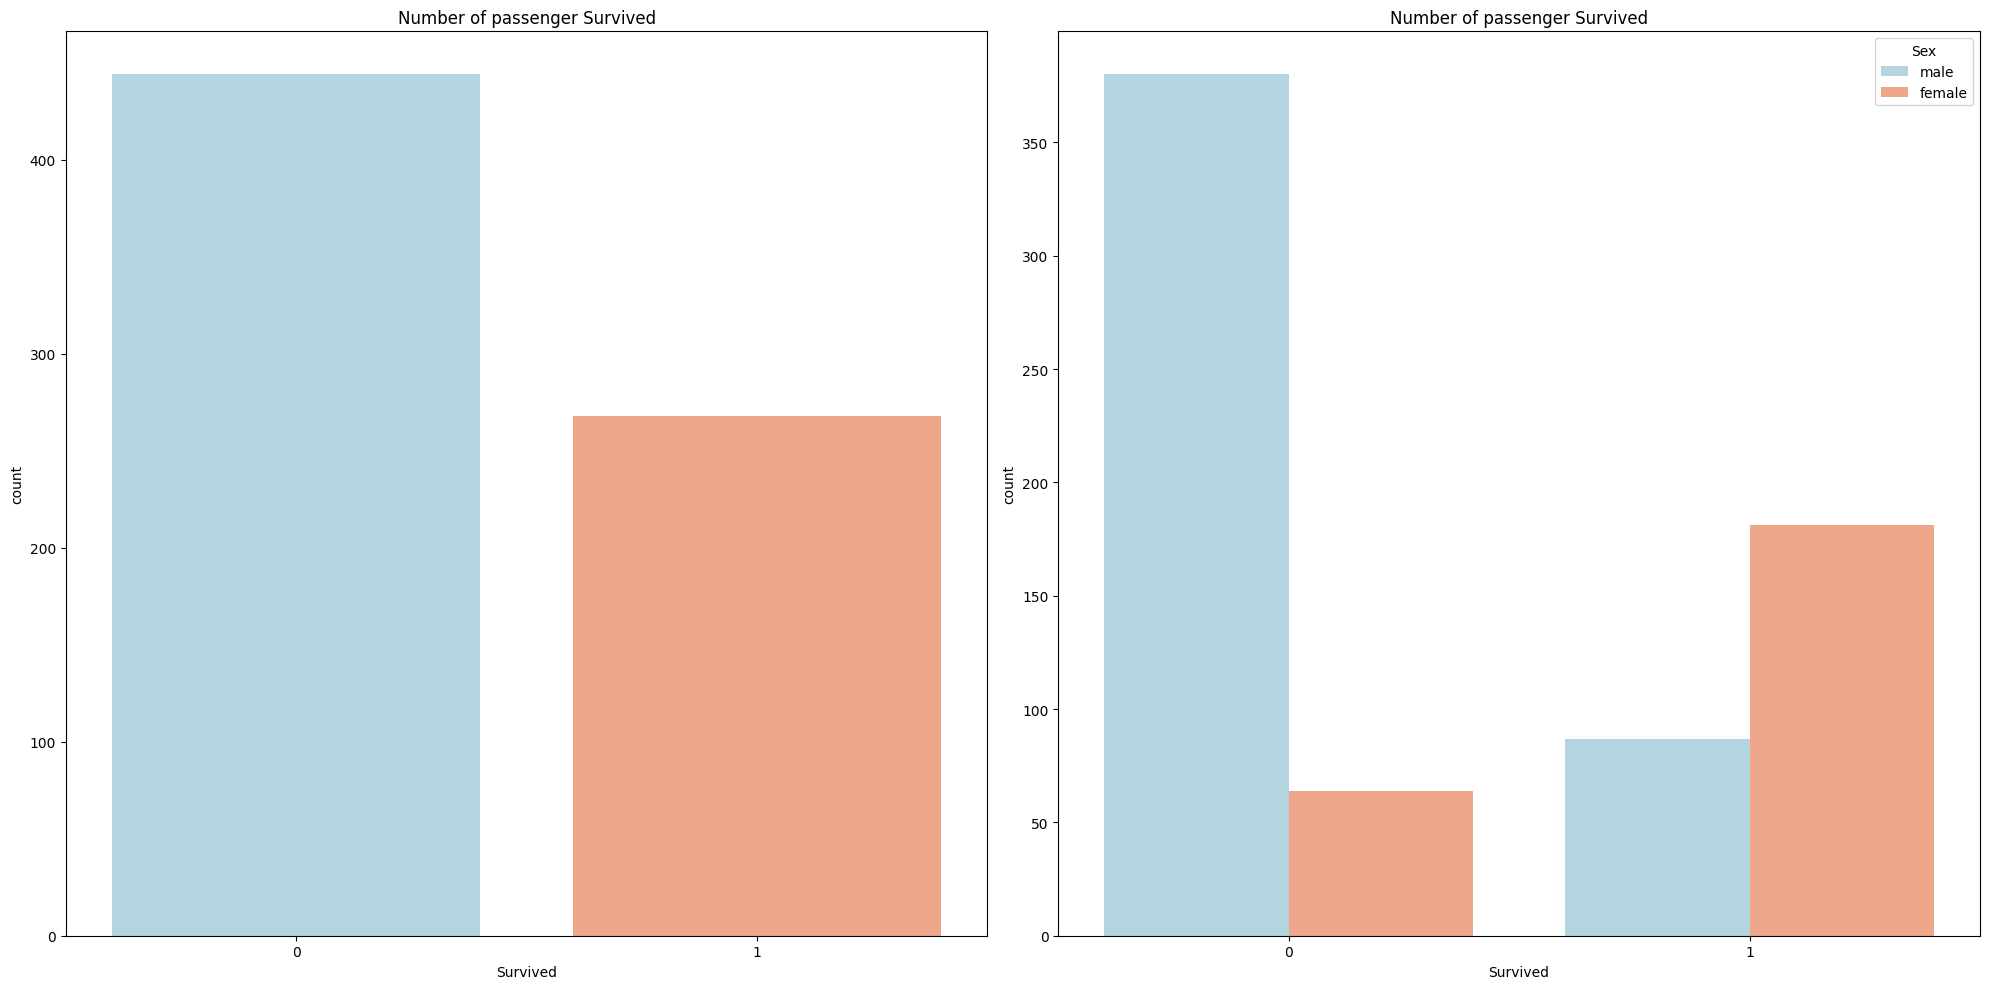

In [9]:
# Ensure y_train is a Series and x_train is a DataFrame
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='Survived')
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Create a DataFrame combining x_train and y_train for easier plotting
data = x_train.copy()
data['Survived'] = y_train

# Create the subplots
plt.figure(figsize=(20, 10))

# Left subplot: Count of passengers who survived
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=data, palette={0:'lightblue', 1:'lightsalmon'})
plt.title('Number of passenger Survived')

# Right subplot: Count of passengers who survived, split by Sex
plt.subplot(1, 2, 2)
sns.countplot(x='Survived', hue='Sex', data=data, palette={'male': 'lightblue', 'female': 'lightsalmon'})
plt.title('Number of passenger Survived')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Scatter plot Survival by Gender and Age of pasangers

In [10]:
# with 'Survived' (int type), 'Sex', 'Fare', and 'Age' columns

# --- Scatter Plot of Fare vs. Age by Survival and Sex (using Plotly) ---
# Temporarily convert 'Survived' to string for Plotly's color mapping
data['Survived'] = data['Survived'].astype(str)

# Create the Matplotlib figure with the specified size (although Plotly will handle its own sizing)
plt.figure(figsize=(20, 10))

# Create the Plotly scatter plot
fig_scatter = px.scatter(data, x='Fare', y='Age', color='Survived', facet_col='Sex')

# Update the layout (width is set here, but height is dynamic)
fig_scatter.update_layout(title_text='Survivors categorized as Male/Female', yaxis_title_text='Age of passengers')

# Show the Plotly figure
fig_scatter.show()

# Close the Matplotlib figure to avoid an empty plot
plt.close()

# Revert 'Survived' back to integer if needed for further analysis with Seaborn/Matplotlib
data['Survived'] = data['Survived'].astype(int)

## Check missing values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Missing Values in Training Dataset')

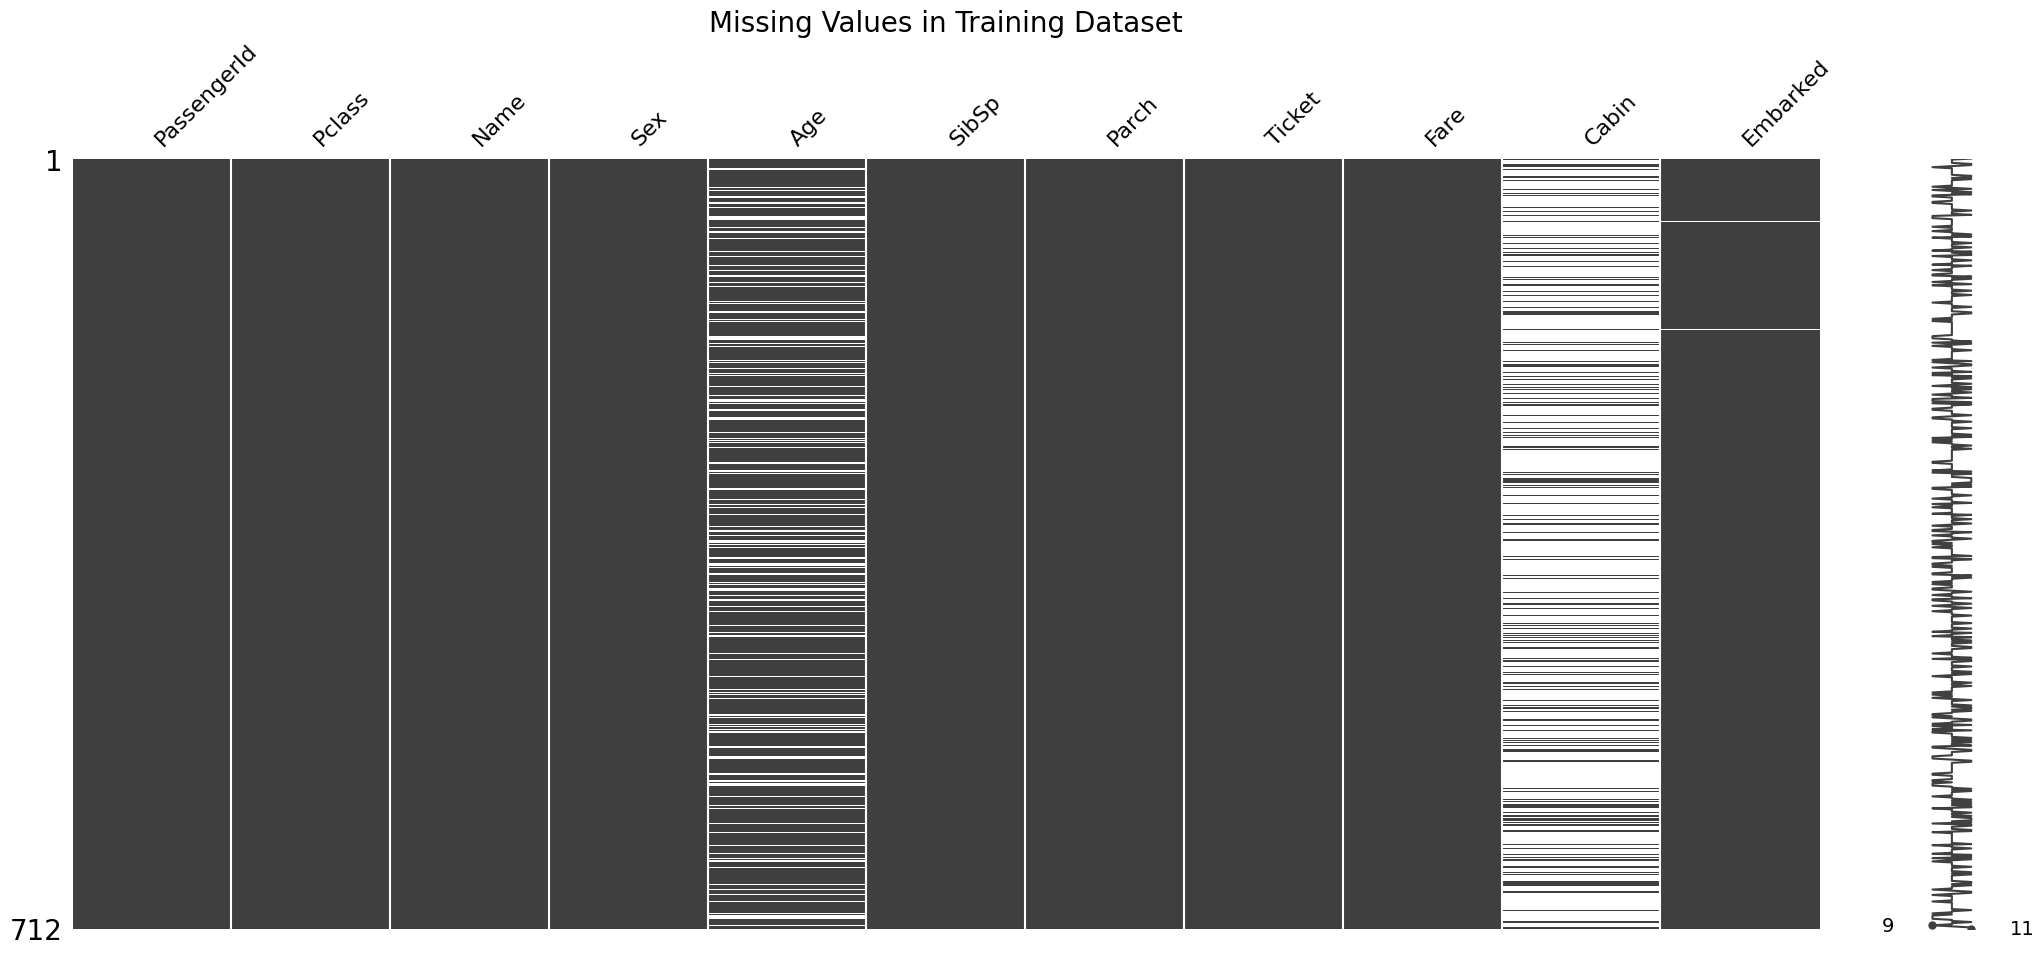

In [11]:
print(x_train.isnull().sum())
print('-'*150)
msno.matrix(x_train).set_title("Missing Values in Training Dataset",fontsize=20)

In [12]:
print(y_train.isnull().sum())

0


## Passenger Class Analysis

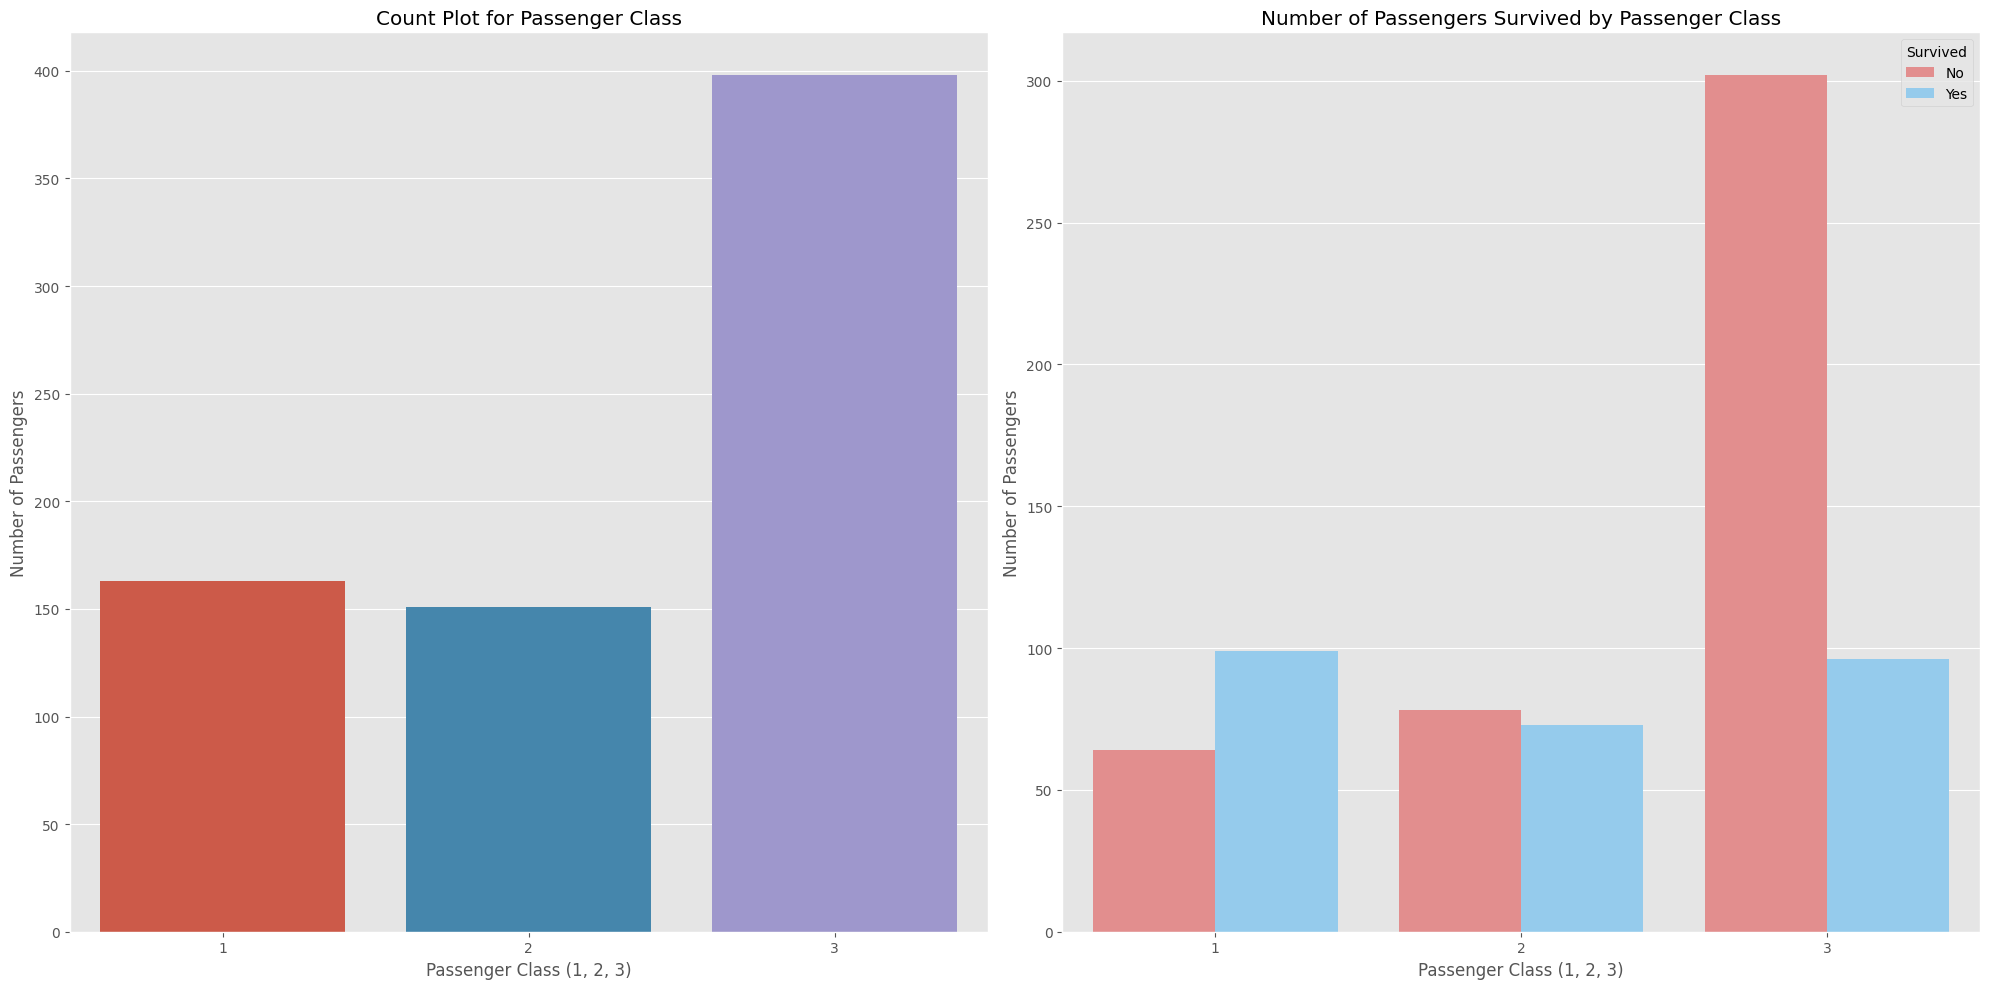

In [13]:
# Passenger Class Analysis
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')

# Subplot : Count Plot for PClass
plt.subplot(1, 2, 1)
sns.countplot(x=x_train['Pclass'])
plt.title('Count Plot for Passenger Class')
plt.xlabel('Passenger Class (1, 2, 3)')
plt.ylabel('Number of Passengers')

# Subplot : Number of Passengers by Passenger Class and Survival
plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=data, palette={0: 'lightcoral', 1: 'lightskyblue'})
plt.title('Number of Passengers Survived by Passenger Class')
plt.xlabel('Passenger Class (1, 2, 3)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Show the second plot
plt.tight_layout()
plt.show()

In [14]:
# Assuming x_train and y_train are available

# Combine x_train and y_train into a single DataFrame
train_df = pd.concat([x_train, y_train], axis=1)

# Calculate survival percentage for each Pclass
for pclass in [1, 2, 3]:
    survival_percentage = train_df[train_df['Pclass'] == pclass]['Survived'].value_counts(normalize=True).get(1, 0) * 100
    print(f"Pclass-{pclass}: {survival_percentage:.1f}% People Survived")

Pclass-1: 60.7% People Survived
Pclass-2: 48.3% People Survived
Pclass-3: 24.1% People Survived


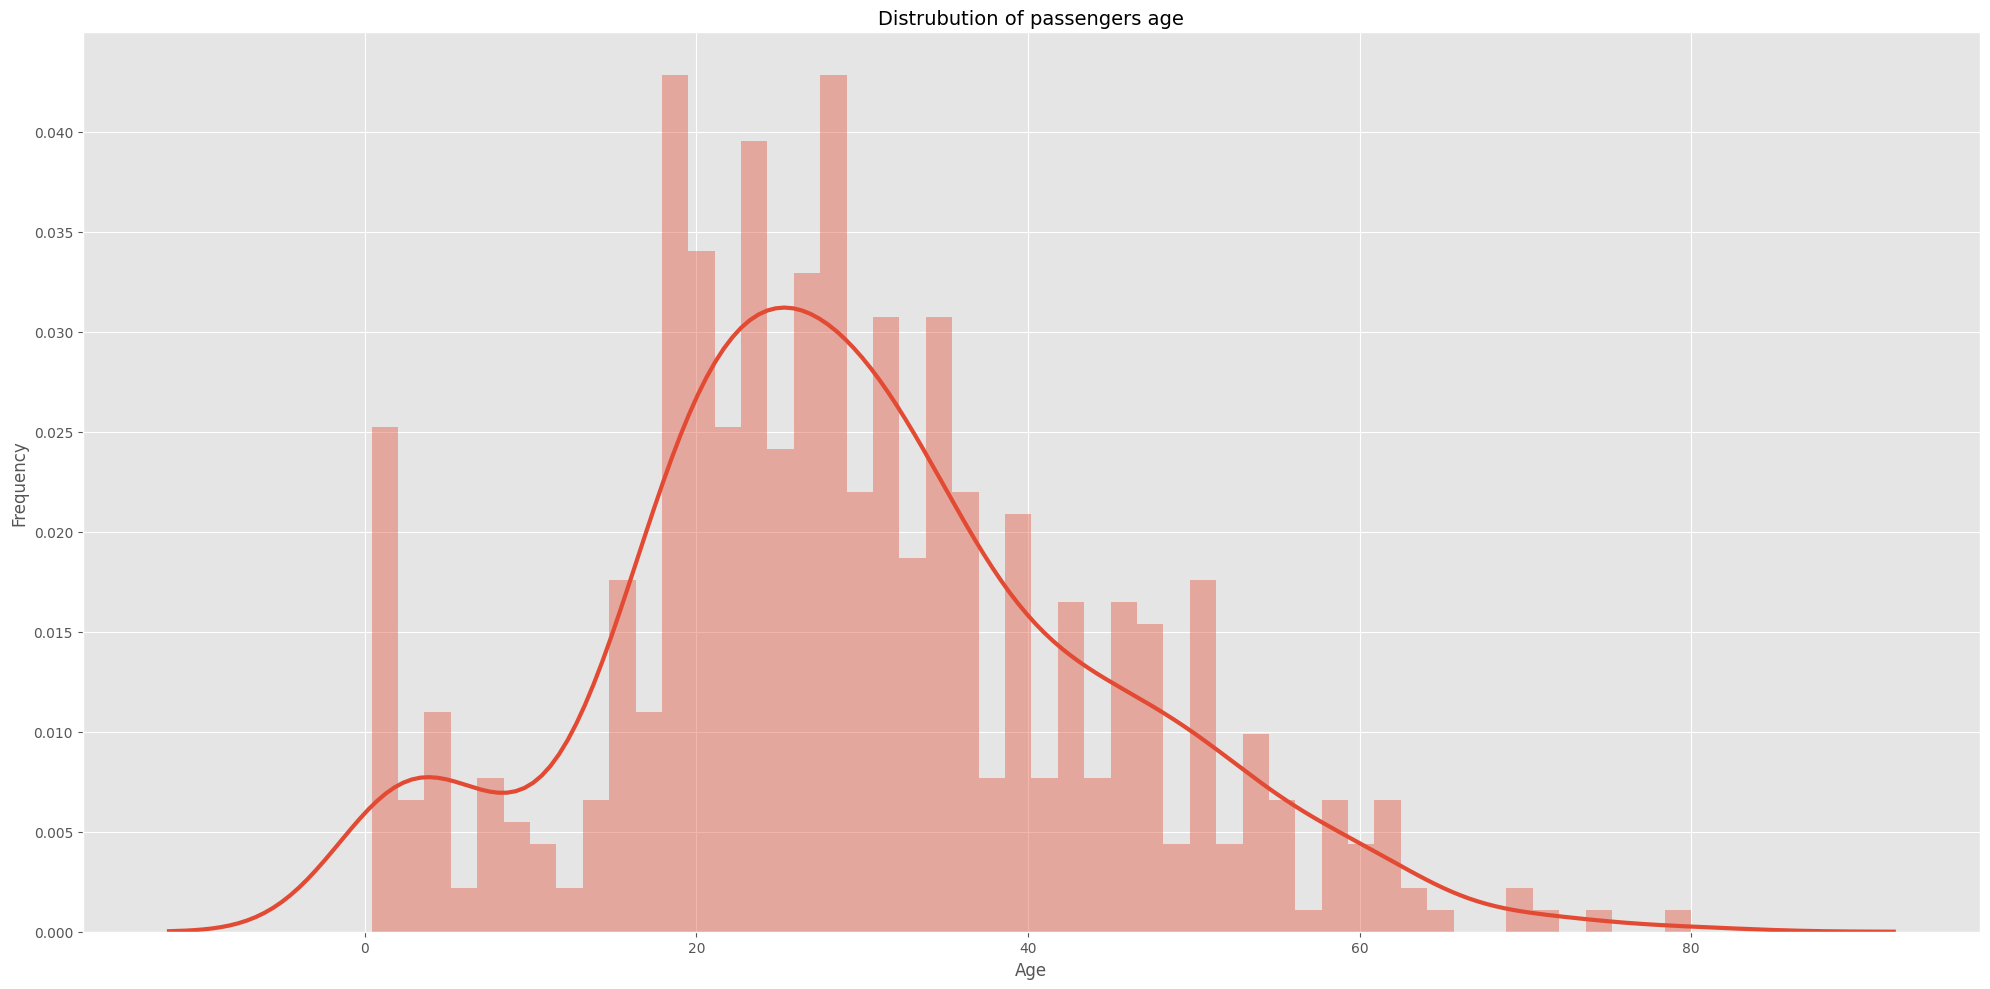

In [15]:
# set plot size
plt.figure(figsize=(20, 10))

# plot a univariate distribution of Age observations 
sns.distplot(x_train[(x_train["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

### Fare vs Pclass

<Figure size 2000x1000 with 0 Axes>

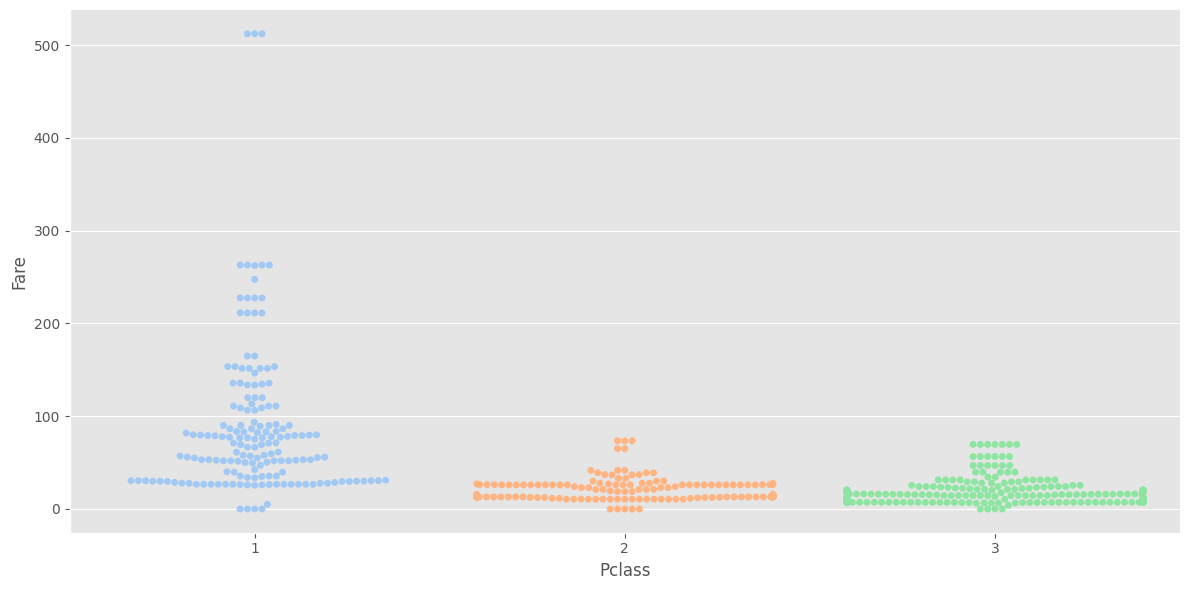

In [16]:
# Create the catplot and set the figure size using matplotlib
plt.figure(figsize=(20, 10))  # Set the figure size here
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=x_train, height=6, aspect=2, palette="pastel") # height and aspect can influence size, but plt.figure is more direct
plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

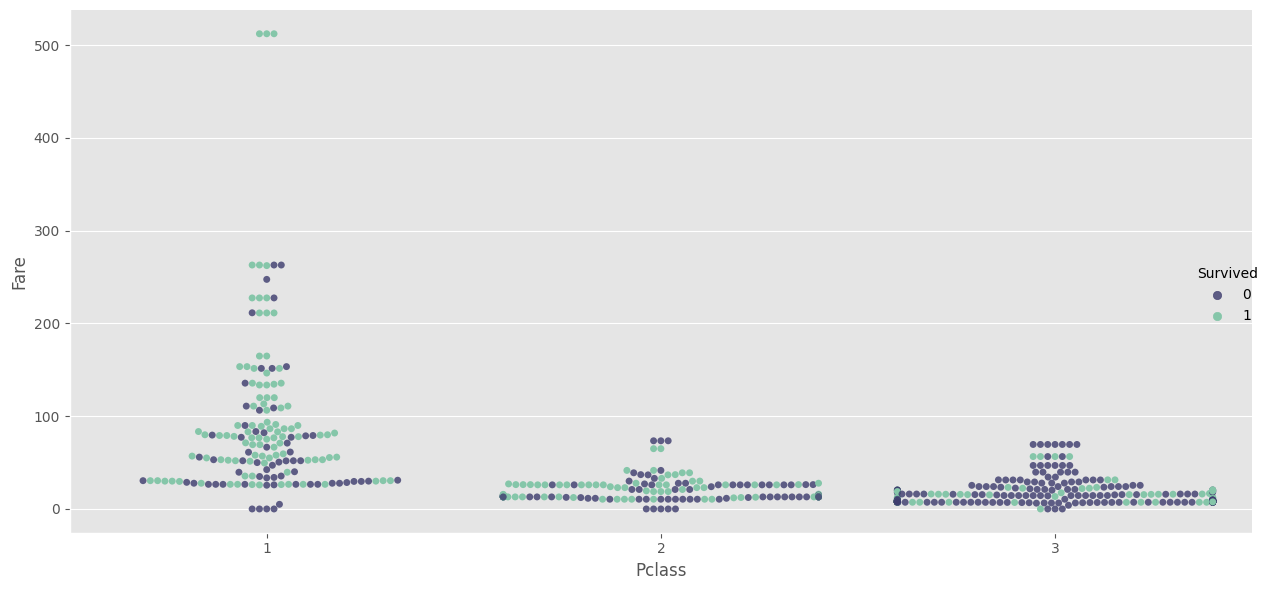

In [17]:
# Combine x_train and y_train into a single DataFrame
train_data = x_train.copy()  # Start with a copy to avoid modifying x_train directly
train_data['Survived'] = y_train # Add y_train as a new column

# Create the catplot and set the figure size using matplotlib
plt.figure(figsize=(20, 10))
sns.catplot(x="Pclass", y="Fare", hue="Survived", kind="swarm", data=train_data,
            palette=["#3f3e6fd1", "#85c6a9"], height=6, aspect=2)
plt.tight_layout()
plt.show()

In [18]:
# Get the unique values in the 'Ticket' column
unique_tickets = x_train['Ticket'].unique()

# Get the value counts of the unique values
ticket_counts = pd.Series(unique_tickets).value_counts(normalize=True)

# Print the value counts
print(ticket_counts)

113043             0.001792
11769              0.001792
34218              0.001792
12233              0.001792
2677               0.001792
                     ...   
364500             0.001792
2908               0.001792
367228             0.001792
S.C./PARIS 2079    0.001792
350026             0.001792
Name: proportion, Length: 558, dtype: float64


## Correlation analysis

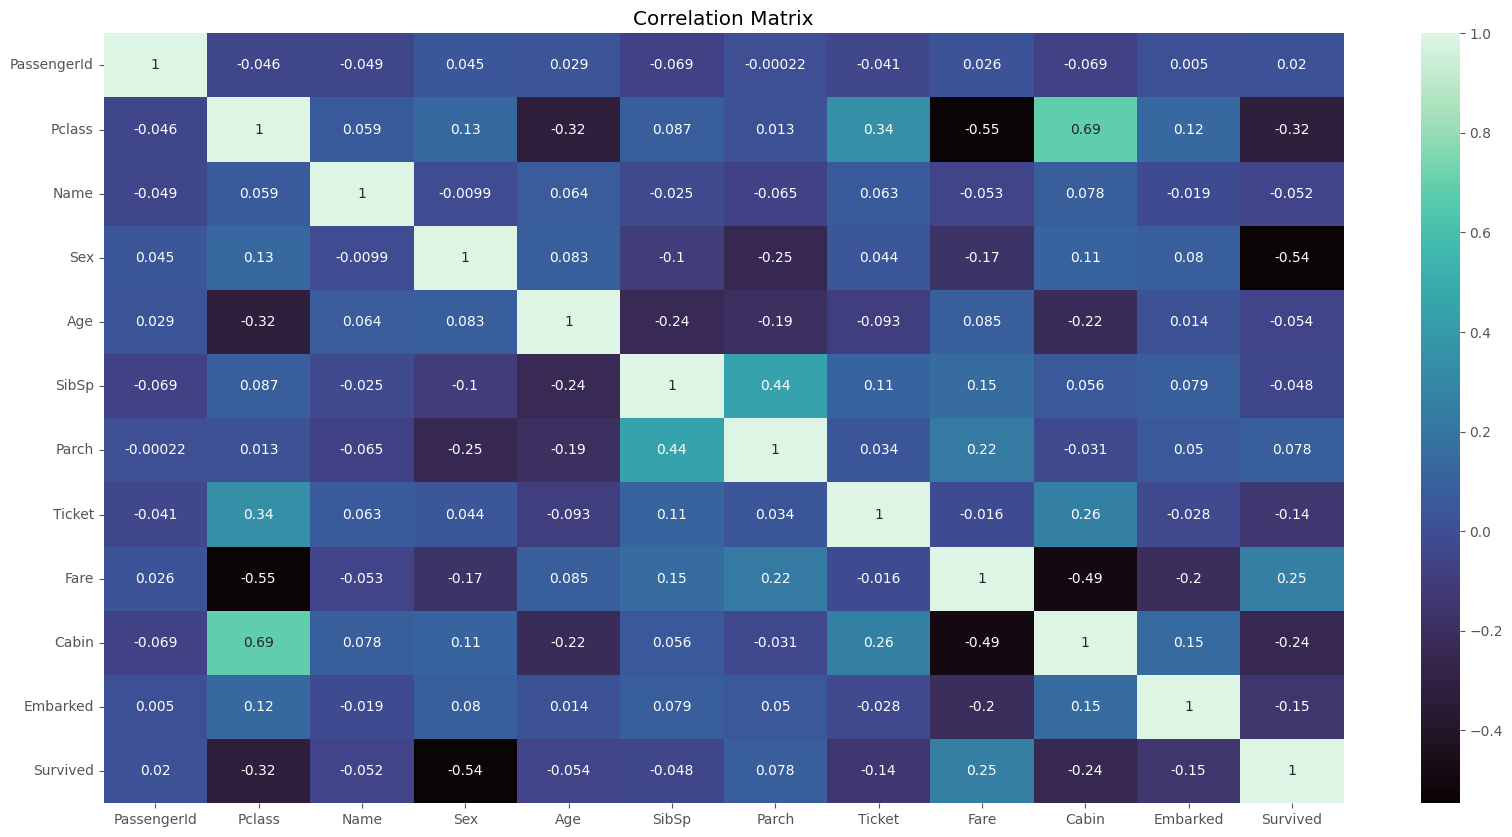

In [19]:
# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Ensure y_train is a Series
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='Survived')

# Handle missing values
x_train_corr = x_train.fillna({
    'Name': 'Unknown',
    'Sex': 'Unknown',
    'Ticket': 'Unknown',
    'Cabin': 'Unknown',
    'Embarked': 'Unknown',
    'Age': x_train['Age'].mean(),  # Fill Age with median
    'Fare': x_train['Fare'].mean()  # Fill Fare with median (if needed)
})

# Combine x_train and y_train into a single DataFrame
df_corr = pd.concat([x_train_corr, y_train], axis=1)

# Define categorical features to encode
categorical_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Encode categorical features using OrdinalEncoder
ordinal = OrdinalEncoder()
df_corr[categorical_features] = ordinal.fit_transform(df_corr[categorical_features])

# Generate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

## Drop noise features

In [20]:
# Drop the specified columns
columns_to_drop = ['PassengerId','Name','Ticket','Cabin']  # Removed duplicate 'PassengerId'
x_train = x_train.drop(columns=columns_to_drop, errors='ignore')
x_test = x_test.drop(columns=columns_to_drop, errors='ignore')

print("x_train after dropping columns:")
x_train.head()

x_train after dropping columns:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


## Fill missing values

In [21]:
x_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [22]:
# Handle missing values
x_train = x_train.fillna({
    'Embarked': 'Unknown',
    'Cabin': 'Unknown',
    'Age': x_train['Age'].mean(),  
})

# Handle missing values
x_test = x_test.fillna({
    'Embarked': 'Unknown',
    'Cabin': 'Unknown',
    'Age': x_train['Age'].mean(),  
})

In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


## Encode categorical columns

In [24]:
# Define categorical features to encode
categorical_features = ['Sex', 'Embarked']

# Encode categorical features using OrdinalEncoder
ordinal = OrdinalEncoder()
x_train[categorical_features] = ordinal.fit_transform(x_train[categorical_features])
x_test[categorical_features] = ordinal.transform(x_test[categorical_features])

In [25]:
x_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,0.655899,29.498846,0.553371,0.379213,32.586276,1.567416
std,0.824584,0.475408,12.994304,1.176404,0.791669,51.969529,0.776559
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,1.000000
50%,3.000000,1.000000,29.498846,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,30.500000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


## Data Normalization

In [26]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform x_train
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Transform x_test
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    float64
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 44.5 KB


## Dimensionality Reduction

Survived
0    0.623596
1    0.376404
Name: proportion, dtype: float64


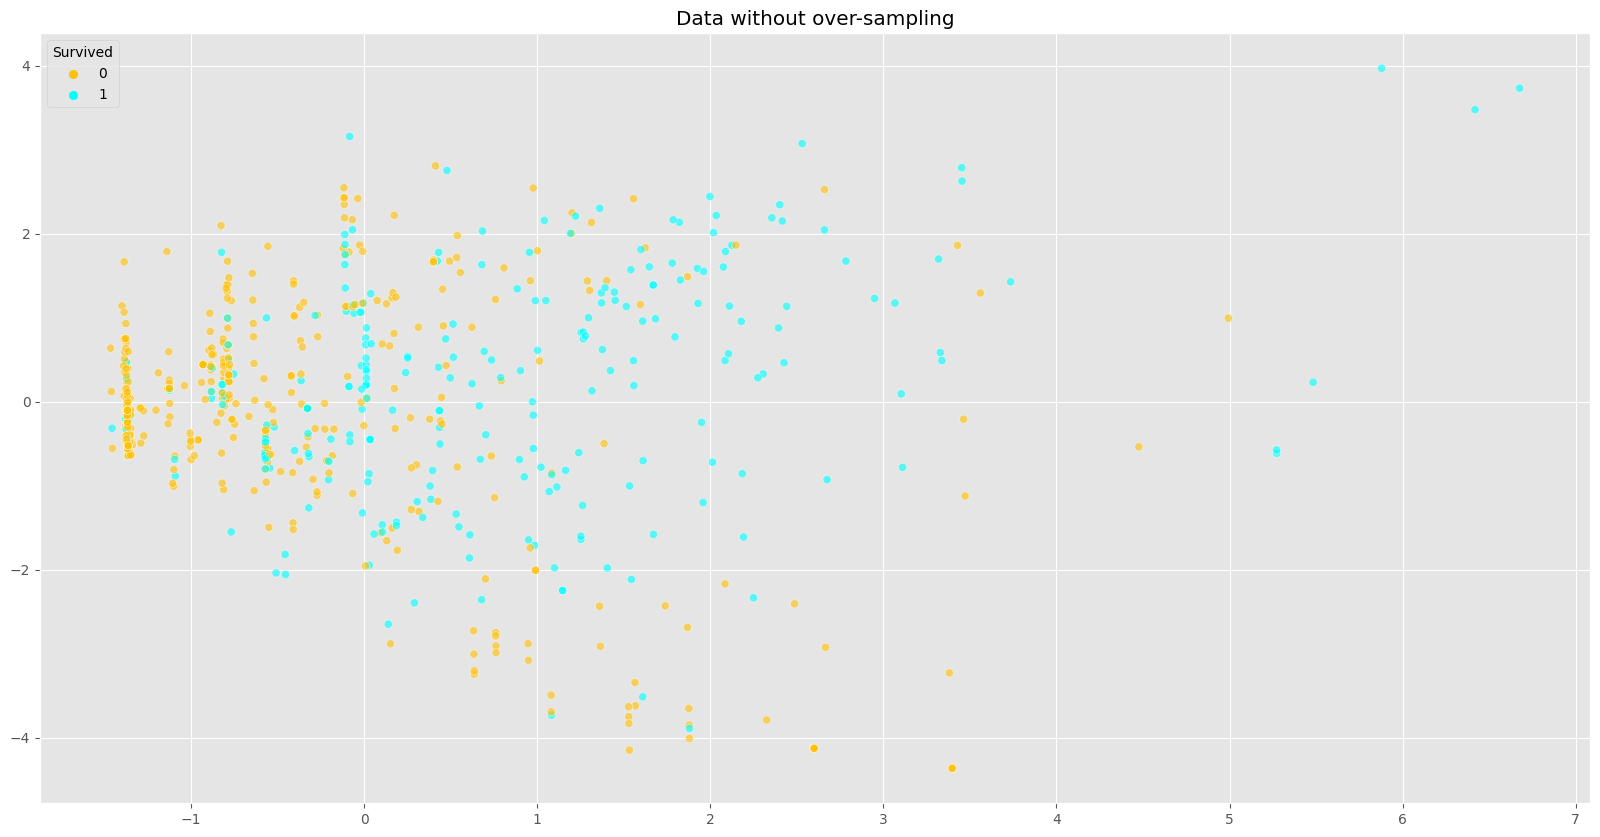

In [28]:
# Print the value counts of y_train (before converting to NumPy array)
# Ensure y_train is a pandas Series for value_counts
if not isinstance(y_train, pd.Series):
    y_train_series = pd.Series(y_train, name='Survived')
else:
    y_train_series = y_train
print(y_train_series.value_counts(normalize=True))

# Ensure x_train_scaled and y_train are in the correct format
# x_train_scaled is assumed to be a NumPy array or DataFrame with scaled features
if isinstance(x_train_scaled, pd.DataFrame):
    x_train_scaled = x_train_scaled.values
# Convert y_train to NumPy array after value_counts
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Apply PCA to reduce x_train_scaled to 2 dimensions
pca = PCA(n_components=2, random_state=42)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)  # Transform test data using the same PCA
# Create a DataFrame for plotting
df_pca = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2'])  # Use x_train_pca (2 columns) instead of x_train_scaled
df_pca['Survived'] = y_train

# Define a color palette for the two classes
# Yellow for 0 ("Not Survived"), Light blue for 1 ("Survived")
palette = sns.color_palette(["#FFC107", "cyan"])  # Matches the legend: yellow, light blue

# Plot the scatter plot
plt.figure(figsize=(20, 10))  # Adjusted size for better readability (original was 20, 10)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Survived', palette=palette, alpha=0.6)

# Customize the plot
plt.title('Data without over-sampling')
plt.xlabel('')  # Remove x-axis label to match the plot
plt.ylabel('')  # Remove y-axis label to match the plot
plt.legend(
    title='Survived',
    #labels=['Not Survived (0)', 'Survived (1)'],  # Uncomment labels to match the classes
    loc='best'
)

# Show the plot
plt.show()

# Modeling without over-sampling

## Modeling

In [29]:
# Logistic regression for classification
model = LogisticRegression(max_iter=10000)

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='accuracy')  # Use 'accuracy' for classification

# Print the results
print(f"\tK-Fold Cross-Validation Accuracy:", cv_scores)
print('-'*100)
print(f'\tAverage K-Fold Cross-Validation Accuracy: {cv_scores.mean()}')
print('-'*100)

	K-Fold Cross-Validation Accuracy: [0.82517483 0.8041958  0.78873239 0.73943662 0.80985915]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.7934797596769428
----------------------------------------------------------------------------------------------------


## Hyperparameter Tuning

In [30]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga']),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'none', 'elasticnet']),
        'tol': trial.suggest_float('tol', 1e-6, 1e-2, log=True),
        'max_iter': trial.suggest_int('max_iter', 1000, 10000),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'random_state': 42
    }
    
    # Only suggest l1_ratio if penalty is elasticnet
    if params['penalty'] == 'elasticnet':
        params['l1_ratio'] = trial.suggest_float('l1_ratio', 0, 1)
    
    try:
        model = LogisticRegression(**params)
        cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=10, scoring='accuracy')
        return cv_scores.mean()
    except ValueError:
        return 0.0

# Create an Optuna study
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=30)

# Get the best trial
best_trial = study.best_trial

# Print the best hyperparameters and score
print("\tBest Hyperparameters:", best_trial.params)
print('-'*100)
print(f"\tBest Cross-Validation Accuracy: {best_trial.value}")
print('-'*100)

# Train the best model with the best hyperparameters
best_params = best_trial.params
best_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    l1_ratio=best_params.get('l1_ratio', None),  # Only include if penalty='elasticnet'
    tol=best_params['tol'],
    max_iter=best_params['max_iter'],
    class_weight=best_params['class_weight'],
    fit_intercept=best_params['fit_intercept']
)
best_model.fit(x_train_scaled, y_train)

# Evaluate the best model using cross-validation (for confirmation)
cv_scores = cross_val_score(best_model, x_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\tK-Fold Cross-Validation Accuracy with Best Model:", cv_scores)
print('-'*100)
print(f'\tAverage K-Fold Cross-Validation Accuracy with Best Model: {cv_scores.mean()}')
print('-'*100)

[I 2025-08-19 16:33:53,055] A new study created in memory with name: no-name-24772364-5e7b-4262-825d-100b1e53c8cd
[I 2025-08-19 16:33:53,073] Trial 0 finished with value: 0.0 and parameters: {'C': 0.1767016940294795, 'solver': 'liblinear', 'penalty': 'elasticnet', 'tol': 0.00025378155082656634, 'max_iter': 7373, 'class_weight': 'balanced', 'fit_intercept': True, 'l1_ratio': 0.18182496720710062}. Best is trial 0 with value: 0.0.
[I 2025-08-19 16:33:53,224] Trial 1 finished with value: 0.7723982785602503 and parameters: {'C': 0.012601639723276799, 'solver': 'lbfgs', 'penalty': 'l2', 'tol': 2.9204338471814107e-05, 'max_iter': 5105, 'class_weight': None, 'fit_intercept': False}. Best is trial 1 with value: 0.7723982785602503.
[I 2025-08-19 16:33:53,270] Trial 2 finished with value: 0.7780516431924883 and parameters: {'C': 0.0018997763474111276, 'solver': 'liblinear', 'penalty': 'l2', 'tol': 2.4586032763280077e-06, 'max_iter': 7158, 'class_weight': None, 'fit_intercept': True}. Best is tria

	Best Hyperparameters: {'C': 6.95932551868922, 'solver': 'liblinear', 'penalty': 'l2', 'tol': 3.260841689675392e-06, 'max_iter': 6243, 'class_weight': None, 'fit_intercept': True}
----------------------------------------------------------------------------------------------------
	Best Cross-Validation Accuracy: 0.7976917057902974
----------------------------------------------------------------------------------------------------
	K-Fold Cross-Validation Accuracy with Best Model: [0.82517483 0.8041958  0.78873239 0.73943662 0.80985915]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy with Best Model: 0.7934797596769428
----------------------------------------------------------------------------------------------------


## Regularization path

### Regularization path (before tuning hyperparameters)

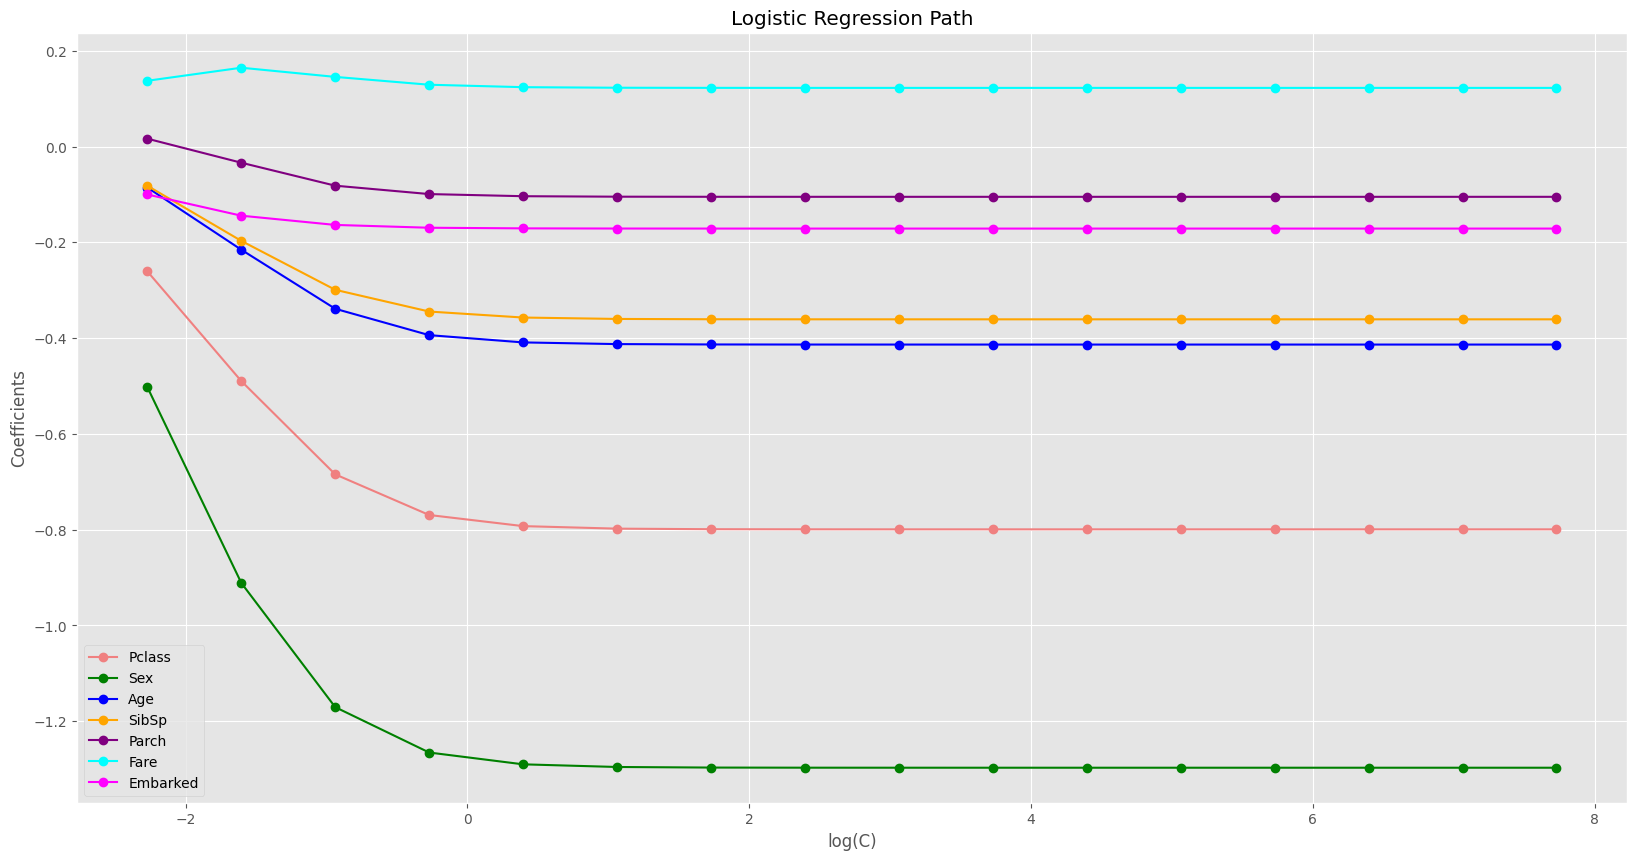

In [31]:
# Compute the coefficient paths for L1-regularized logistic regression
# Compute the range of C values using l1_min_c
cs = l1_min_c(x_train_scaled, y_train, loss="log") * np.logspace(0, 10, 16)

# Initialize the logistic regression model with L1 penalty
#clf = LogisticRegression(
#    penalty="l1",
#    solver="liblinear",
#    tol=1e-6,
#    max_iter=int(1e6),
#    warm_start=True,
#    intercept_scaling=10000.0,
#)
clf = LogisticRegression()

# Compute the coefficients for each value of C
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(x_train_scaled, y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

# Plot the coefficient paths
plt.figure(figsize=(20, 10))
# Define a color palette for the 7 features
colors = ['lightcoral', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
# Feature names for the Titanic dataset
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Plot each feature's coefficient path with a different color
for i in range(coefs_.shape[1]):  # Loop over each feature (7 features)
    plt.plot(np.log10(cs), coefs_[:, i], marker="o", color=colors[i], label=feature_names[i])

# Customize the plot
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")

# Optionally add a legend (the provided plot doesn't have one, but we can include it for clarity)
plt.legend(loc='best')

# Show the plot
plt.show()

### Regularization path (after tuning hyperparameters)

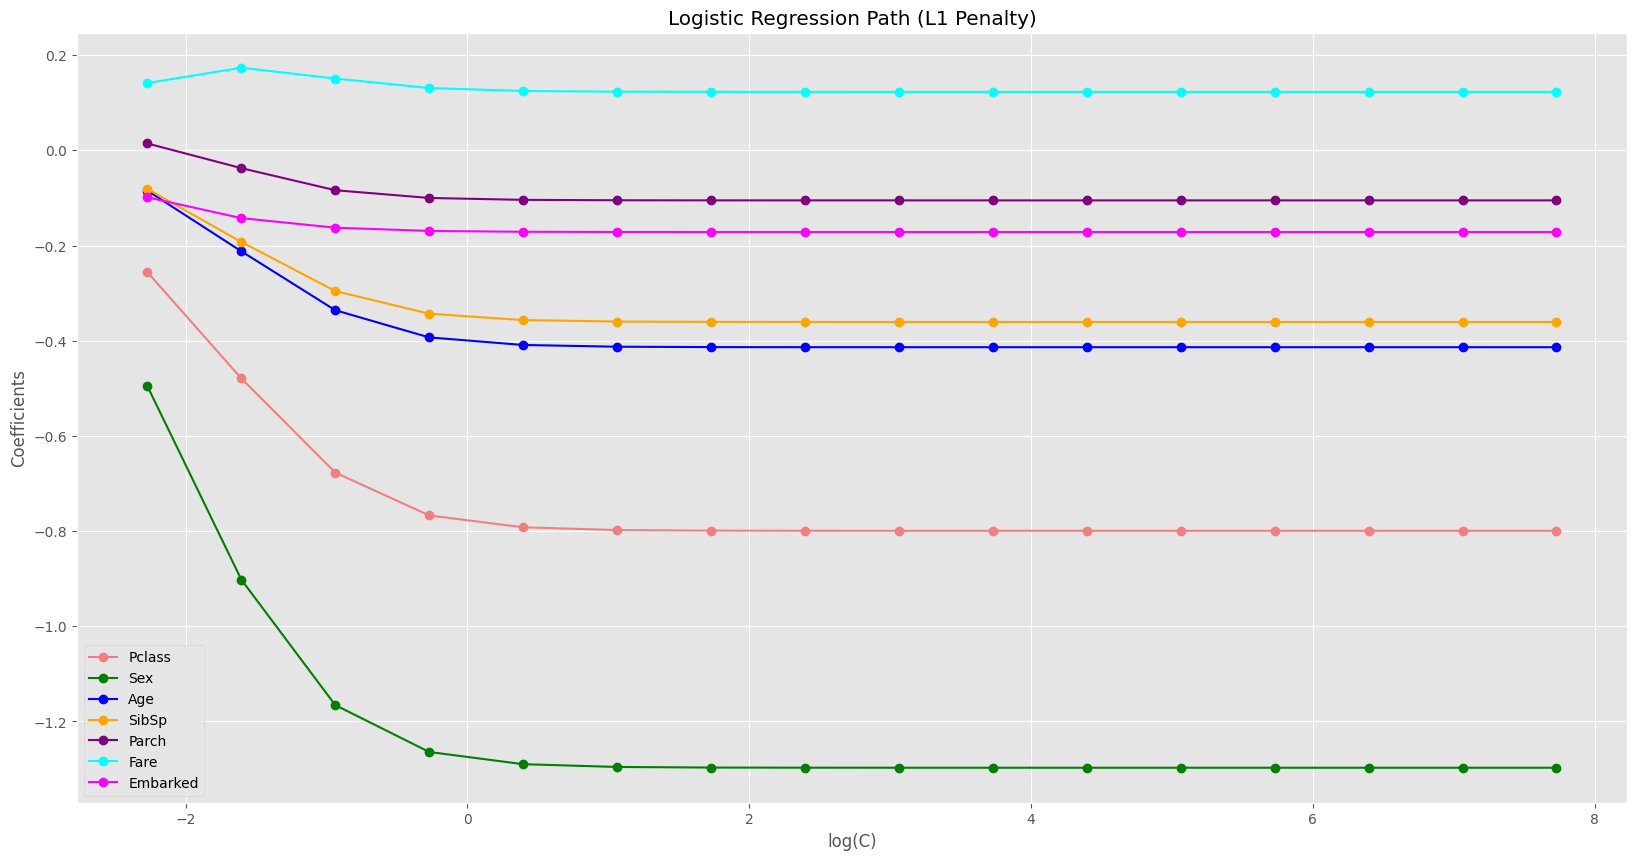

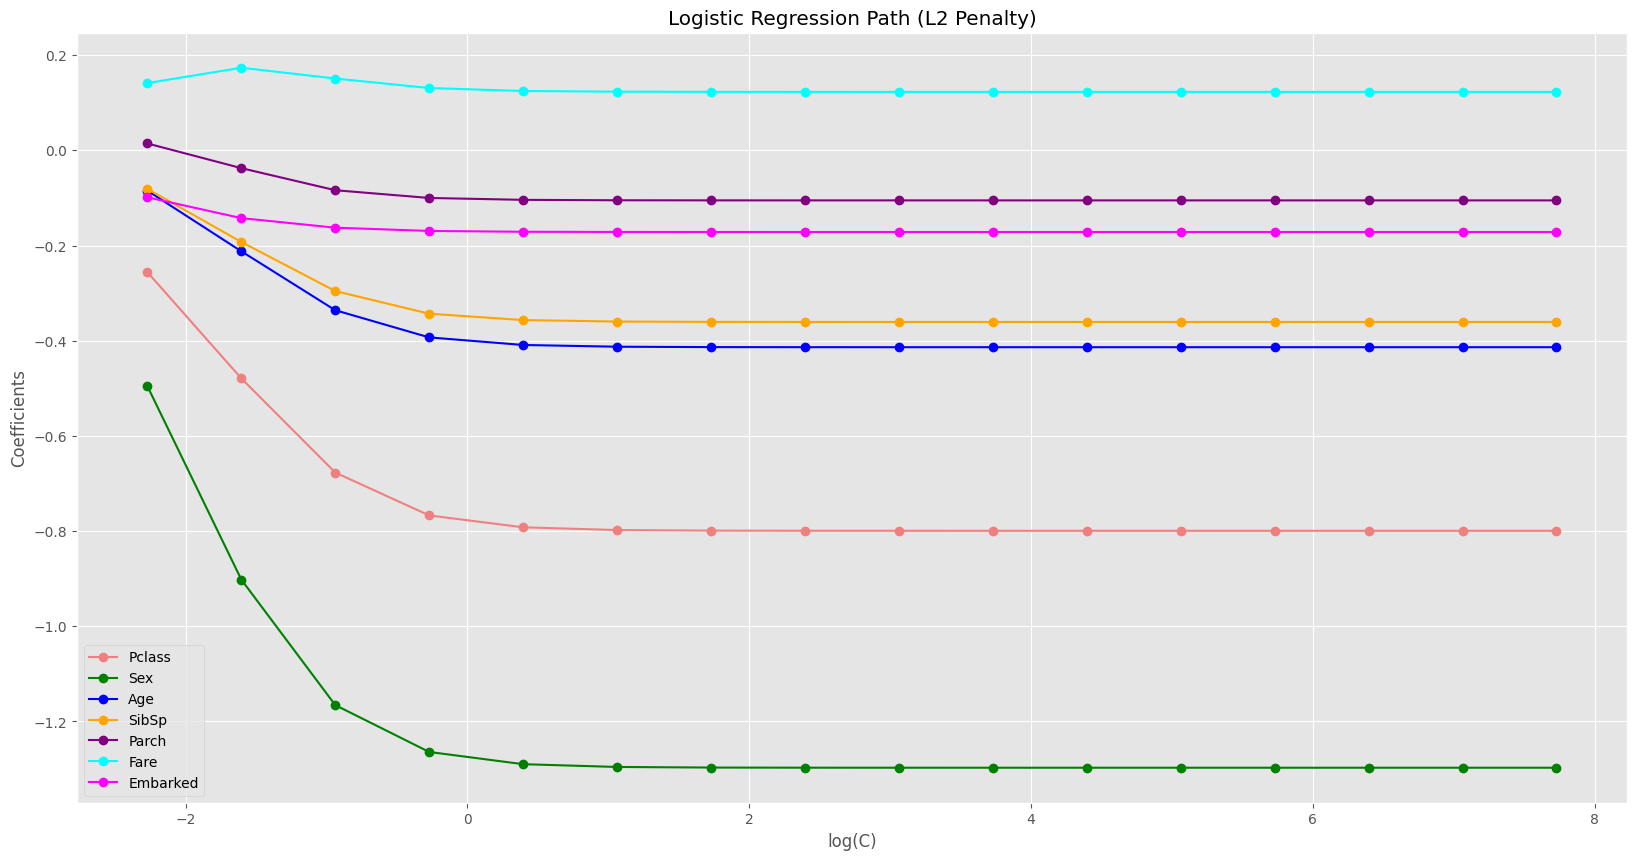

In [32]:
# Compute the range of C values using l1_min_c
cs = l1_min_c(x_train_scaled, y_train, loss="log") * np.logspace(0, 10, 16)

# Function to compute and plot the regularization path for a given penalty
def plot_regularization_path(penalty, title_suffix):
    # Initialize the logistic regression model with the best hyperparameters
    clf = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    l1_ratio=best_params.get('l1_ratio', None),  # Only include if penalty='elasticnet'
    tol=best_params['tol'],
    max_iter=best_params['max_iter'],
    class_weight=best_params['class_weight'],
    fit_intercept=best_params['fit_intercept']
)
    # Compute the coefficients for each value of C
    coefs_ = []
    for c in cs:
        clf.set_params(C=c)
        clf.fit(x_train_scaled, y_train)
        coefs_.append(clf.coef_.ravel().copy())

    coefs_ = np.array(coefs_)

    # Plot the coefficient paths
    plt.figure(figsize=(20, 10))  # Adjusted size to match previous plot
    # Define a color palette for the 7 features (matching the style of the previous plot)
    colors = ['lightcoral', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
    # Feature names for the Titanic dataset
    feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

    # Plot each feature's coefficient path with a different color
    for i in range(coefs_.shape[1]):  # Loop over each feature (7 features)
        plt.plot(np.log10(cs), coefs_[:, i], marker="o", color=colors[i], label=feature_names[i])

    # Customize the plot
    plt.xlabel("log(C)")
    plt.ylabel("Coefficients")
    plt.title(f"Logistic Regression Path ({title_suffix})")
    plt.axis("tight")

    # Optionally add a legend (previous plot didn't have one, but we include it for clarity)
    plt.legend(loc='best')

    # Show the plot
    plt.show()

# Plot the regularization path for penalty='l1'
plot_regularization_path(penalty="l1", title_suffix="L1 Penalty")

# Plot the regularization path for penalty='l2'
plot_regularization_path(penalty="l2", title_suffix="L2 Penalty")

## S-shaped curve and Threshold value

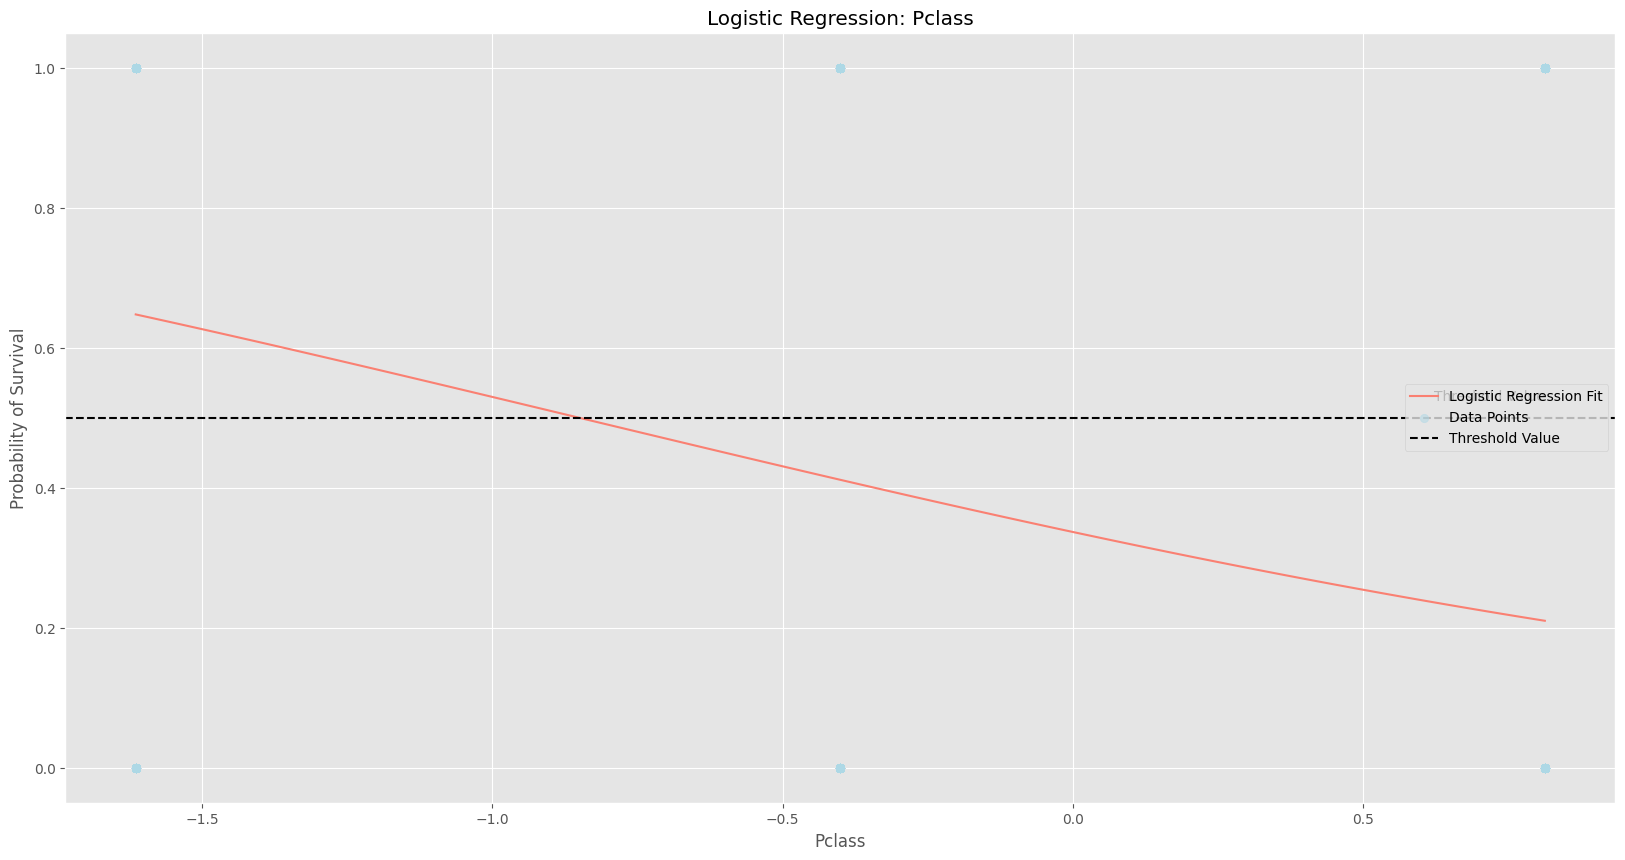

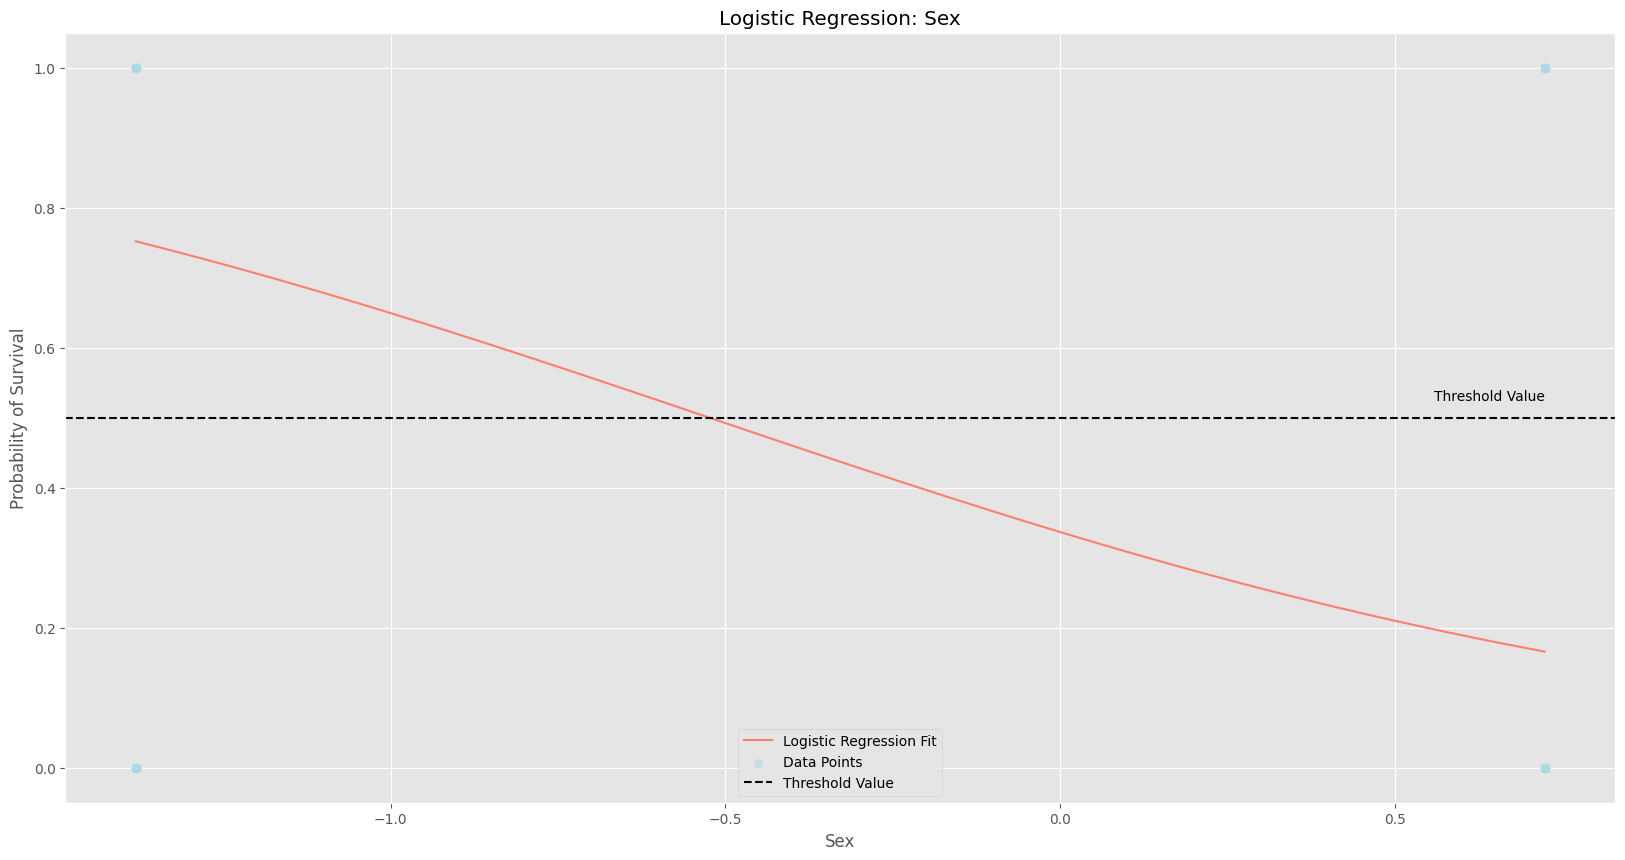

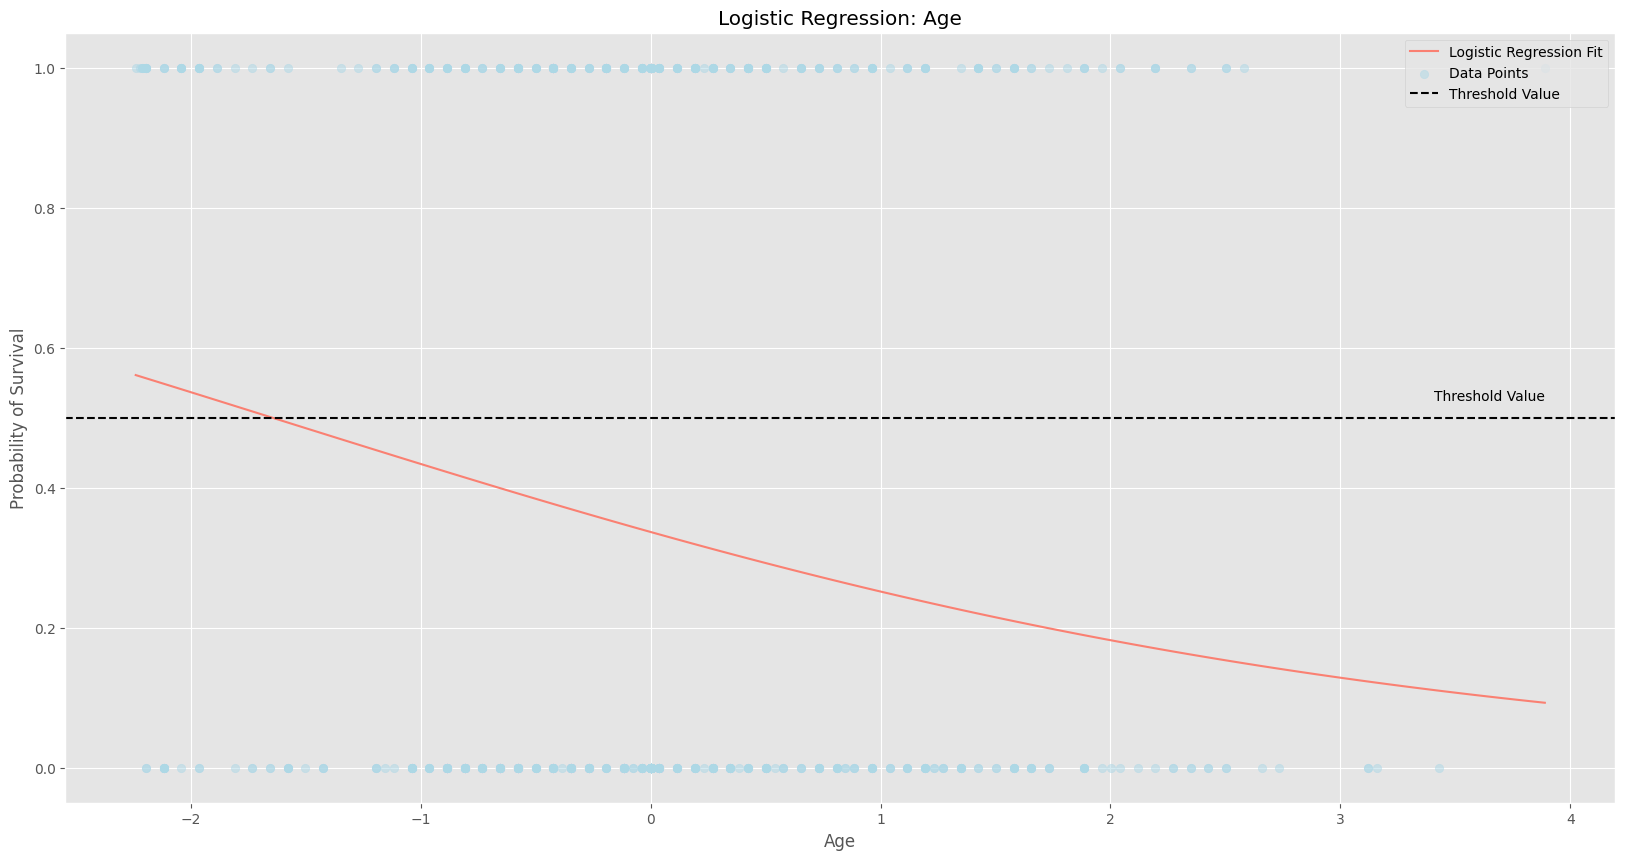

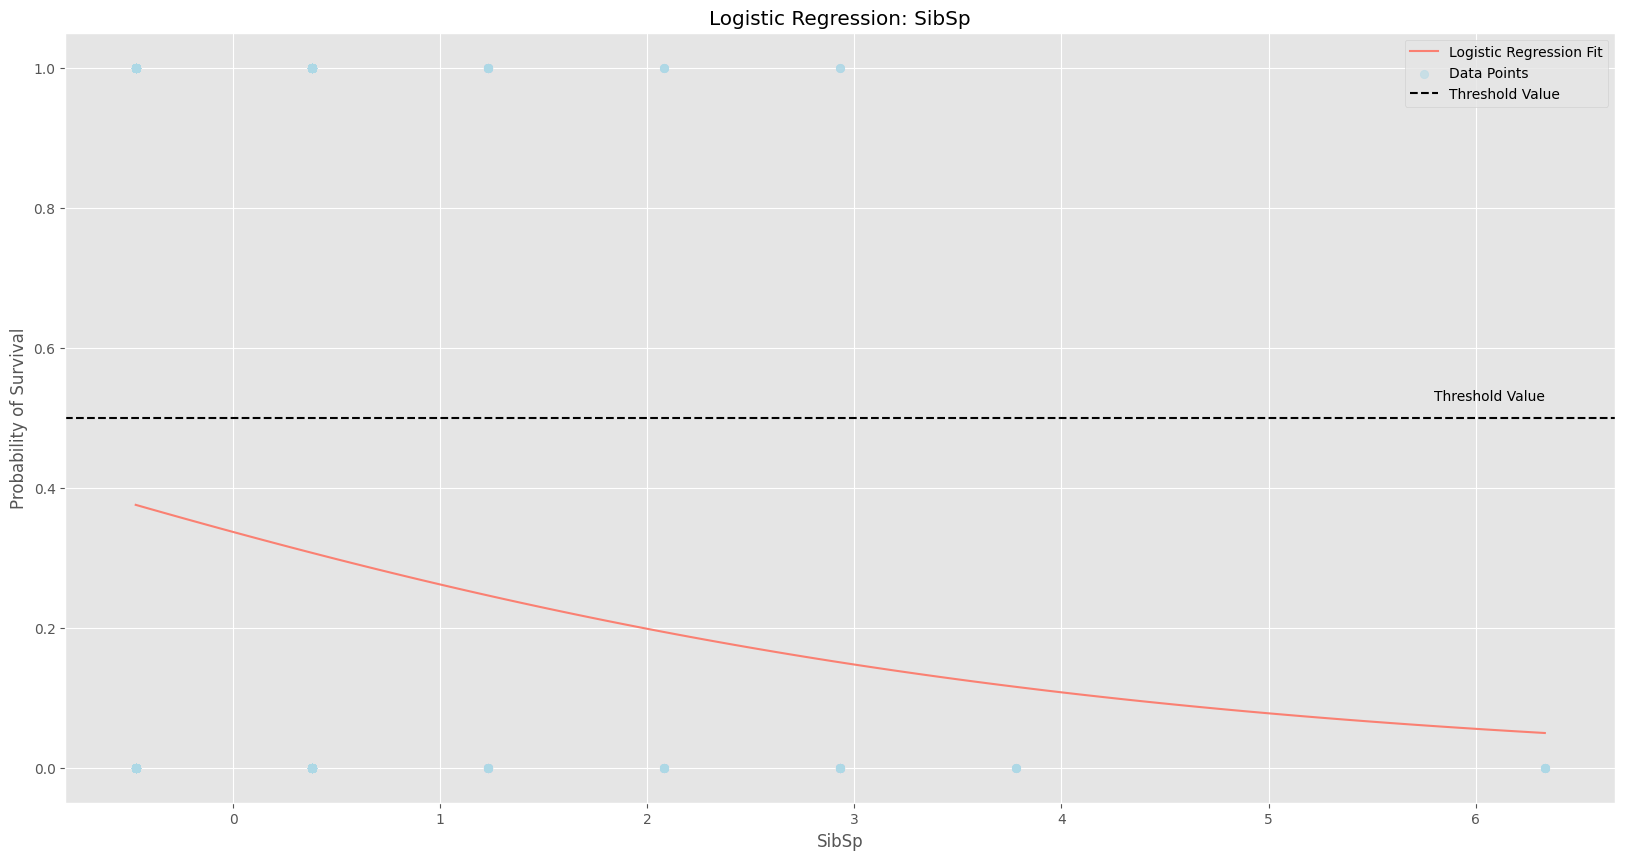

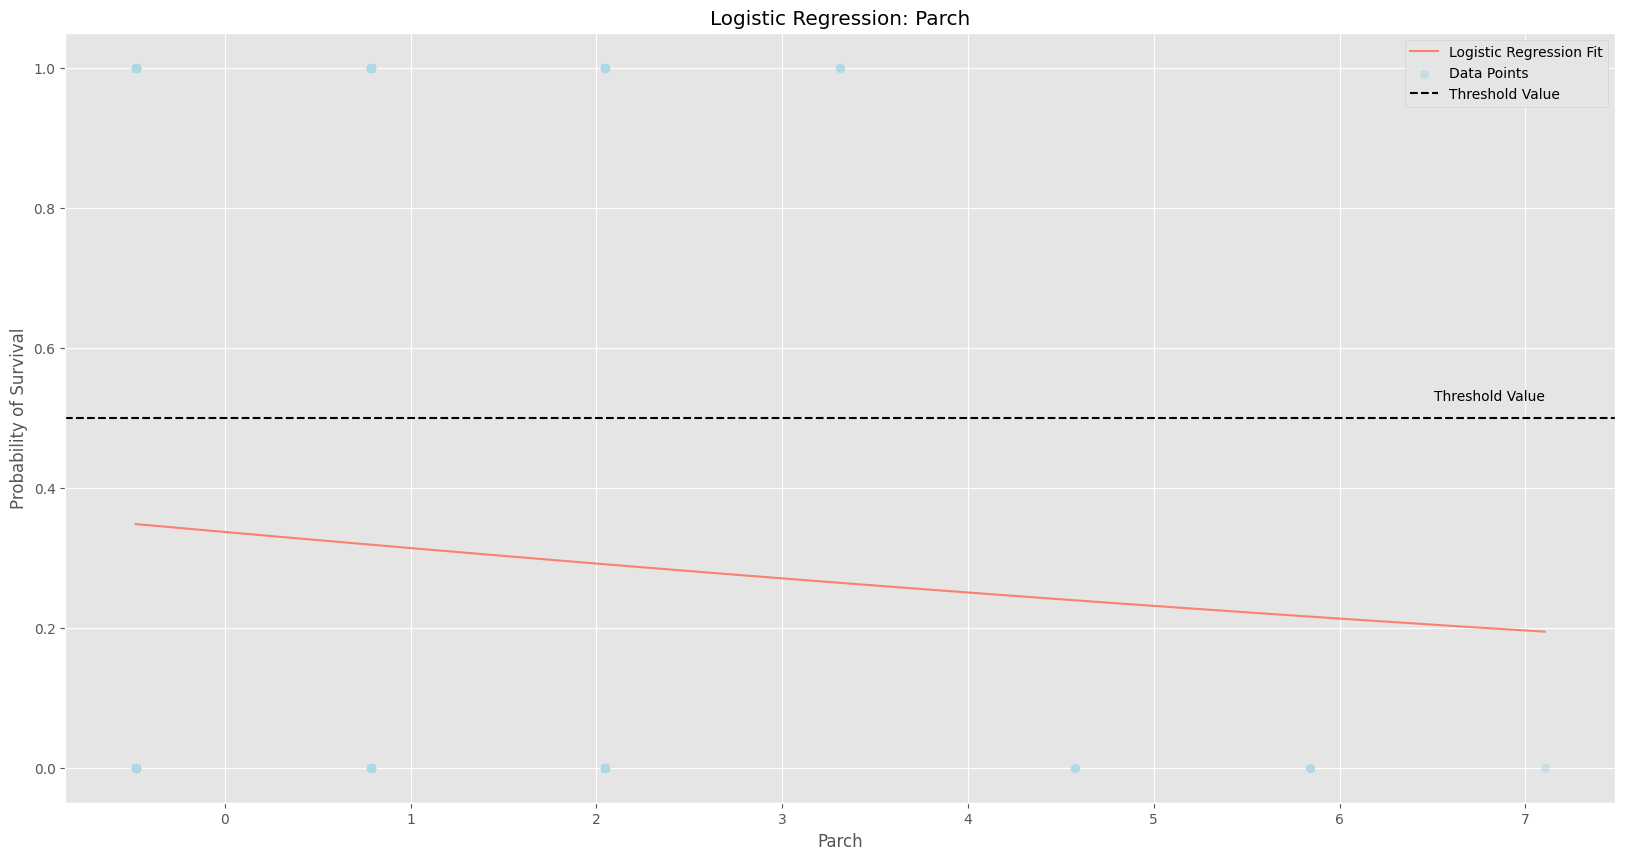

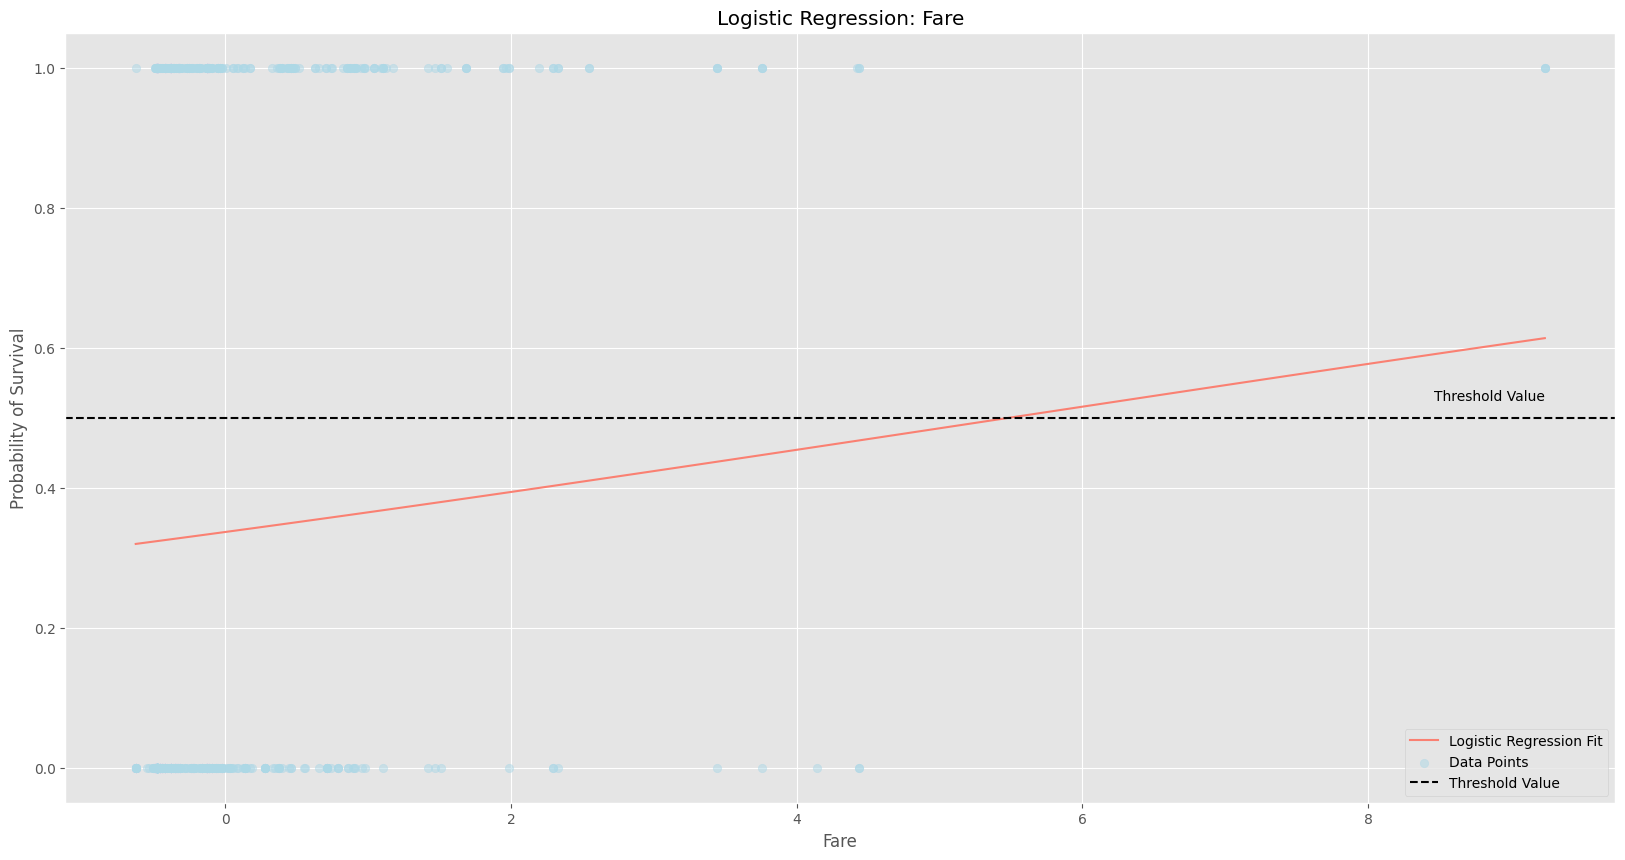

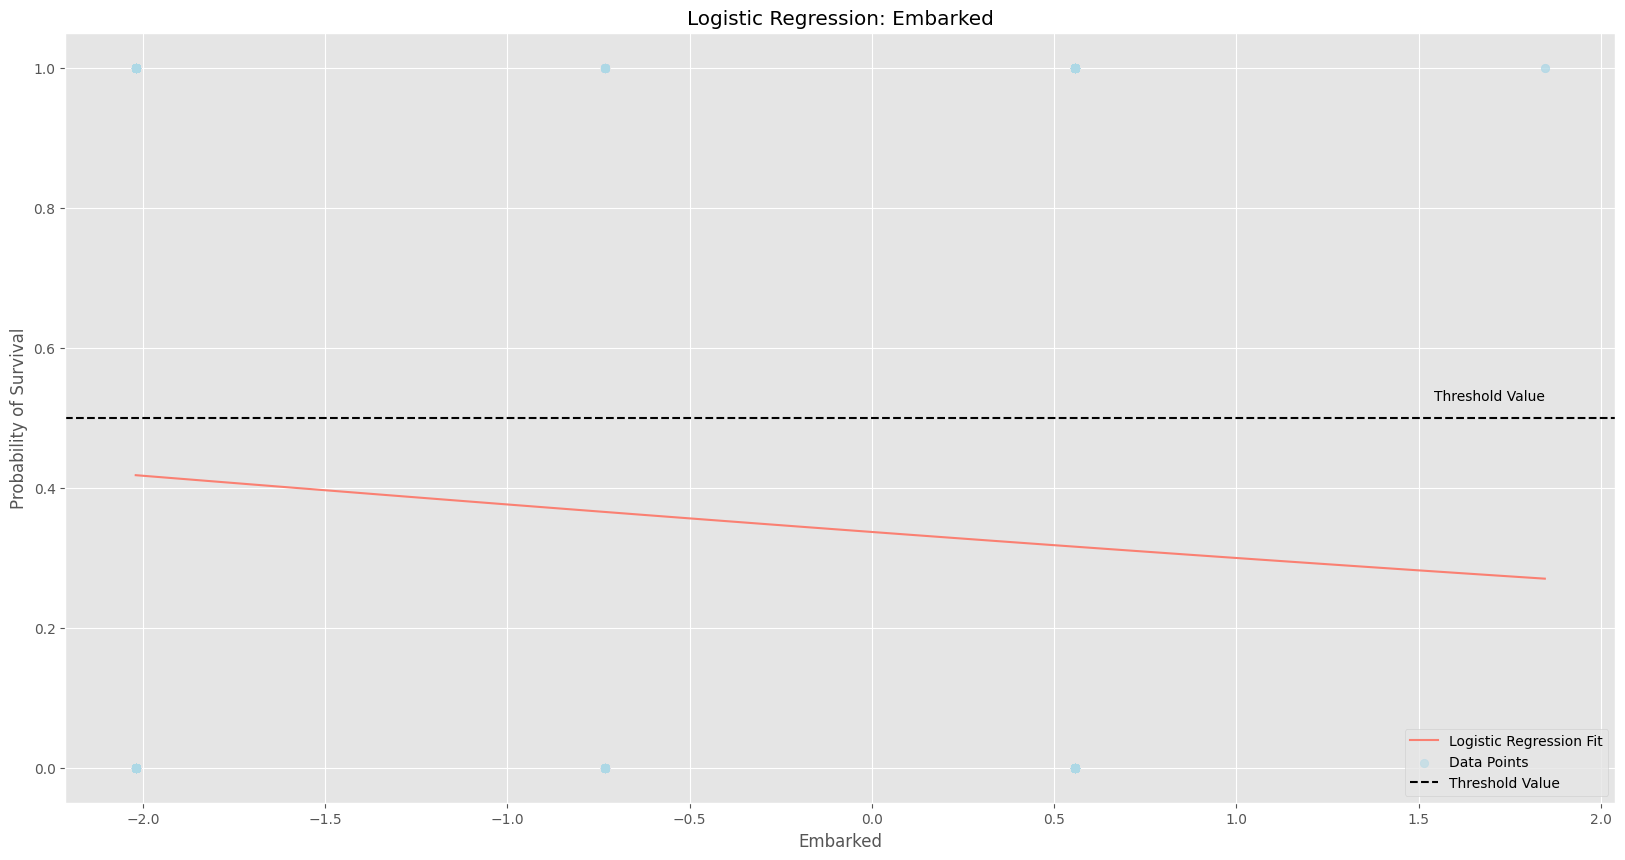

In [33]:
# Initialize the logistic regression model with the best hyperparameters
clf = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    l1_ratio=best_params.get('l1_ratio', None),  # Only include if penalty='elasticnet'
    tol=best_params['tol'],
    max_iter=best_params['max_iter'],
    class_weight=best_params['class_weight'],
    fit_intercept=best_params['fit_intercept']
)

# Fit the model on the training data
clf.fit(x_train_scaled, y_train)

# Feature names for the Titanic dataset
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Ensure x_train_scaled is a NumPy array for easier manipulation
if not isinstance(x_train_scaled, np.ndarray):
    x_train_scaled = x_train_scaled.values

# Compute the mean of each feature (to hold other features constant)
feature_means = np.mean(x_train_scaled, axis=0)

# Plot the sigmoid curve for each feature
for feature_idx, feature_name in enumerate(feature_names):
    # Create a range of values for the feature of interest
    feature_min = np.min(x_train_scaled[:, feature_idx])
    feature_max = np.max(x_train_scaled[:, feature_idx])
    feature_range = np.linspace(feature_min, feature_max, 100)

    # Create a synthetic dataset where all other features are at their mean
    synthetic_data = np.tile(feature_means, (100, 1))  # Repeat the mean vector 100 times
    synthetic_data[:, feature_idx] = feature_range  # Vary the feature of interest

    # Predict probabilities using the fitted model
    probabilities = clf.predict_proba(synthetic_data)[:, 1]  # Probability of Survived=1

    # Plot the sigmoid curve
    plt.figure(figsize=(20, 10))
    plt.plot(feature_range, probabilities, color='salmon', label='Logistic Regression Fit')

    # Overlay the actual data points
    # Scatter the feature values vs. true labels (0 or 1)
    plt.scatter(x_train_scaled[:, feature_idx], y_train, color='lightblue', alpha=0.5, label='Data Points')

    # Add the threshold line
    plt.axhline(y=0.5, color='black', linestyle='--', label='Threshold Value')
    plt.text(feature_max, 0.52, 'Threshold Value', verticalalignment='bottom', horizontalalignment='right')

    # Customize the plot
    plt.xlabel(feature_name)
    plt.ylabel('Probability of Survival')
    plt.title(f'Logistic Regression: {feature_name}')
    plt.legend(loc='best')
    plt.grid(True)

    # Show the plot
    plt.show()

## Decision Boundary

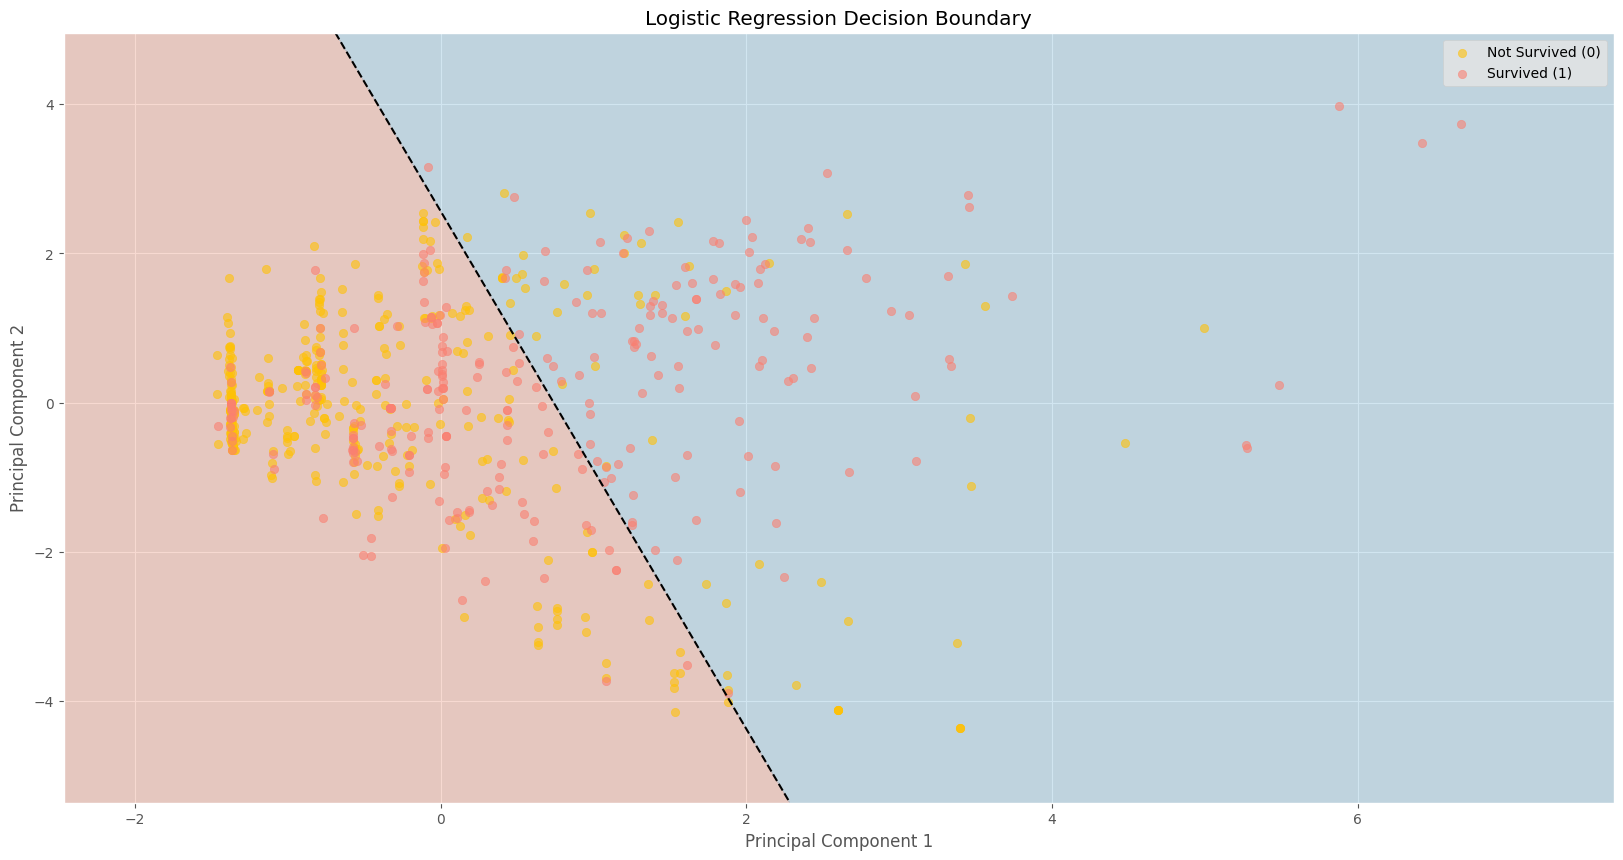

In [34]:
# Initialize the logistic regression model with the best hyperparameters
clf = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    l1_ratio=best_params.get('l1_ratio', None),  # Only include if penalty='elasticnet'
    tol=best_params['tol'],
    max_iter=best_params['max_iter'],
    class_weight=best_params['class_weight'],
    fit_intercept=best_params['fit_intercept']
)

# Ensure x_train_scaled is a NumPy array for easier manipulation
if not isinstance(x_train_scaled, np.ndarray):
    x_train_scaled = x_train_scaled.values

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2, random_state=42)
x_train_pca = pca.fit_transform(x_train_scaled)

# Fit the model on the 2D PCA-transformed data
clf.fit(x_train_pca, y_train)

# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict probabilities for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict_proba(mesh_points)[:, 1]  # Probability of Survived=1
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(20, 10))
# Plot the decision boundary (where probability = 0.5)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.3)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')

# Plot the data points, colored by their true labels
colors = ['#FFC107', 'salmon']  # Yellow for Not Survived (0), Light blue for Survived (1)
for label in np.unique(y_train):
    plt.scatter(
        x_train_pca[y_train == label, 0], 
        x_train_pca[y_train == label, 1], 
        color=colors[label], 
        label=f'{"Survived" if label == 1 else "Not Survived"} ({label})',
        alpha=0.6
    )

# Customize the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

# Model Evaluation

In [35]:
# If x_test is not scaled, you should scale it using the same scaler as x_train_scaled
x_test_scaled = x_test  # Replace with your scaled test set
y_test = y_test  # Replace with your test labels

# Make predictions on the test data using the best model
y_pred = best_model.predict(x_test_scaled)

# Calculate predicted probabilities for ROC-AUC and ROC curve
y_pred_proba = best_model.predict_proba(x_test_scaled)[:, 1]  # Probability of Survived=1

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Default is binary for binary classification
recall = recall_score(y_test, y_pred)  # Default is binary
f1 = f1_score(y_test, y_pred)  # Default is binary
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Binary classification, no multi_class needed

# Print the metrics
print("\tEvaluation Metrics on Test Set:")
print('-'*100)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")
print('-'*100)

	Evaluation Metrics on Test Set:
----------------------------------------------------------------------------------------------------
Accuracy: 0.620
Precision: 0.875
Recall: 0.095
F1-score: 0.171
AUC-ROC: 0.756
----------------------------------------------------------------------------------------------------


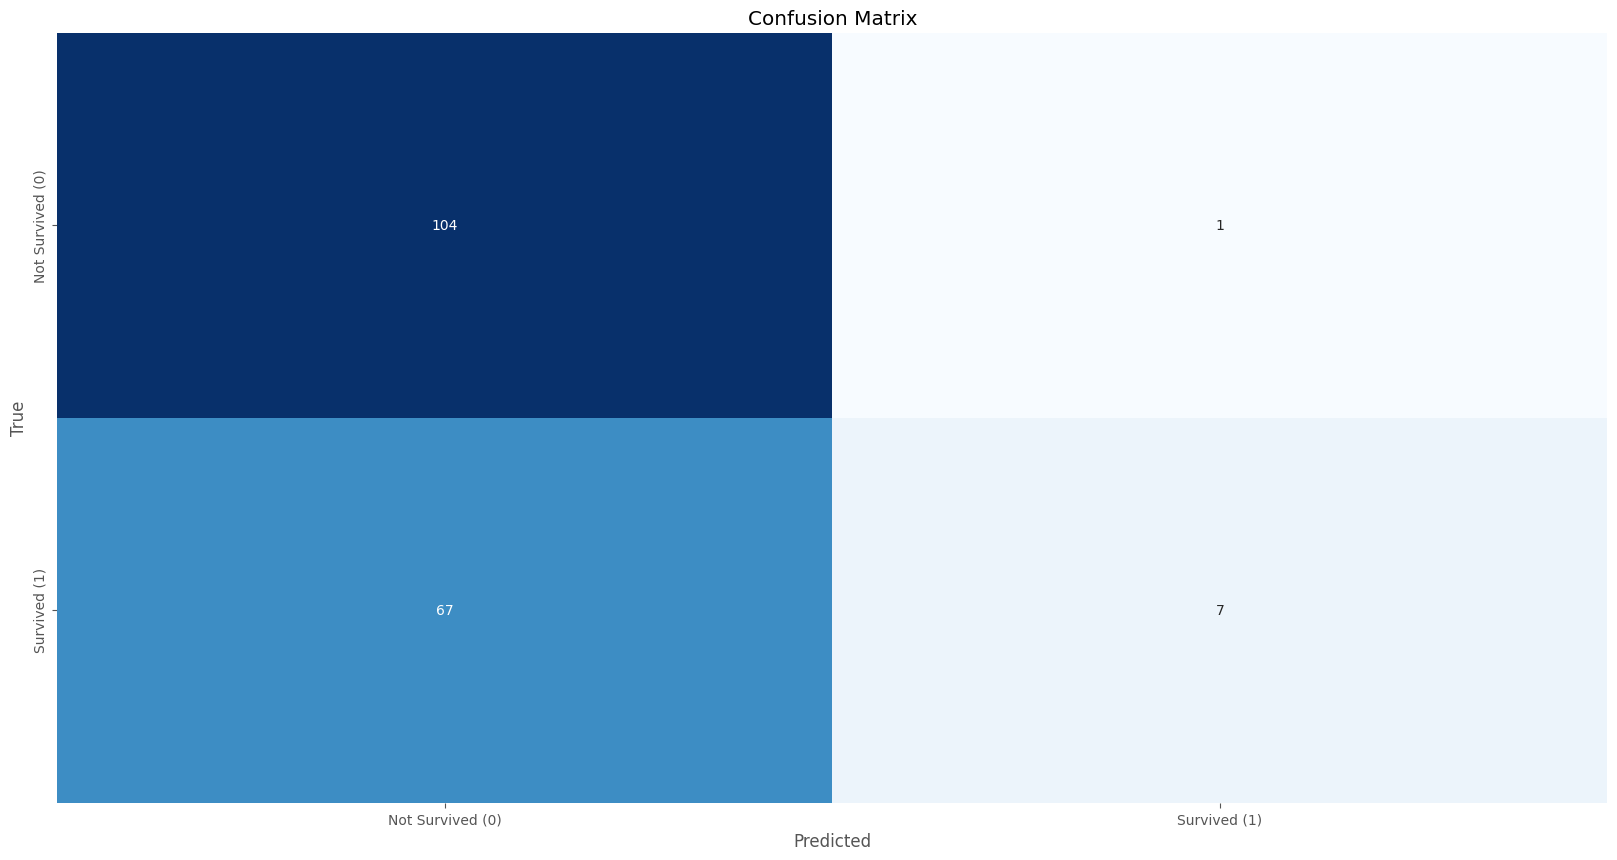

In [36]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived (0)', 'Survived (1)'],
            yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

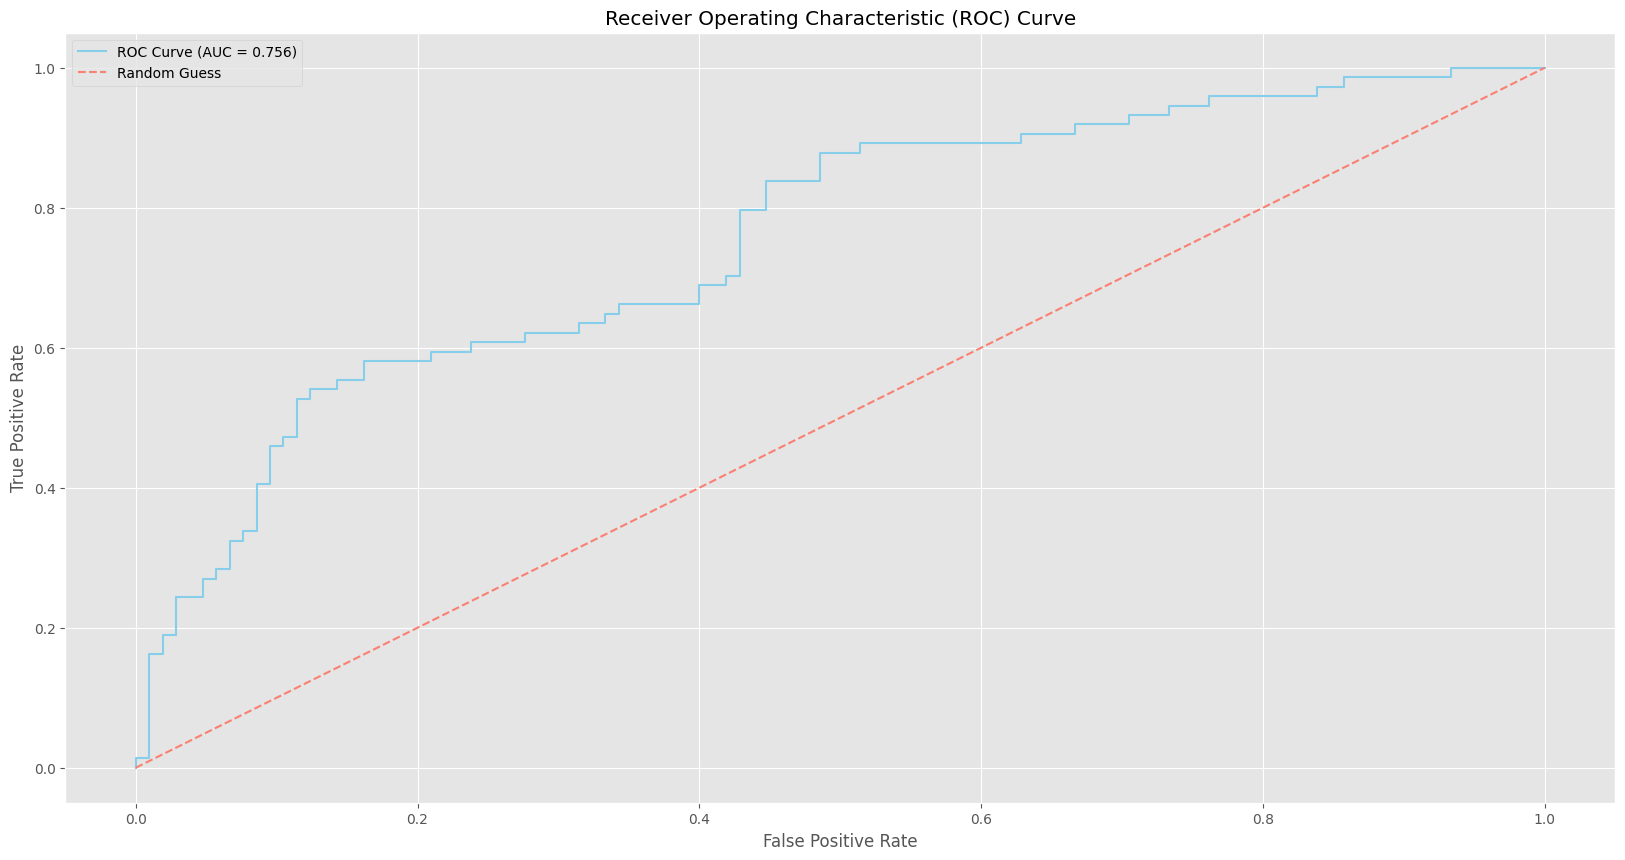

In [37]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='skyblue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='salmon', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

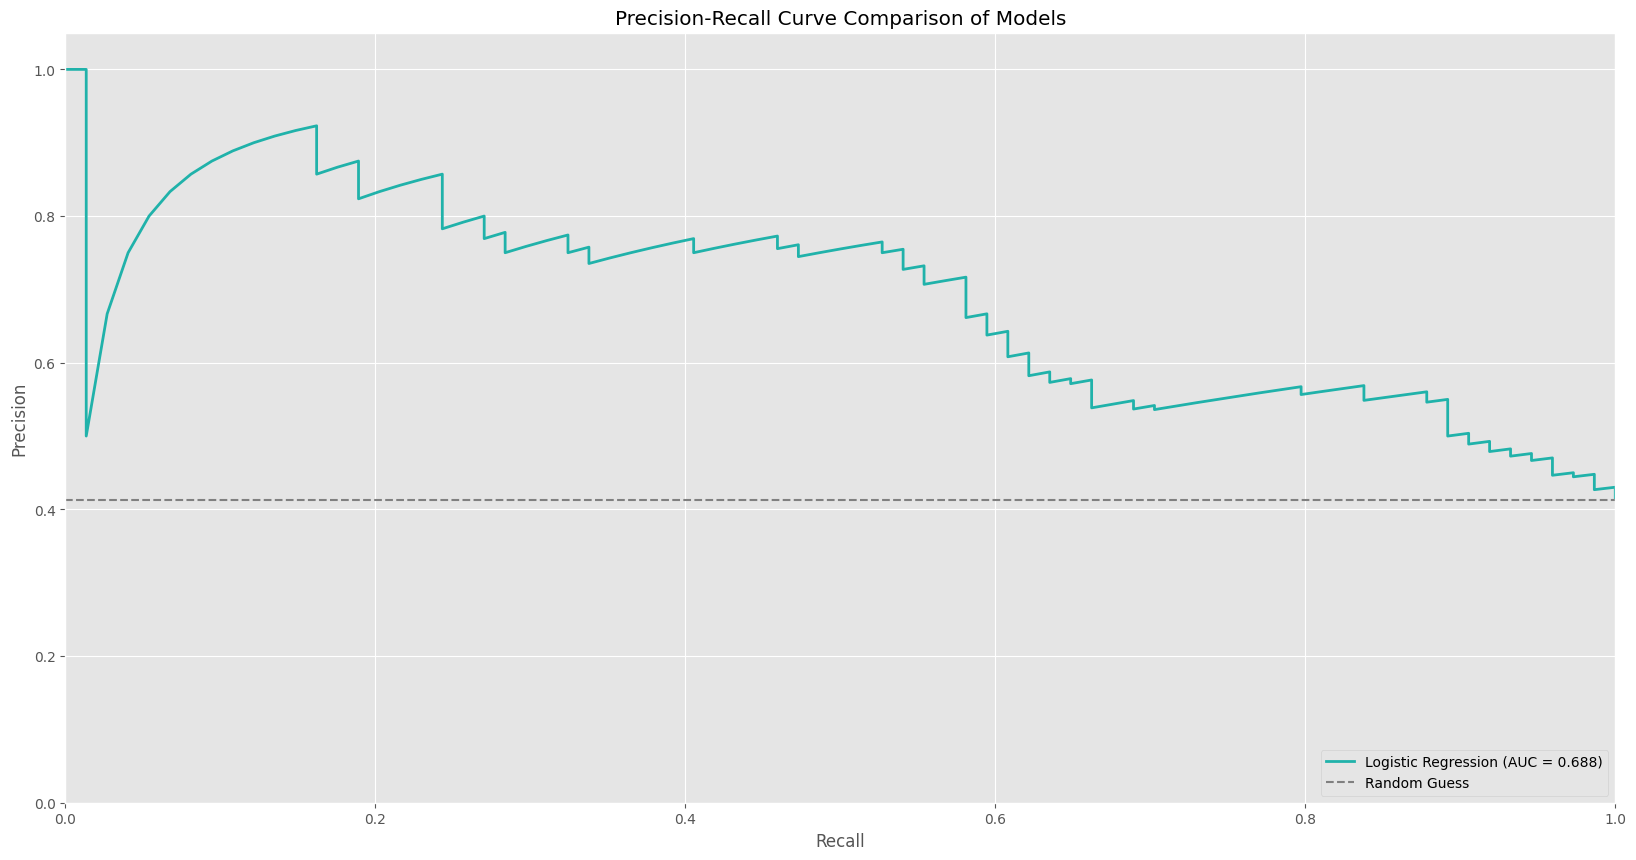

In [38]:
# Calculate the precision-recall curve for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc_lr = auc(recall_lr, precision_lr)

# Plot the Precision-Recall curves
plt.figure(figsize=(20, 10))
plt.plot(recall_lr, precision_lr, color='lightseagreen', lw=2, label=f'Logistic Regression (AUC = {pr_auc_lr:.3f})')

# Plot Precision-Recall curve for XGBoost (placeholder - replace y_predicted_XGB with actual probabilities)
# If you have y_predicted_XGB (probabilities from XGBoost), uncomment and use it
# precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_predicted_XGB)
# pr_auc_xgb = auc(recall_xgb, precision_xgb)
# plt.plot(recall_xgb, precision_xgb, color='lightcoral', lw=2, label=f'XGBoost Classifier (AUC = {pr_auc_xgb:.3f})')

# Add a baseline (random classifier precision = positive class fraction)
positive_class_fraction = sum(y_test) / len(y_test)  # Fraction of Survived=1 in y_test
plt.axhline(y=positive_class_fraction, color='gray', linestyle='--', label='Random Guess')

# Customize the plot to match the attached ROC plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison of Models')
plt.legend(loc='lower right')
plt.show()

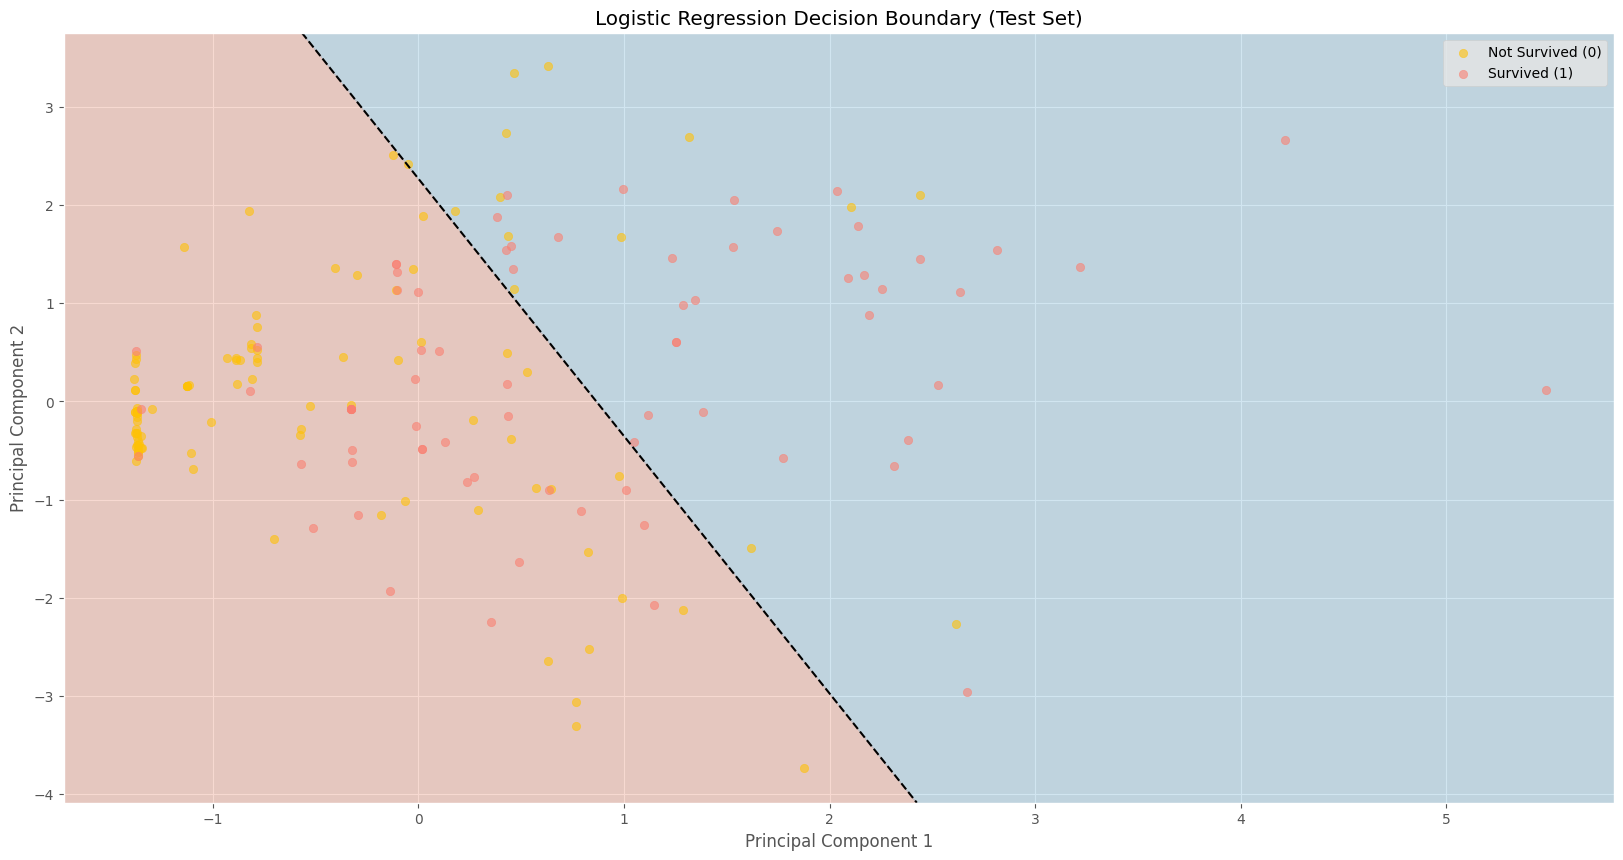

In [39]:
# Ensure x_train_scaled and x_test_scaled are NumPy arrays for easier manipulation
if not isinstance(x_train_scaled, np.ndarray):
    x_train_scaled = x_train_scaled.values
if not isinstance(x_test_scaled, np.ndarray):
    x_test_scaled = x_test_scaled.values

# Train the best model on the original (non-PCA) training data
best_model.fit(x_train_scaled, y_train)

# Reduce dimensionality to 2D using PCA (fit on training data)
#pca = PCA(n_components=2, random_state=42)
#x_train_pca = pca.fit_transform(x_train_scaled)  # Fit PCA on training data
#x_test_pca = pca.transform(x_test_scaled)  # Transform test data using the same PCA

# Create a mesh grid for plotting the decision boundary (based on test data range)
h = 0.02  # Step size in the mesh
# Compute tighter ranges with smaller padding (5% of the range)
x_range = x_test_pca[:, 0].max() - x_test_pca[:, 0].min()
y_range = x_test_pca[:, 1].max() - x_test_pca[:, 1].min()
padding_x = 0.05 * x_range  # 5% padding
padding_y = 0.05 * y_range  # 5% padding
x_min, x_max = x_test_pca[:, 0].min() - padding_x, x_test_pca[:, 0].max() + padding_x
y_min, y_max = x_test_pca[:, 1].min() - padding_y, x_test_pca[:, 1].max() + padding_y
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Transform the mesh grid back to the original feature space to make predictions
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original = pca.inverse_transform(mesh_points)  # Inverse transform to original space
Z = best_model.predict_proba(mesh_points_original)[:, 1]  # Predict probabilities using the original model
Z = Z.reshape(xx.shape)

# Plot the decision boundary and test data points
plt.figure(figsize=(20, 10))  # Adjusted size for better readability (original was 20, 10)
# Plot the decision boundary (where probability = 0.5)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.3)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')

# Plot the test data points, colored by their true labels
colors = ['#FFC107', 'salmon']  # Yellow for Not Survived (0), Salmon for Survived (1)
for label in np.unique(y_test):
    plt.scatter(
        x_test_pca[y_test == label, 0], 
        x_test_pca[y_test == label, 1], 
        color=colors[label], 
        label=f'{"Survived" if label == 1 else "Not Survived"} ({label})',
        alpha=0.6
    )

# Customize the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary (Test Set)')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

# Modeling with over-sampling

## Over-sampling

In [40]:
y_train_series = pd.Series(y_train)
print("\nClass Distribution After Undersampling:")
print(y_train_series.value_counts(normalize=True) * 100)


Class Distribution After Undersampling:
0    62.359551
1    37.640449
Name: proportion, dtype: float64


In [41]:
# Import required libraries
import pandas as pd
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)

# Convert y_train and y_resampled to pandas Series for value_counts
y_train_series = pd.Series(y_train, name='Survived')
y_resampled_series = pd.Series(y_resampled, name='Survived')

# Print class distribution before and after over-sampling
print("\nClass Distribution Before Over-Sampling:")
print(y_train_series.value_counts(normalize=True) * 100)

print("\nClass Distribution After Over-Sampling:")
print(y_resampled_series.value_counts(normalize=True) * 100)


Class Distribution Before Over-Sampling:
Survived
0    62.359551
1    37.640449
Name: proportion, dtype: float64

Class Distribution After Over-Sampling:
Survived
0    50.0
1    50.0
Name: proportion, dtype: float64


In [42]:
# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)

# Convert y_train and y_resampled to pandas Series for value_counts
y_train_series = pd.Series(y_train, name='Survived')
y_resampled_series = pd.Series(y_resampled, name='Survived')

# Print class distribution before and after over-sampling
print("\nClass Distribution Before Over-Sampling:")
print(y_train_series.value_counts(normalize=True) * 100)

print("\nClass Distribution After Over-Sampling:")
print(y_resampled_series.value_counts(normalize=True) * 100)


Class Distribution Before Over-Sampling:
Survived
0    62.359551
1    37.640449
Name: proportion, dtype: float64

Class Distribution After Over-Sampling:
Survived
0    50.0
1    50.0
Name: proportion, dtype: float64


## Dimensionality Reduction 

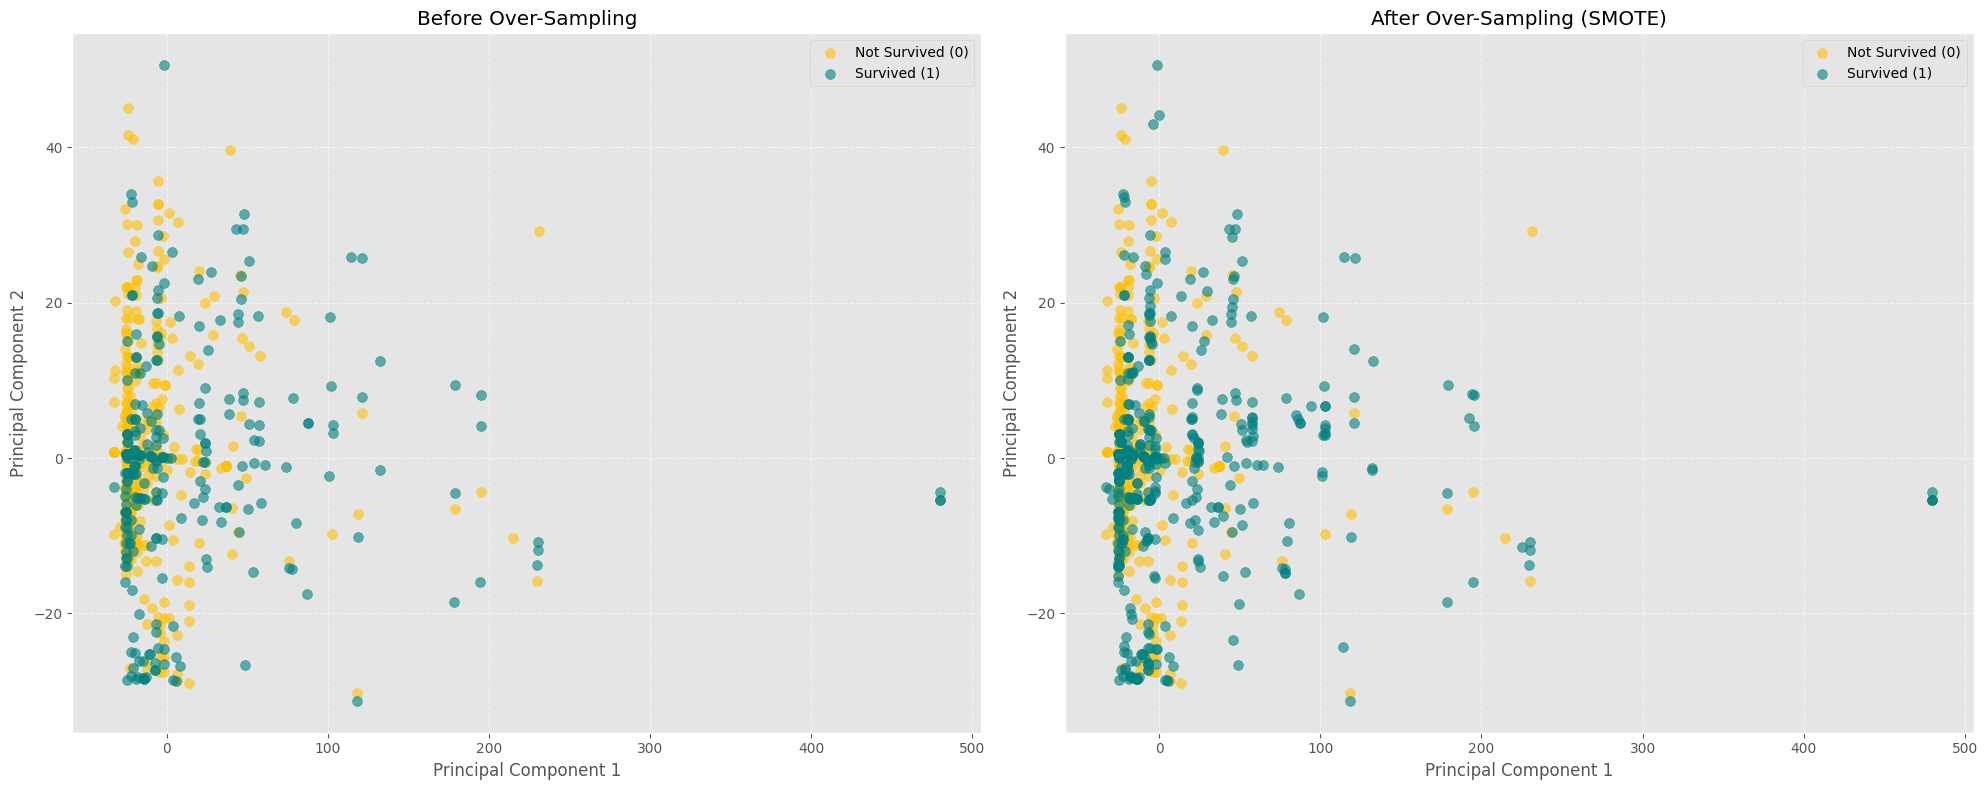

In [43]:
# Apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2, random_state=42)

# Fit PCA on the original training data and transform both datasets
x_train_pca = pca.fit_transform(x_train)
x_resampled_pca = pca.transform(x_resampled)

# Create DataFrames for plotting
df_before = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2'])
df_before['Survived'] = y_train

df_after = pd.DataFrame(x_resampled_pca, columns=['PC1', 'PC2'])
df_after['Survived'] = y_resampled

# Define a color palette for the two classes (matching the attached plot)
# Yellow for 0 ("Not Survived"), Cyan/Teal for 1 ("Survived")
colors = ['#FFC107', 'teal'] # Yellow and teal to match the plot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # 1 row, 2 columns

# Plot 1: Before Over-Sampling
ax1 = axes[0] # Access the first subplot
for label in np.unique(y_train):
    ax1.scatter(
        df_before[df_before['Survived'] == label]['PC1'],
        df_before[df_before['Survived'] == label]['PC2'],
        color=colors[label],
        label=f'{"Survived" if label == 1 else "Not Survived"} ({label})',
        alpha=0.6,
        s=50 # Adjusted marker size for clarity
    )
ax1.set_xlabel('Principal Component 1') # Added x-label
ax1.set_ylabel('Principal Component 2') # Added y-label
ax1.set_title('Before Over-Sampling')
ax1.legend(loc='best')
ax1.grid(True, linestyle='--', alpha=0.6) # Added grid

# Plot 2: After Over-Sampling (Resampling with SMOTE)
ax2 = axes[1] # Access the second subplot
for label in np.unique(y_resampled):
    ax2.scatter(
        df_after[df_after['Survived'] == label]['PC1'],
        df_after[df_after['Survived'] == label]['PC2'],
        color=colors[label],
        label=f'{"Survived" if label == 1 else "Not Survived"} ({label})',
        alpha=0.6,
        s=50 # Adjusted marker size for clarity
    )
ax2.set_xlabel('Principal Component 1') # Added x-label
ax2.set_ylabel('Principal Component 2') # Added y-label
ax2.set_title('After Over-Sampling (SMOTE)')
ax2.legend(loc='best')
ax2.grid(True, linestyle='--', alpha=0.6) # Added grid

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

# Modeling

In [44]:
# Logistic regression for classification
model_over = LogisticRegression()

# Fit the model on the training data
model_over.fit(x_resampled, y_resampled)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, x_resampled, y_resampled, cv=5, scoring='accuracy')  # Use 'accuracy' for classification

# Print the results
print(f"\tK-Fold Cross-Validation Accuracy:", cv_scores)
print('-'*100)
print(f'\tAverage K-Fold Cross-Validation Accuracy: {cv_scores.mean()}')
print('-'*100)

	K-Fold Cross-Validation Accuracy: [0.78651685 0.79213483 0.76966292 0.81355932 0.7740113 ]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.7871770456420999
----------------------------------------------------------------------------------------------------


## Hyperparameters Tuning

In [45]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga']),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'none', 'elasticnet']),
        'tol': trial.suggest_float('tol', 1e-6, 1e-2, log=True),
        'max_iter': trial.suggest_int('max_iter', 1000, 10000),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'random_state': 42
    }
    
    # Only suggest l1_ratio if penalty is elasticnet
    if params['penalty'] == 'elasticnet':
        params['l1_ratio'] = trial.suggest_float('l1_ratio', 0, 1)
    
    try:
        model = LogisticRegression(**params)
        cv_scores = cross_val_score(model, x_resampled, y_resampled, cv=10, scoring='accuracy')
        return cv_scores.mean()
    except ValueError:
        return 0.0

# Create an Optuna study
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=30)

# Get the best trial
best_trial = study.best_trial

# Print the best hyperparameters and score
print("\tBest Hyperparameters:", best_trial.params)
print('-'*100)
print(f"\tBest Cross-Validation Accuracy: {best_trial.value}")
print('-'*100)

# Train the best model with the best hyperparameters
best_params = best_trial.params
best_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    l1_ratio=best_params.get('l1_ratio', None),  # Only include if penalty='elasticnet'
    tol=best_params['tol'],
    max_iter=best_params['max_iter'],
    class_weight=best_params['class_weight'],
    fit_intercept=best_params['fit_intercept']
)
best_model.fit(x_resampled, y_resampled)

# Evaluate the best model using cross-validation (for confirmation)
cv_scores = cross_val_score(best_model, x_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"\tK-Fold Cross-Validation Accuracy with Best Model:", cv_scores)
print('-'*100)
print(f'\tAverage K-Fold Cross-Validation Accuracy with Best Model: {cv_scores.mean()}')
print('-'*100)

[I 2025-08-19 16:34:06,095] A new study created in memory with name: no-name-9f8b14ac-a8b2-474b-aa39-b86a9f393745
[I 2025-08-19 16:34:06,116] Trial 0 finished with value: 0.0 and parameters: {'C': 0.1767016940294795, 'solver': 'liblinear', 'penalty': 'elasticnet', 'tol': 0.00025378155082656634, 'max_iter': 7373, 'class_weight': 'balanced', 'fit_intercept': True, 'l1_ratio': 0.18182496720710062}. Best is trial 0 with value: 0.0.
[I 2025-08-19 16:34:08,354] Trial 1 finished with value: 0.7397344228804903 and parameters: {'C': 0.012601639723276799, 'solver': 'lbfgs', 'penalty': 'l2', 'tol': 2.9204338471814107e-05, 'max_iter': 5105, 'class_weight': None, 'fit_intercept': False}. Best is trial 1 with value: 0.7397344228804903.
[I 2025-08-19 16:34:08,443] Trial 2 finished with value: 0.6598953013278857 and parameters: {'C': 0.0018997763474111276, 'solver': 'liblinear', 'penalty': 'l2', 'tol': 2.4586032763280077e-06, 'max_iter': 7158, 'class_weight': None, 'fit_intercept': True}. Best is tria

	Best Hyperparameters: {'C': 0.3900737414992991, 'solver': 'saga', 'penalty': 'l2', 'tol': 0.00026860553549628403, 'max_iter': 3083, 'class_weight': 'balanced', 'fit_intercept': False}
----------------------------------------------------------------------------------------------------
	Best Cross-Validation Accuracy: 0.7735827374872318
----------------------------------------------------------------------------------------------------
	K-Fold Cross-Validation Accuracy with Best Model: [0.78651685 0.78089888 0.75842697 0.77966102 0.74011299]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy with Best Model: 0.7691233415857297
----------------------------------------------------------------------------------------------------


## Regularization path

### Regularization path (before tuning hyperparameters)

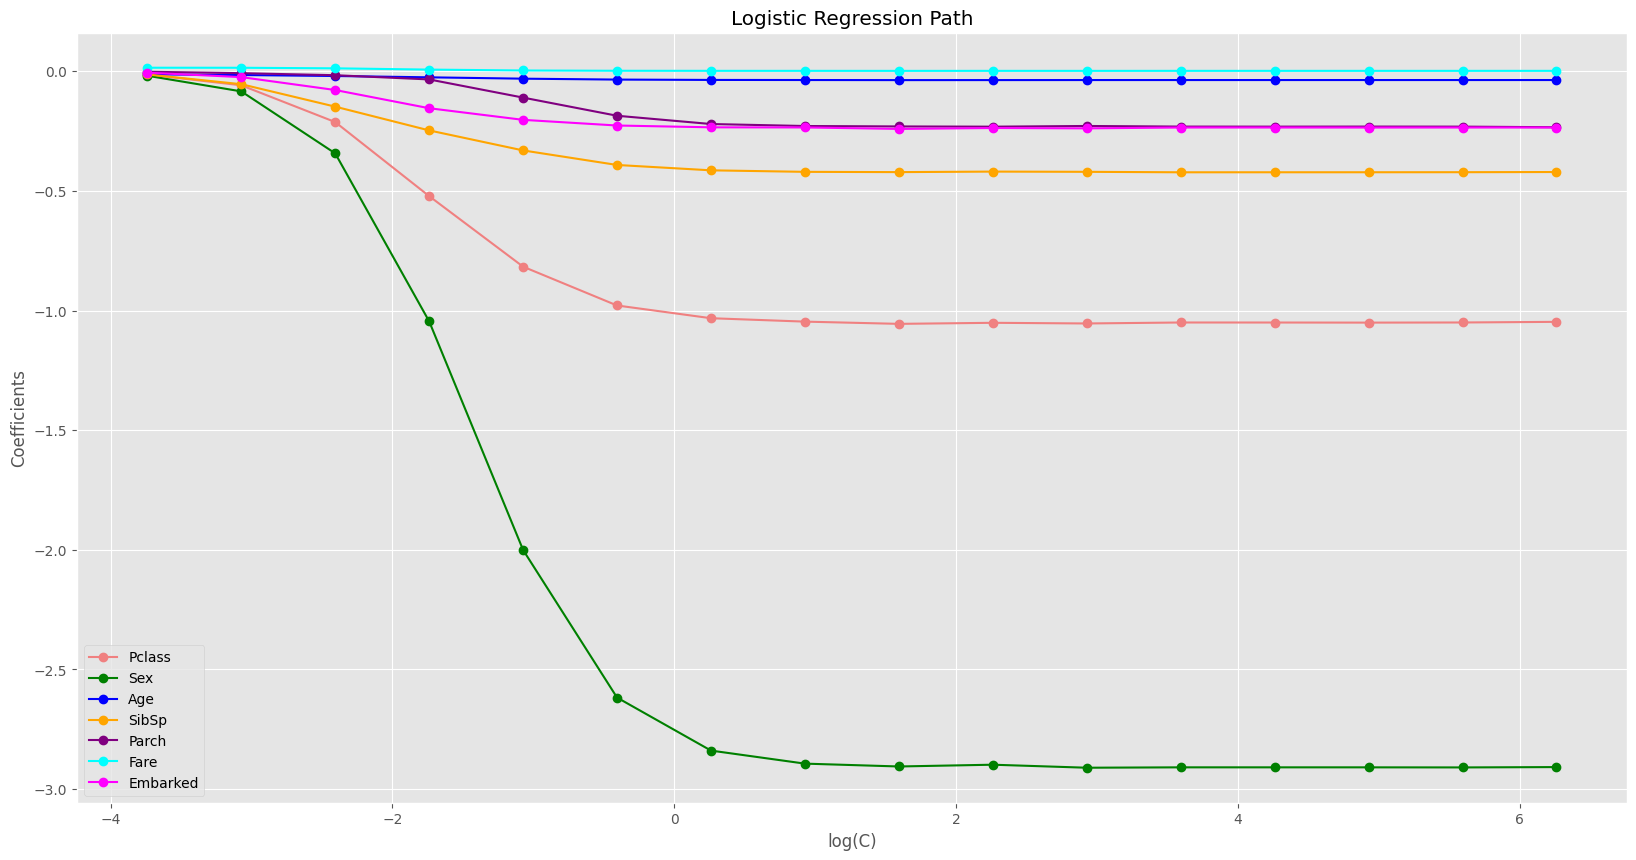

In [46]:
# Compute the coefficient paths for L1-regularized logistic regression
# Compute the range of C values using l1_min_c
cs = l1_min_c(x_resampled, y_resampled, loss="log") * np.logspace(0, 10, 16)

# Initialize the logistic regression model with L1 penalty
#clf = LogisticRegression(
#    penalty="l1",
#    solver="liblinear",
#    tol=1e-6,
#    max_iter=int(1e6),
#    warm_start=True,
#    intercept_scaling=10000.0,
#)
clf = LogisticRegression()

# Compute the coefficients for each value of C
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(x_resampled, y_resampled)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

# Plot the coefficient paths
plt.figure(figsize=(20, 10))
# Define a color palette for the 7 features
colors = ['lightcoral', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
# Feature names for the Titanic dataset
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Plot each feature's coefficient path with a different color
for i in range(coefs_.shape[1]):  # Loop over each feature (7 features)
    plt.plot(np.log10(cs), coefs_[:, i], marker="o", color=colors[i], label=feature_names[i])

# Customize the plot
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")

# Optionally add a legend (the provided plot doesn't have one, but we can include it for clarity)
plt.legend(loc='best')

# Show the plot
plt.show()

### Regularization path (after tuning hyperparameters)

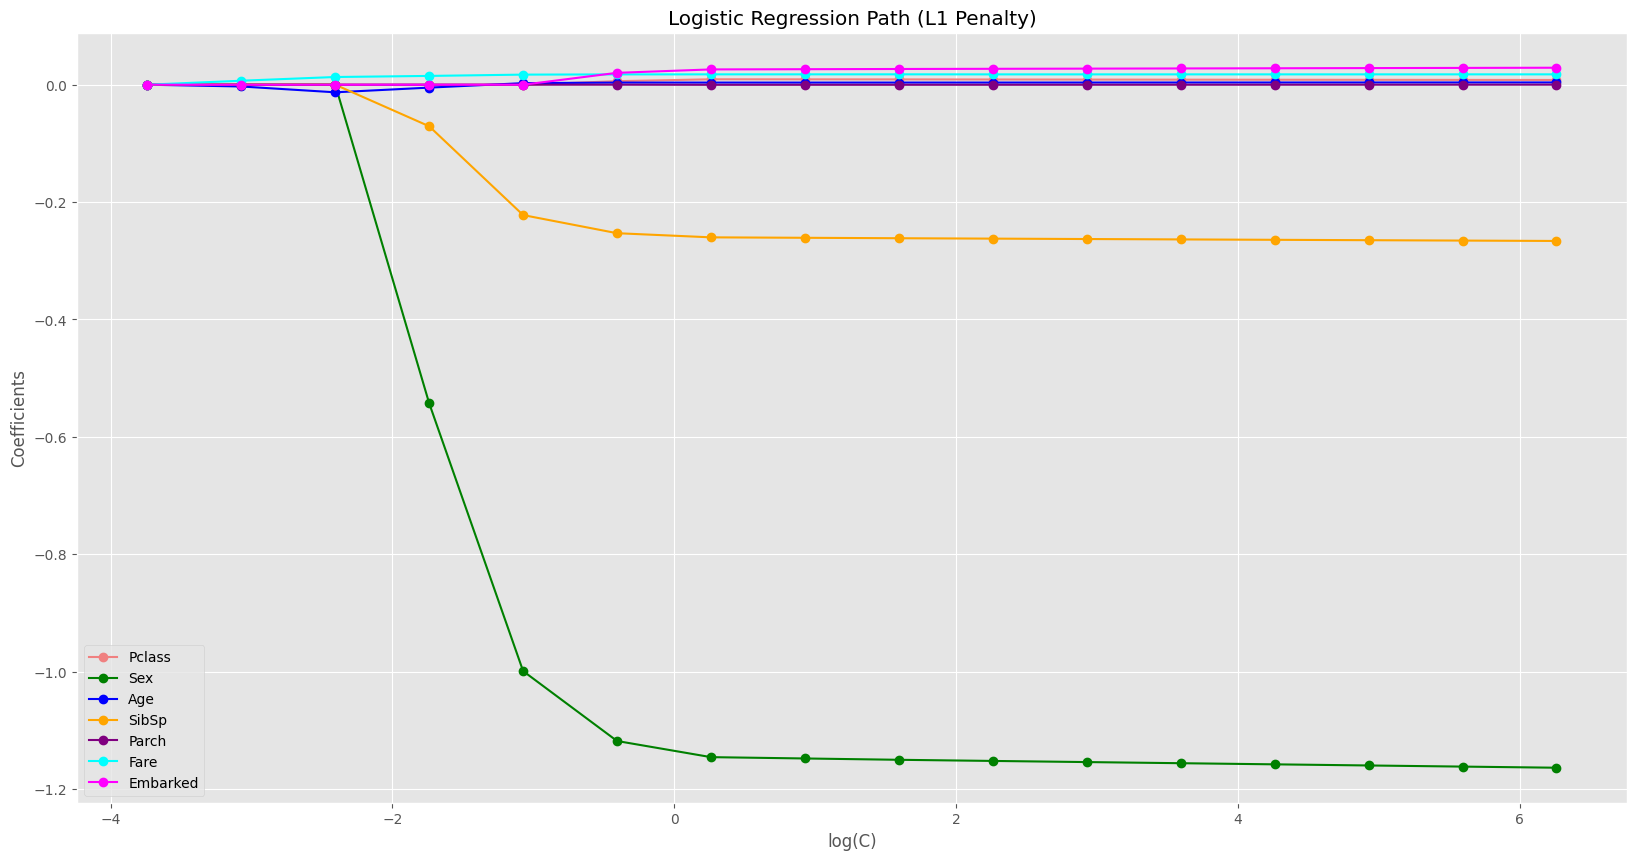

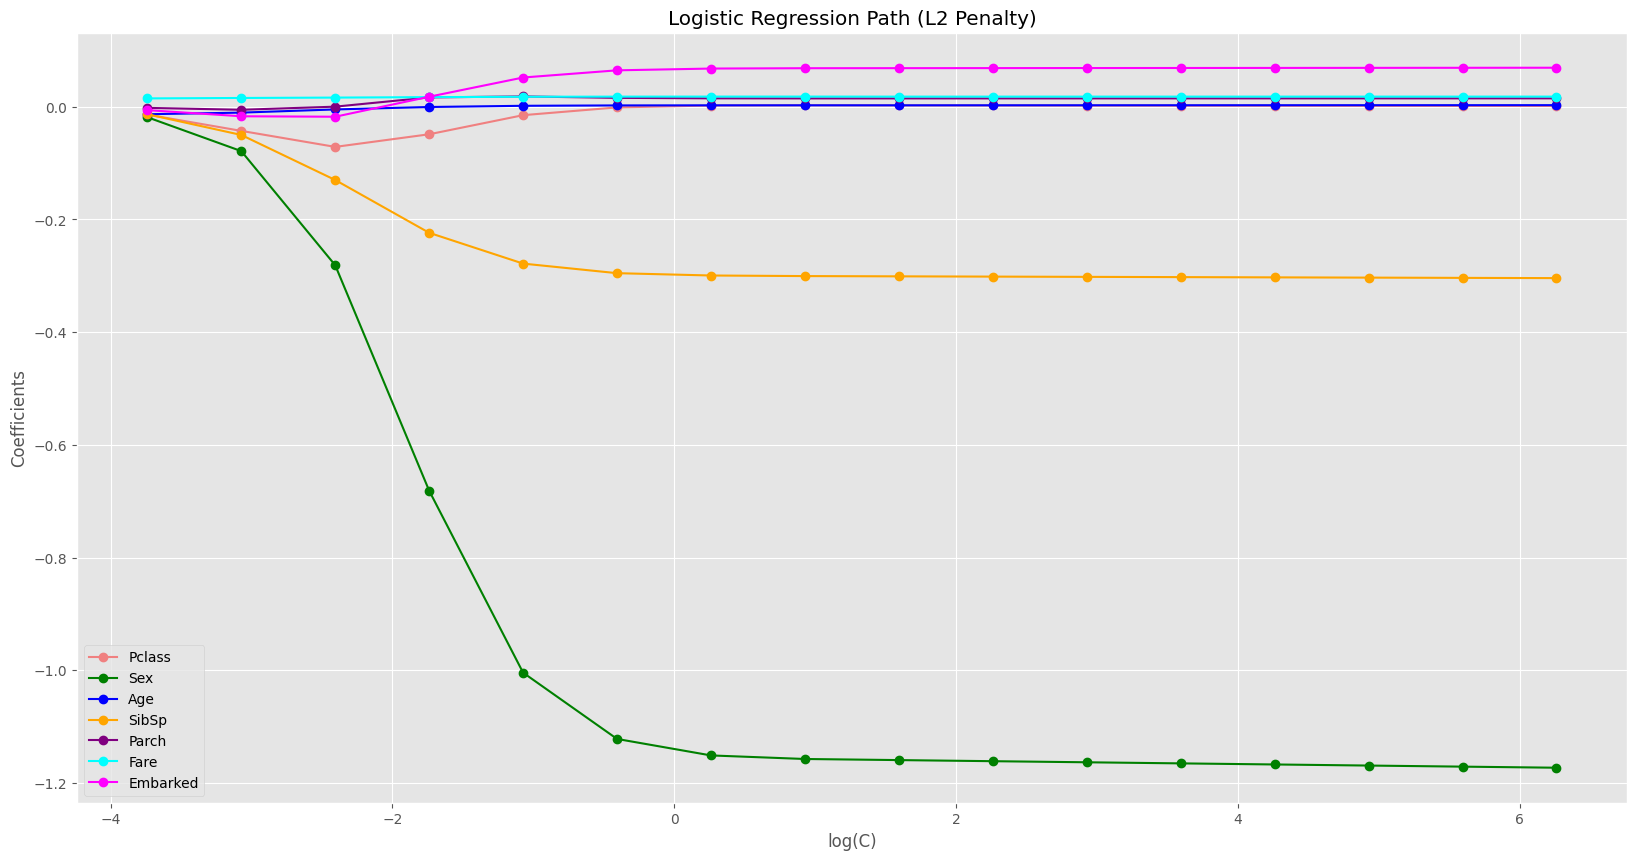

In [47]:
# Compute the range of C values using l1_min_c on the resampled dataset
cs = l1_min_c(x_resampled, y_resampled, loss="log") * np.logspace(0, 10, 16)

# Function to compute and plot the regularization path for a given penalty
def plot_regularization_path(penalty, title_suffix):
    # Initialize the logistic regression model with the best hyperparameters
    clf = LogisticRegression(
        penalty=penalty,
        solver=best_params['solver'],  # Use best solver from Optuna
        tol=best_params['tol'],  # Use best tol from Optuna
        max_iter=best_params['max_iter'],  # Use best max_iter from Optuna
        class_weight=best_params['class_weight'],  # Use best class_weight from Optuna
        fit_intercept=best_params['fit_intercept'],  # Use best fit_intercept from Optuna
        warm_start=True,  # Keep warm_start for efficiency
        random_state=42
    )

    # Compute the coefficients for each value of C
    coefs_ = []
    for c in cs:
        clf.set_params(C=c)
        clf.fit(x_resampled, y_resampled)  # Use resampled dataset
        coefs_.append(clf.coef_.ravel().copy())

    coefs_ = np.array(coefs_)

    # Plot the coefficient paths
    plt.figure(figsize=(20, 10))  # Adjusted size for better readability
    # Define a color palette for the 7 features
    colors = ['lightcoral', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta']
    # Feature names for the Titanic dataset
    feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

    # Plot each feature's coefficient path with a different color
    for i in range(coefs_.shape[1]):  # Loop over each feature (7 features)
        plt.plot(np.log10(cs), coefs_[:, i], marker="o", color=colors[i], label=feature_names[i])

    # Customize the plot
    plt.xlabel("log(C)")
    plt.ylabel("Coefficients")
    plt.title(f"Logistic Regression Path ({title_suffix})")
    plt.axis("tight")
    plt.legend(loc='best')
    plt.grid(True)  # Added grid for better readability
    plt.show()

# Plot the regularization path for penalty='l1'
plot_regularization_path(penalty="l1", title_suffix="L1 Penalty")

# Plot the regularization path for penalty='l2'
plot_regularization_path(penalty="l2", title_suffix="L2 Penalty")

## S-shaped curve and Threshold value

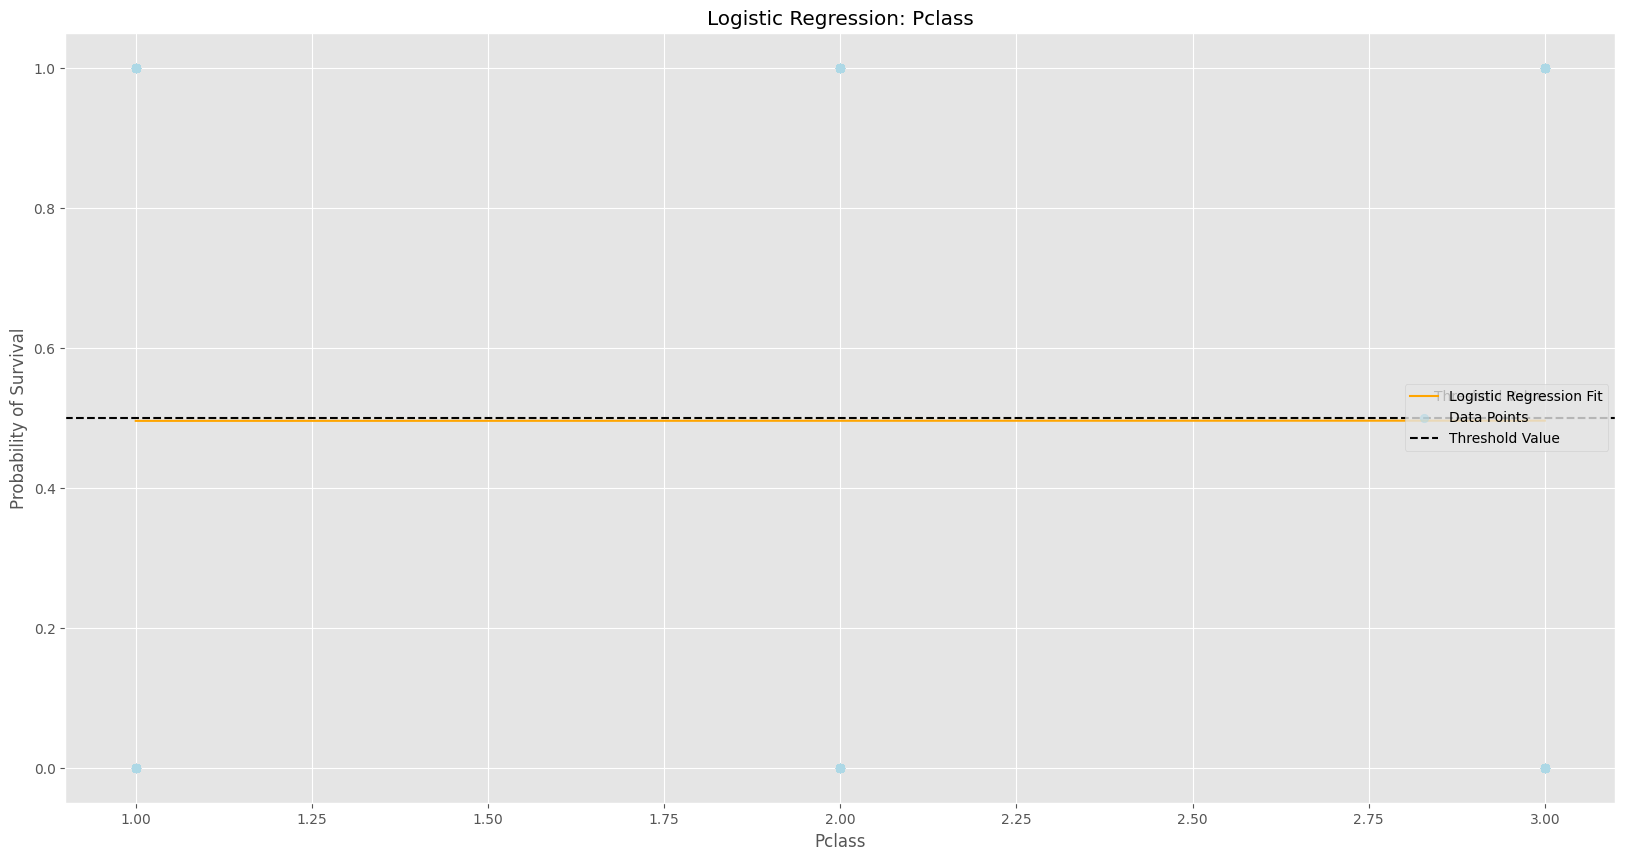

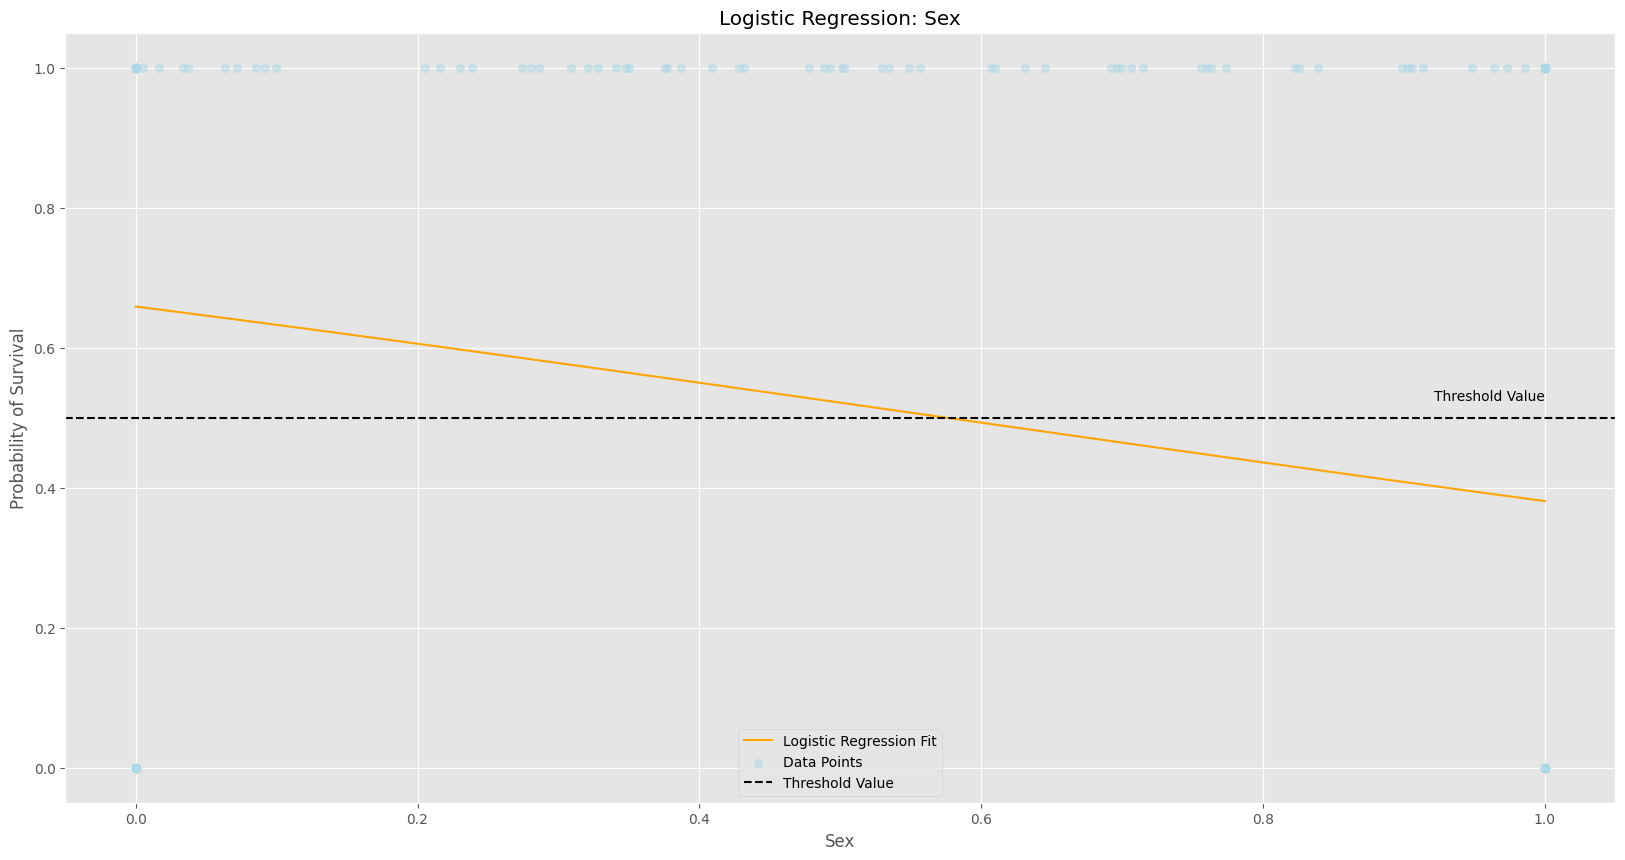

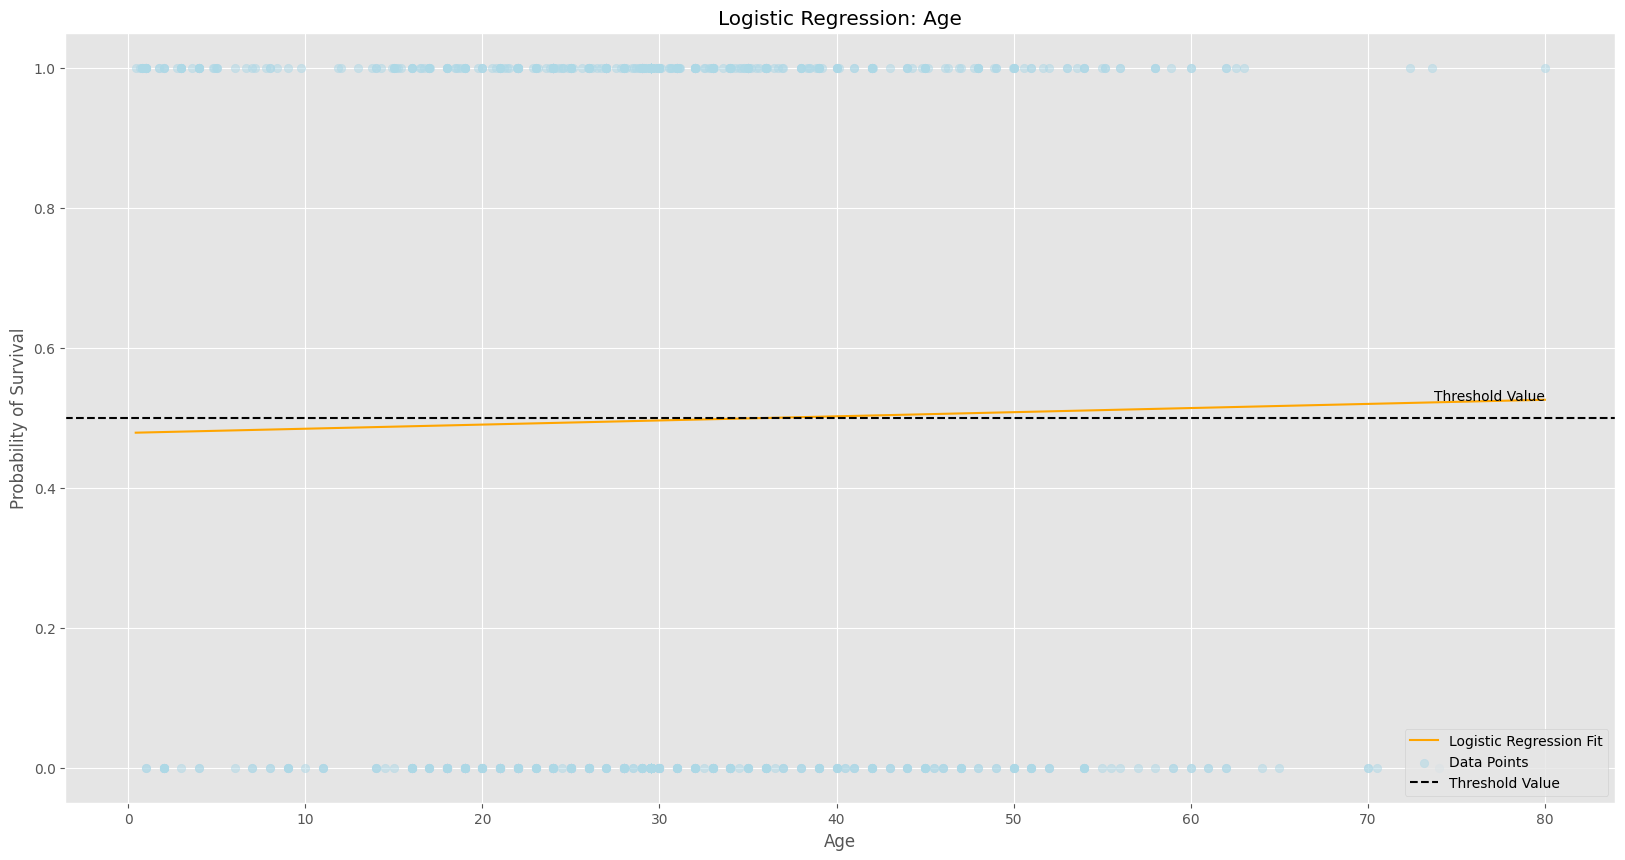

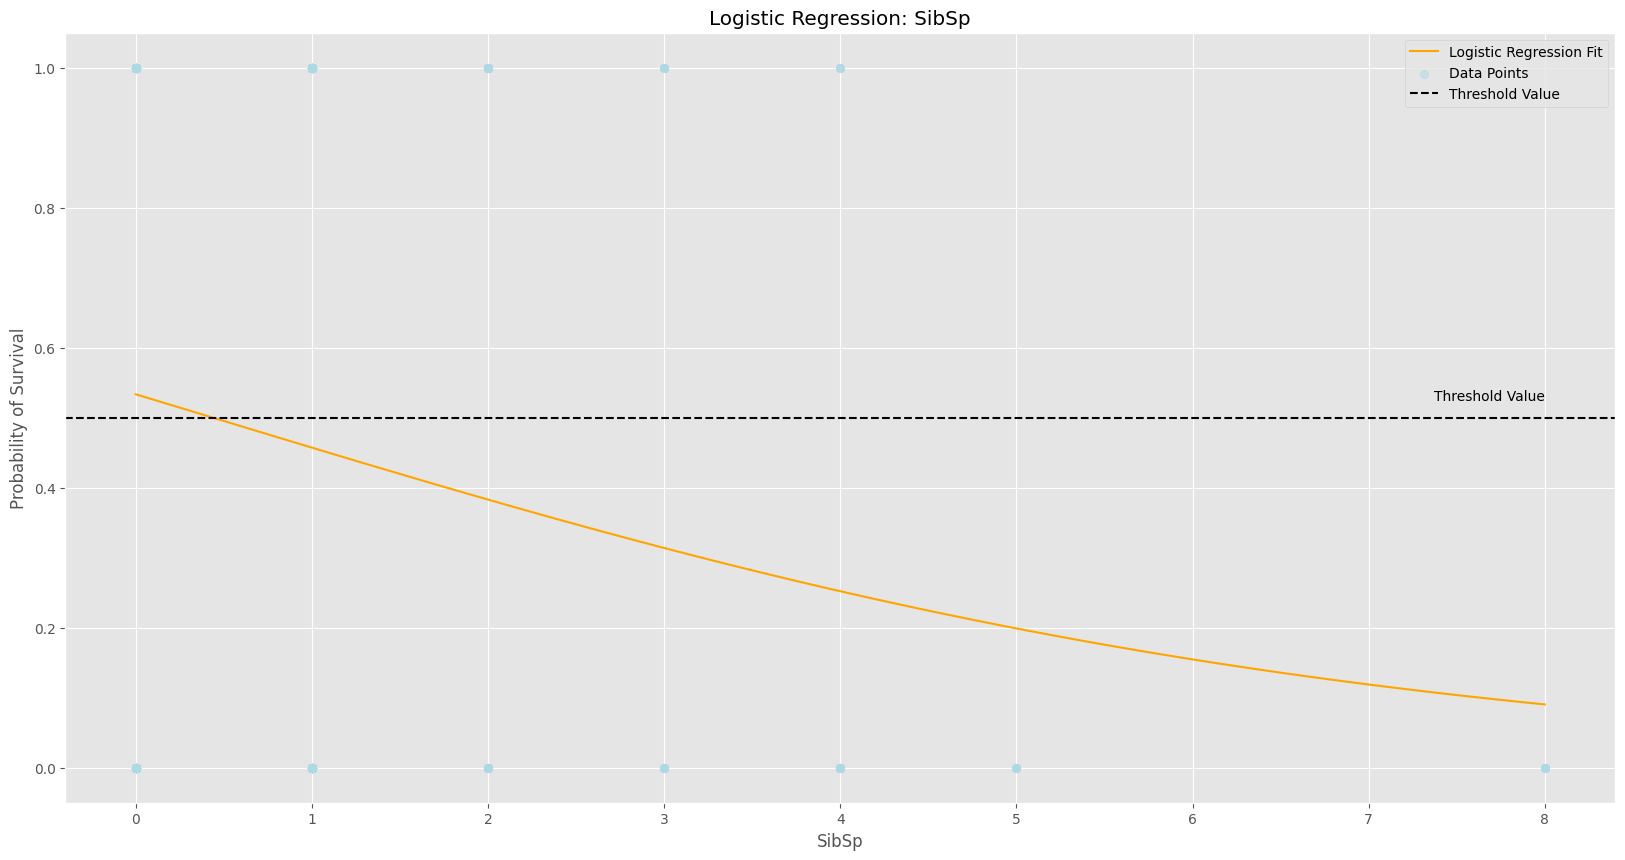

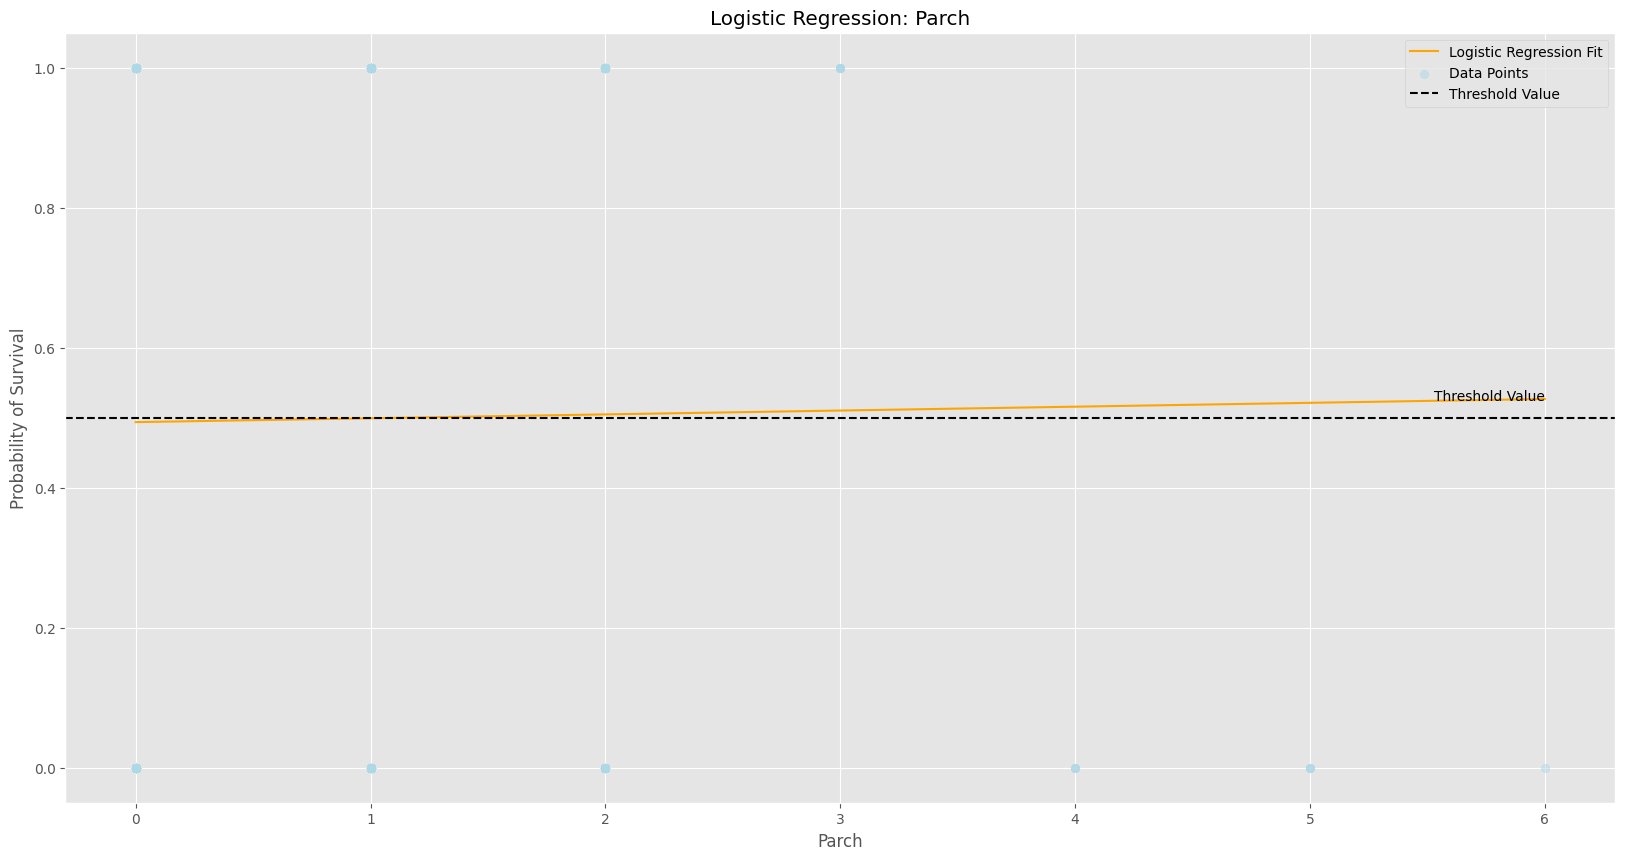

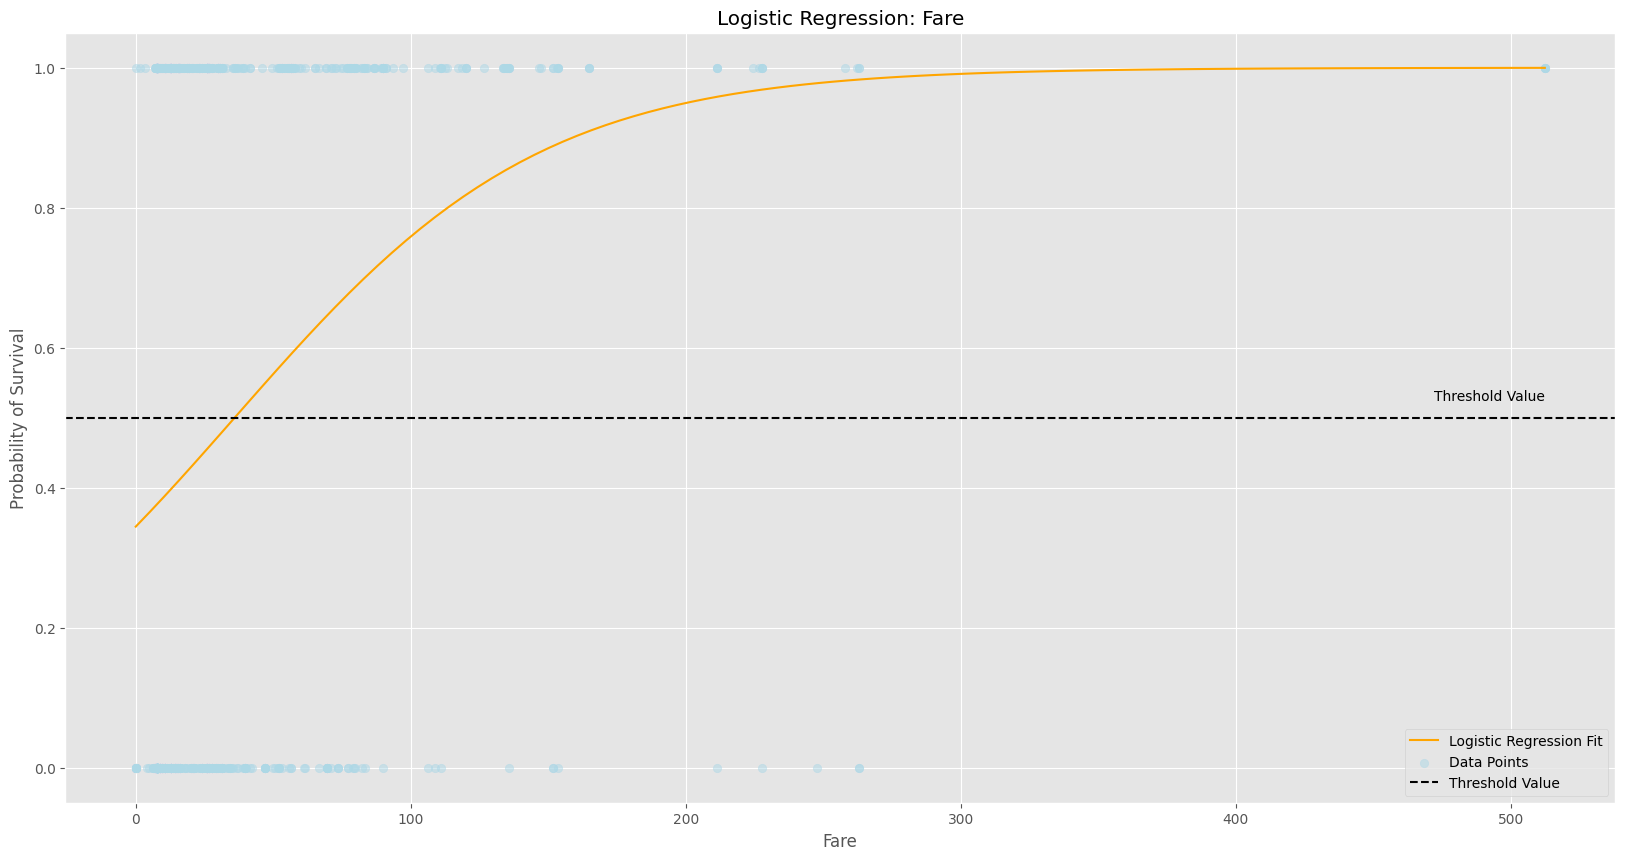

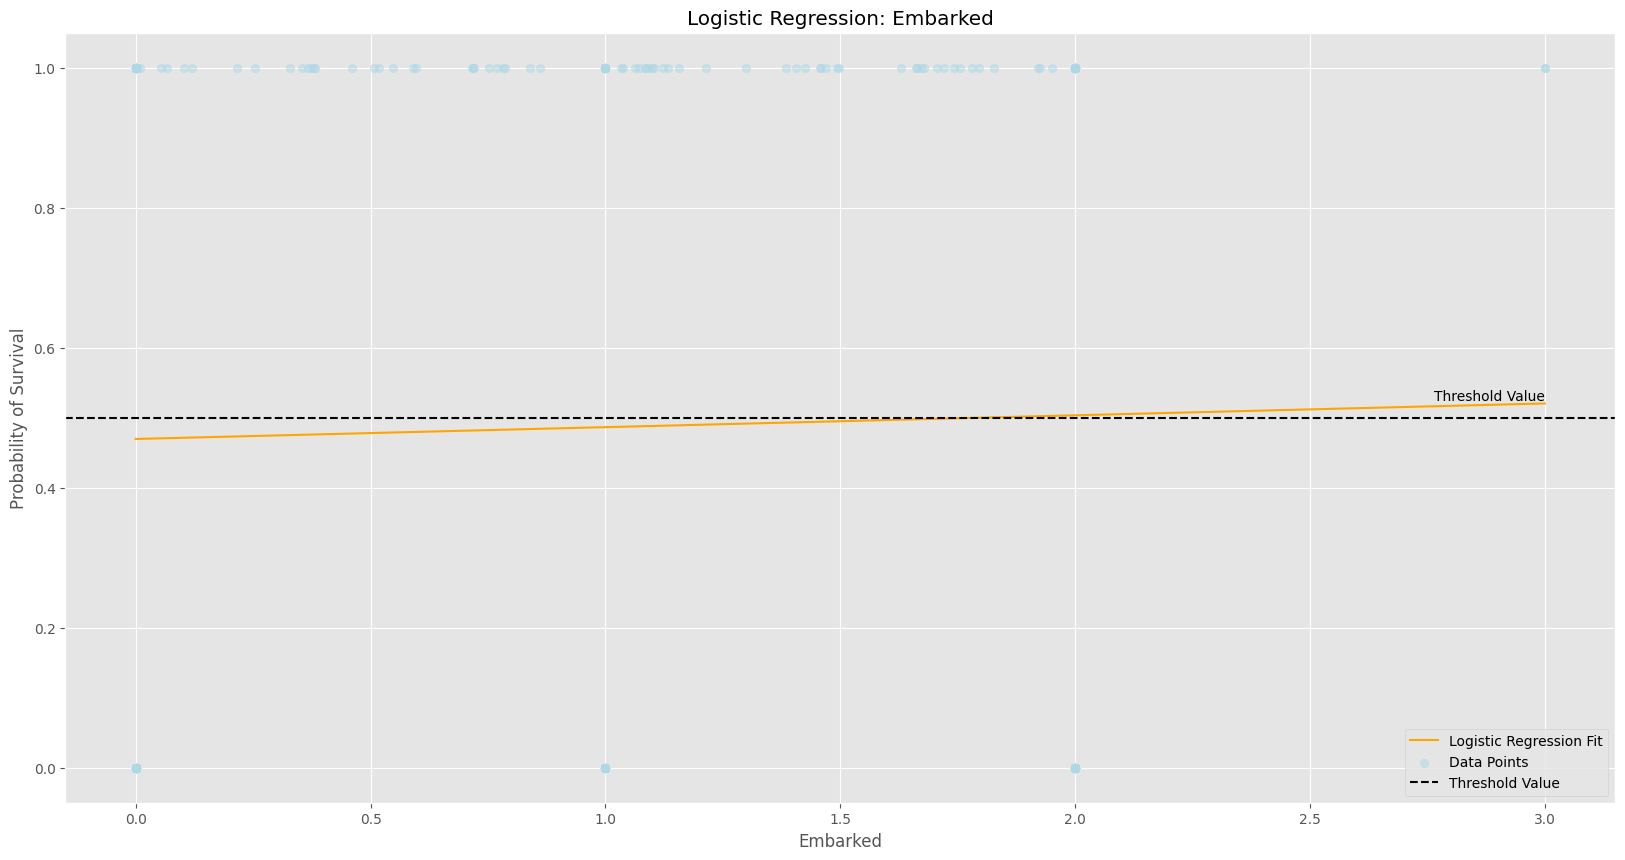

In [48]:
# --- S-shaped Curve and Threshold Value ---
# Initialize the logistic regression model with the best hyperparameters
clf = LogisticRegression(
    penalty=best_params['penalty'],  # Use best penalty from Optuna
    solver=best_params['solver'],  # Use best solver from Optuna
    tol=best_params['tol'],  # Use best tol from Optuna
    max_iter=best_params['max_iter'],  # Use best max_iter from Optuna
    class_weight=best_params['class_weight'],  # Use best class_weight from Optuna
    fit_intercept=best_params['fit_intercept'],  # Use best fit_intercept from Optuna
    random_state=42
)

# Fit the model on the resampled data
clf.fit(x_resampled, y_resampled)

# Feature names for the Titanic dataset
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Ensure x_resampled is a NumPy array for easier manipulation
if not isinstance(x_resampled, np.ndarray):
    x_resampled = x_resampled.values

# Compute the mean of each feature (to hold other features constant)
feature_means = np.mean(x_resampled, axis=0)

# Plot the sigmoid curve for each feature
for feature_idx, feature_name in enumerate(feature_names):
    # Create a range of values for the feature of interest
    feature_min = np.min(x_resampled[:, feature_idx])
    feature_max = np.max(x_resampled[:, feature_idx])
    feature_range = np.linspace(feature_min, feature_max, 100)

    # Create a synthetic dataset where all other features are at their mean
    synthetic_data = np.tile(feature_means, (100, 1))  # Repeat the mean vector 100 times
    synthetic_data[:, feature_idx] = feature_range  # Vary the feature of interest

    # Predict probabilities using the fitted model
    probabilities = clf.predict_proba(synthetic_data)[:, 1]  # Probability of Survived=1

    # Plot the sigmoid curve
    plt.figure(figsize=(20, 10))  # Adjusted size for better readability
    plt.plot(feature_range, probabilities, color='orange', label='Logistic Regression Fit')

    # Overlay the actual data points
    plt.scatter(x_resampled[:, feature_idx], y_resampled, color='lightblue', alpha=0.5, label='Data Points')

    # Add the threshold line
    plt.axhline(y=0.5, color='black', linestyle='--', label='Threshold Value')
    plt.text(feature_max, 0.52, 'Threshold Value', verticalalignment='bottom', horizontalalignment='right')

    # Customize the plot
    plt.xlabel(feature_name)
    plt.ylabel('Probability of Survival')
    plt.title(f'Logistic Regression: {feature_name}')
    plt.legend(loc='best')
    plt.grid(True)

    # Show the plot
    plt.show()

## Decision Boundary

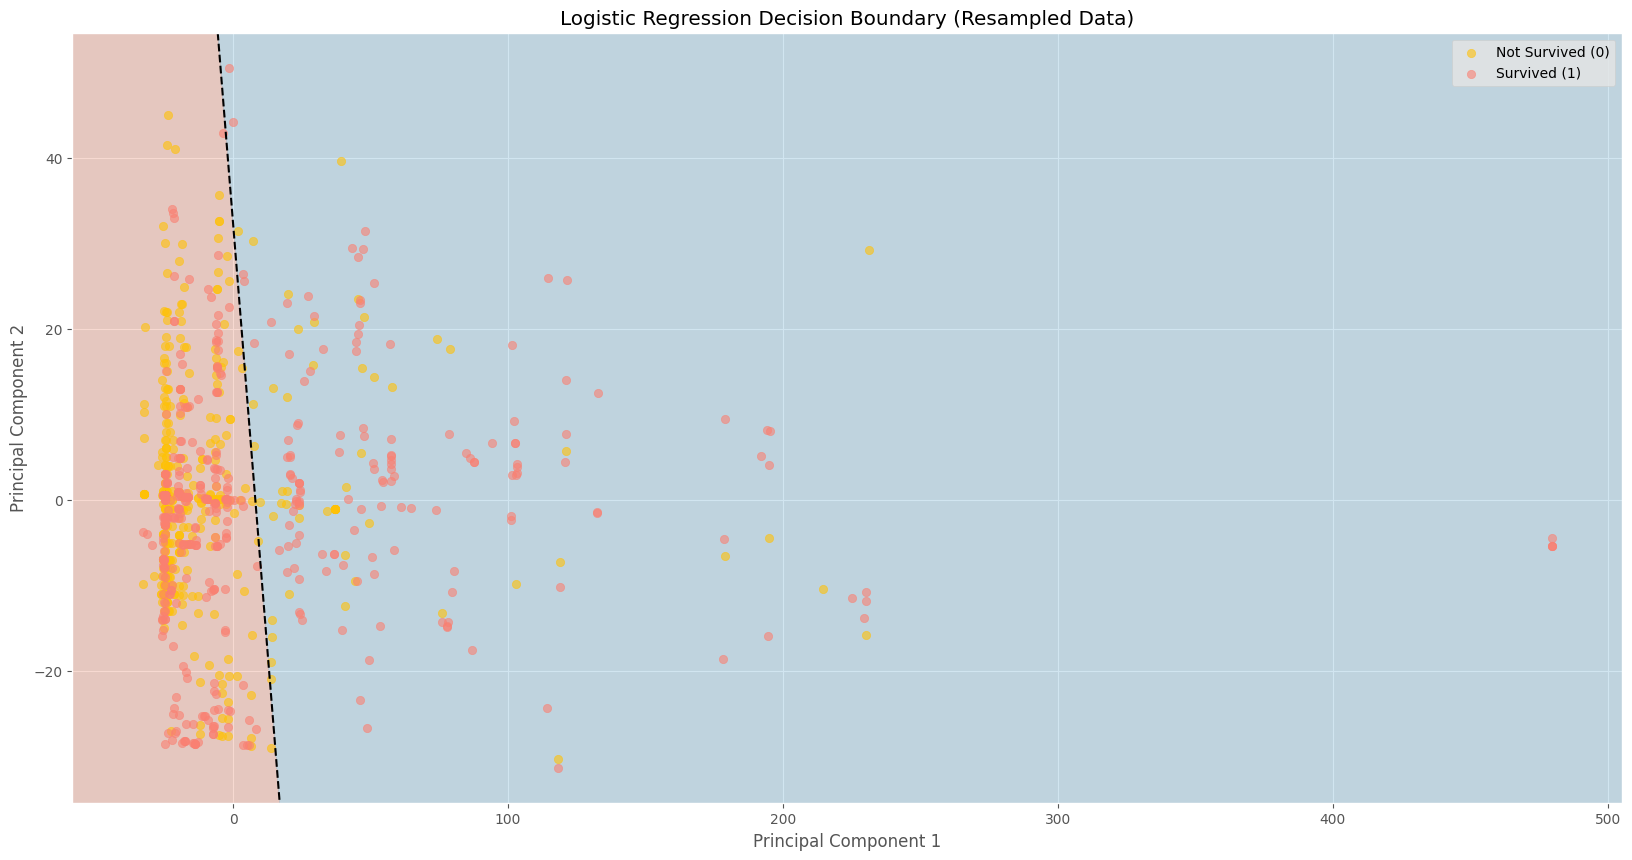

In [49]:
# --- Decision Boundary ---
#rom sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
#pca = PCA(n_components=2, random_state=42)
#x_resampled_pca = pca.fit_transform(x_resampled)  # Fit PCA on the resampled data

# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size in the mesh
# Use tighter ranges with smaller padding (5% of the range) to avoid empty space
x_range = x_resampled_pca[:, 0].max() - x_resampled_pca[:, 0].min()
y_range = x_resampled_pca[:, 1].max() - x_resampled_pca[:, 1].min()
padding_x = 0.05 * x_range  # 5% padding
padding_y = 0.05 * y_range  # 5% padding
x_min, x_max = x_resampled_pca[:, 0].min() - padding_x, x_resampled_pca[:, 0].max() + padding_x
y_min, y_max = x_resampled_pca[:, 1].min() - padding_y, x_resampled_pca[:, 1].max() + padding_y
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Transform the mesh grid back to the original feature space to make predictions
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original = pca.inverse_transform(mesh_points)  # Inverse transform to original space
Z = clf.predict_proba(mesh_points_original)[:, 1]  # Predict probabilities using the original model
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(20, 10))  # Adjusted size for better readability
# Plot the decision boundary (where probability = 0.5)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.3)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')

# Plot the data points, colored by their true labels
colors = ['#FFC107', 'salmon']  # Yellow for Not Survived (0), Salmon for Survived (1)
for label in np.unique(y_resampled):
    plt.scatter(
        x_resampled_pca[y_resampled == label, 0], 
        x_resampled_pca[y_resampled == label, 1], 
        color=colors[label], 
        label=f'{"Survived" if label == 1 else "Not Survived"} ({label})',
        alpha=0.6
    )

# Customize the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary (Resampled Data)')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

# Model Evaluation

In [50]:
y_test = y_test  # Replace with your test labels

# Make predictions on the test data using the best model
y_pred = best_model.predict(x_test_scaled)

# Calculate predicted probabilities for ROC-AUC and ROC curve
y_pred_proba = best_model.predict_proba(x_test_scaled)[:, 1]  # Probability of Survived=1

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Default is binary for binary classification
recall = recall_score(y_test, y_pred)  # Default is binary
f1 = f1_score(y_test, y_pred)  # Default is binary
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Binary classification, no multi_class needed

# Print the metrics
print("\tEvaluation Metrics on Test Set:")
print('-'*100)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")
print('-'*100)

	Evaluation Metrics on Test Set:
----------------------------------------------------------------------------------------------------
Accuracy: 0.760
Precision: 0.712
Recall: 0.703
F1-score: 0.707
AUC-ROC: 0.847
----------------------------------------------------------------------------------------------------


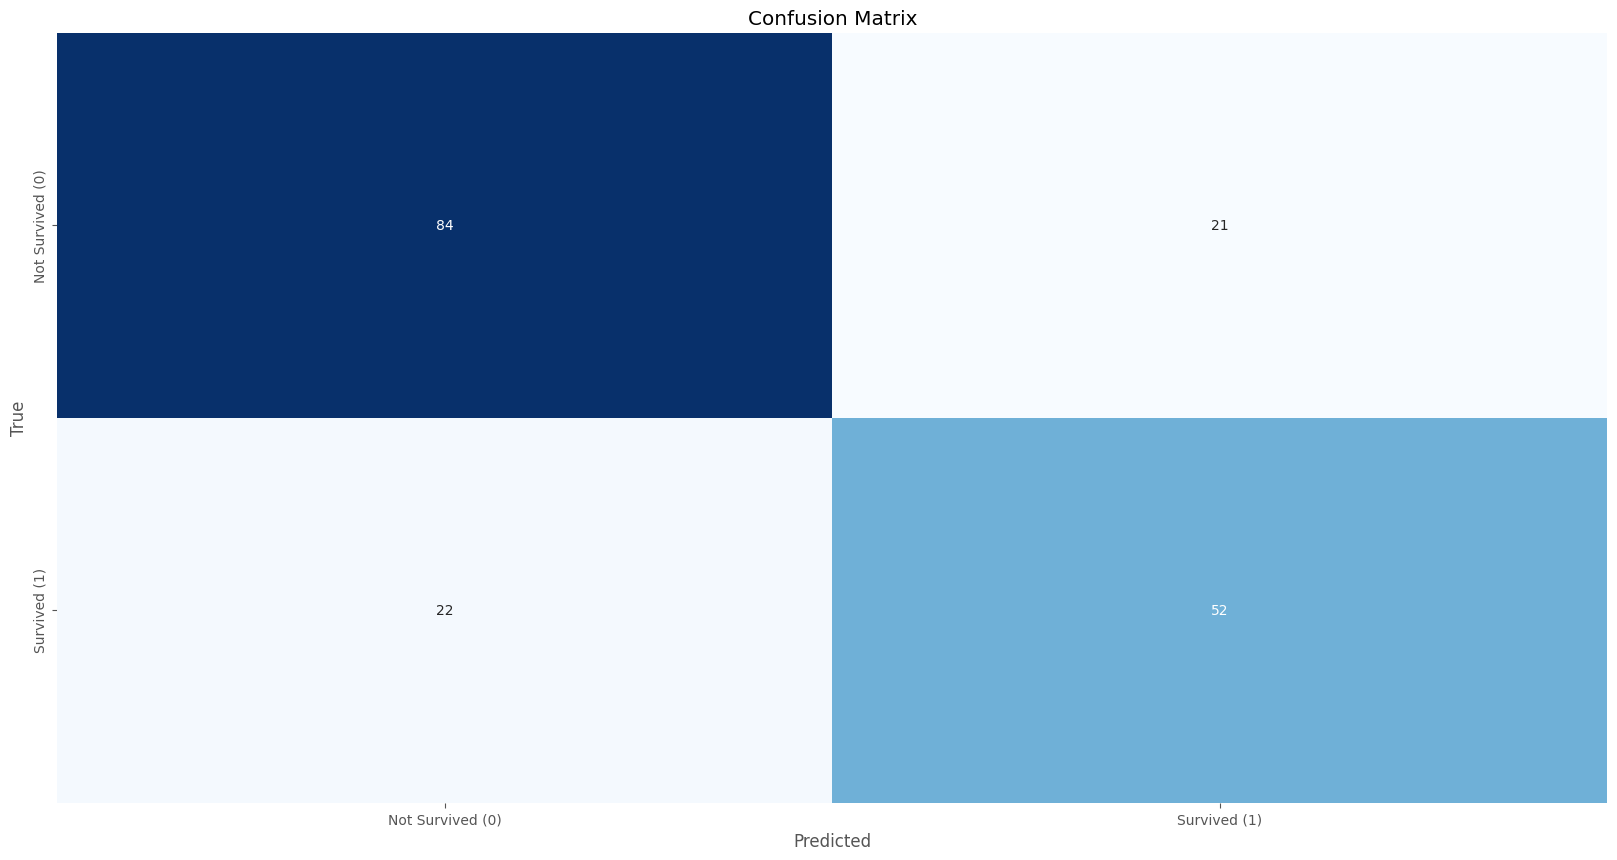

In [51]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived (0)', 'Survived (1)'],
            yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

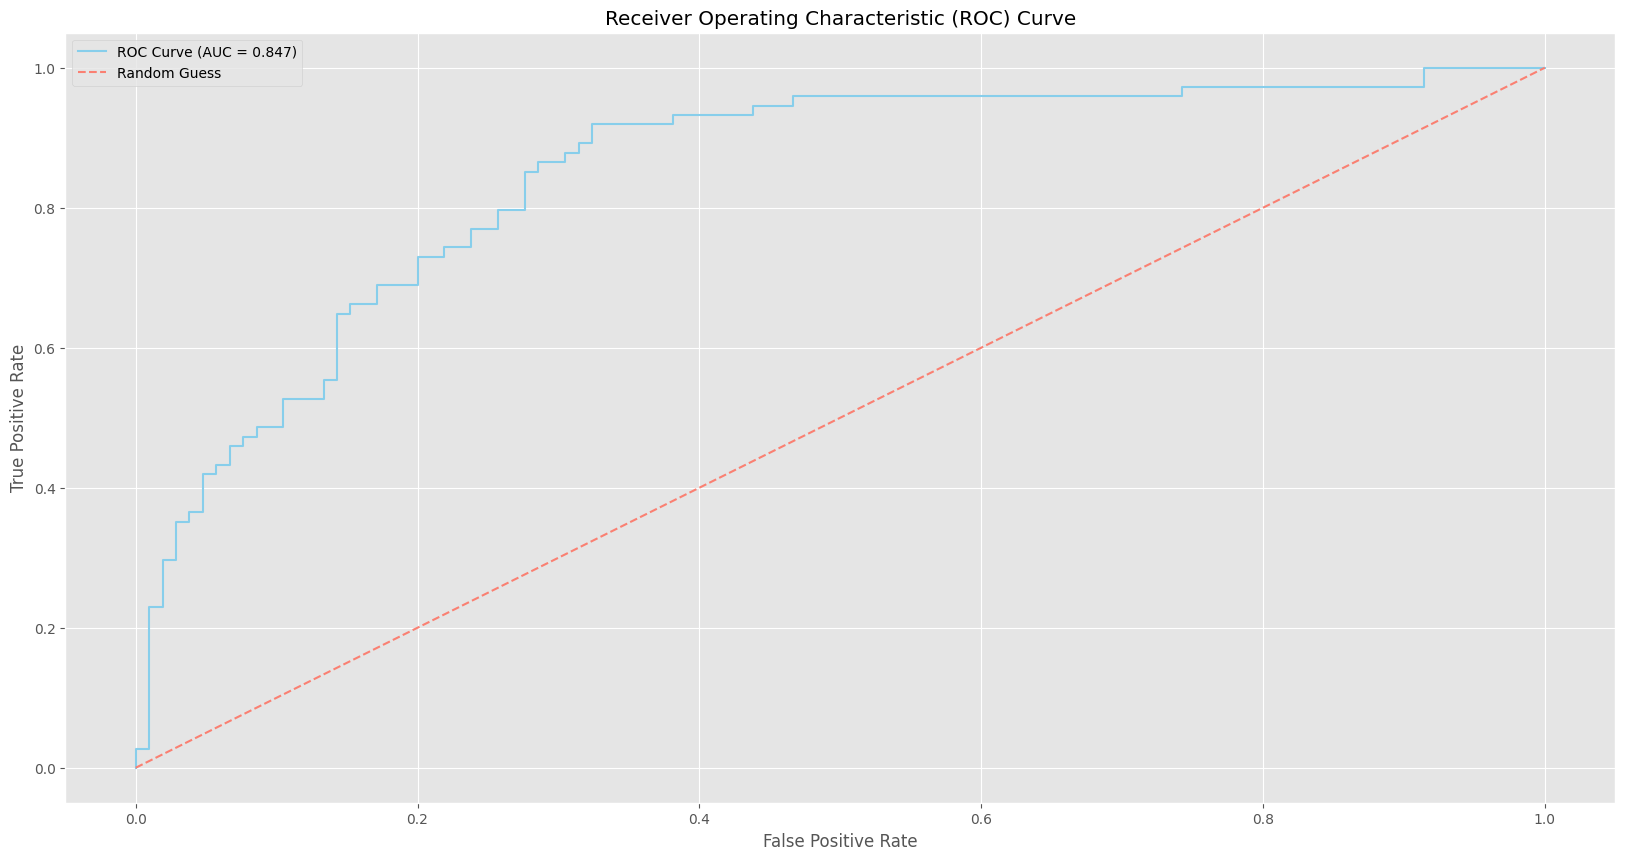

In [52]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='skyblue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='salmon', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

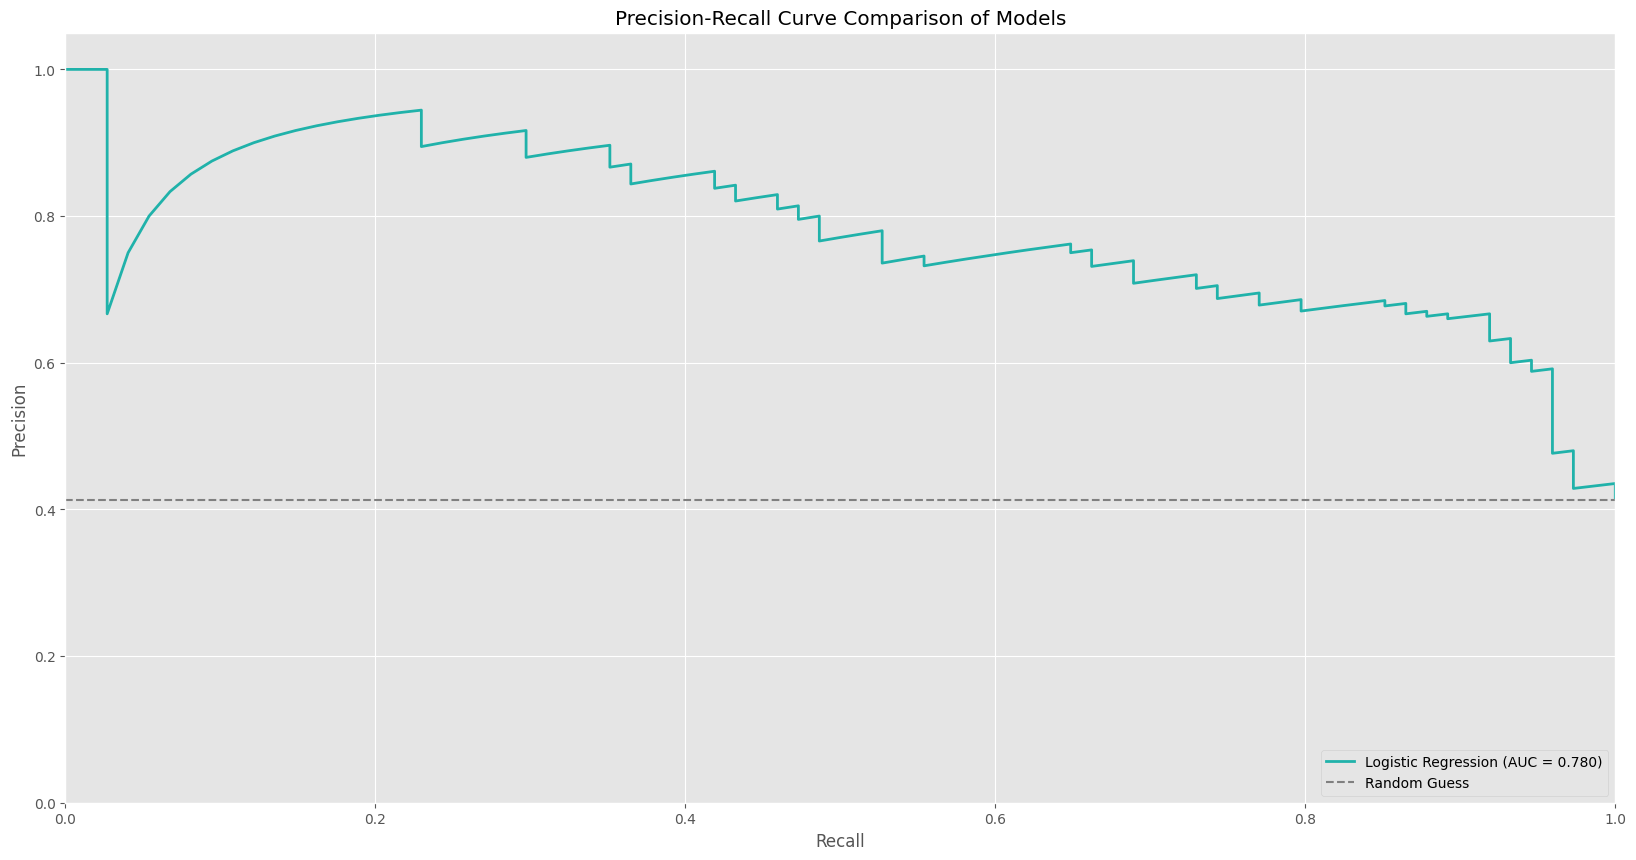

In [53]:
# Calculate the precision-recall curve for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc_lr = auc(recall_lr, precision_lr)

# Plot the Precision-Recall curves
plt.figure(figsize=(20, 10))
plt.plot(recall_lr, precision_lr, color='lightseagreen', lw=2, label=f'Logistic Regression (AUC = {pr_auc_lr:.3f})')

# Add a baseline (random classifier precision = positive class fraction)
positive_class_fraction = sum(y_test) / len(y_test)  # Fraction of Survived=1 in y_test
plt.axhline(y=positive_class_fraction, color='gray', linestyle='--', label='Random Guess')

# Customize the plot to match the attached ROC plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison of Models')
plt.legend(loc='lower right')
plt.show()

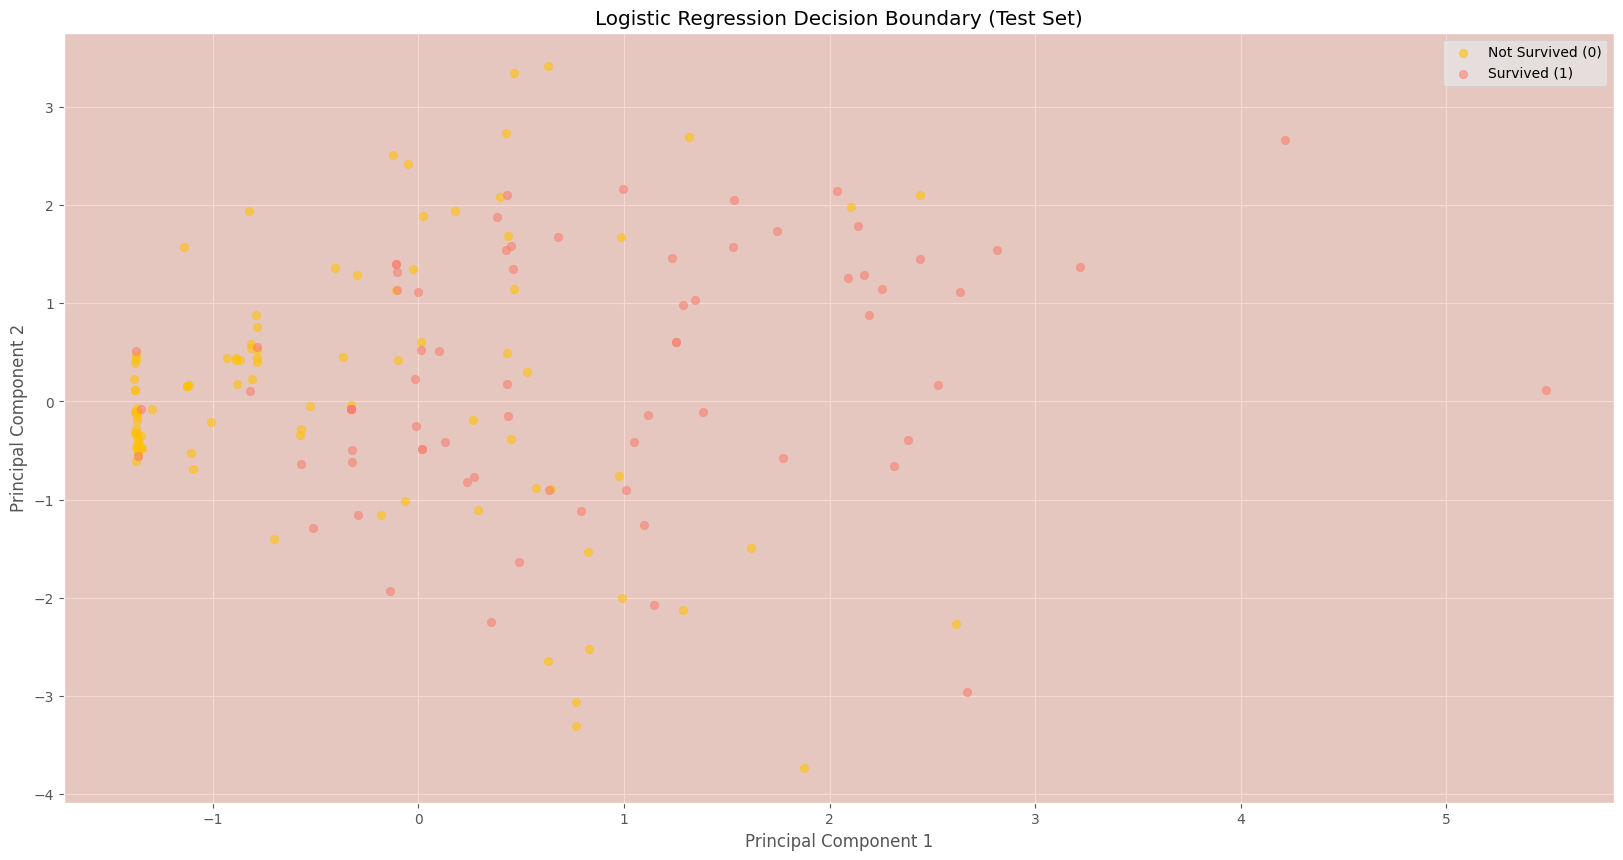

In [54]:
# Train the best model on the original (non-PCA) training data
#best_model.fit(x_resampled, y_resampled)

# Reduce dimensionality to 2D using PCA (fit on training data)
#pca = PCA(n_components=2, random_state=42)
#x_train_pca = pca.fit_transform(x_train_scaled)  # Fit PCA on training data
#x_test_pca = pca.transform(x_test_scaled)  # Transform test data using the same PCA

# Create a mesh grid for plotting the decision boundary (based on test data range)
h = 0.02  # Step size in the mesh
# Compute tighter ranges with smaller padding (5% of the range)
x_range = x_test_pca[:, 0].max() - x_test_pca[:, 0].min()
y_range = x_test_pca[:, 1].max() - x_test_pca[:, 1].min()
padding_x = 0.05 * x_range  # 5% padding
padding_y = 0.05 * y_range  # 5% padding
x_min, x_max = x_test_pca[:, 0].min() - padding_x, x_test_pca[:, 0].max() + padding_x
y_min, y_max = x_test_pca[:, 1].min() - padding_y, x_test_pca[:, 1].max() + padding_y
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Transform the mesh grid back to the original feature space to make predictions
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_original = pca.inverse_transform(mesh_points)  # Inverse transform to original space
Z = best_model.predict_proba(mesh_points_original)[:, 1]  # Predict probabilities using the original model
Z = Z.reshape(xx.shape)

# Plot the decision boundary and test data points
plt.figure(figsize=(20, 10))  # Adjusted size for better readability (original was 20, 10)
# Plot the decision boundary (where probability = 0.5)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.3)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--')

# Plot the test data points, colored by their true labels
colors = ['#FFC107', 'salmon']  # Yellow for Not Survived (0), Salmon for Survived (1)
for label in np.unique(y_test):
    plt.scatter(
        x_test_pca[y_test == label, 0], 
        x_test_pca[y_test == label, 1], 
        color=colors[label], 
        label=f'{"Survived" if label == 1 else "Not Survived"} ({label})',
        alpha=0.6
    )

# Customize the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary (Test Set)')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()